<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Processing</a></span></li><li><span><a href="#category-distribution" data-toc-modified-id="category-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>category distribution</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Most-visited-page" data-toc-modified-id="Most-visited-page-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Most visited page</a></span></li><li><span><a href="#Top-5-pages-per-language" data-toc-modified-id="Top-5-pages-per-language-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Top 5 pages per language</a></span></li></ul></li><li><span><a href="#Data-Visualizations" data-toc-modified-id="Data-Visualizations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Visualizations</a></span><ul class="toc-item"><li><span><a href="#Single--Timeseries-Visualization" data-toc-modified-id="Single--Timeseries-Visualization-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Single  Timeseries Visualization</a></span></li><li><span><a href="#Language-monthly-mean" data-toc-modified-id="Language-monthly-mean-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Language monthly mean</a></span></li><li><span><a href="#Timeseries-per-language" data-toc-modified-id="Timeseries-per-language-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Timeseries per language</a></span></li><li><span><a href="#Page-Visits-per-Week-Day" data-toc-modified-id="Page-Visits-per-Week-Day-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Page Visits per Week Day</a></span></li><li><span><a href="#Page-Visits-per-Month-Day" data-toc-modified-id="Page-Visits-per-Month-Day-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Page Visits per Month Day</a></span></li><li><span><a href="#Fast-Fourier-Transform-(FFT)" data-toc-modified-id="Fast-Fourier-Transform-(FFT)-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Fast Fourier Transform (FFT)</a></span></li></ul></li></ul></div>

# Data Description

Reference: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

I have cleaned the kaggle wikipedia traffic data and selected only data of 2016 with 
fraction of 0.1.

The data was melted and additional columns were created.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('fivethirtyeight') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

import functools
import gc

import IPython
from IPython.display import display, Markdown, Image

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2020-10-17 

CPython 3.7.7
IPython 7.18.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

matplotlib 3.2.1
numpy      1.18.4
seaborn    0.11.0
pandas     1.1.0
IPython    7.18.1
watermark  2.0.2



In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Load the data

In [3]:
df = pd.read_csv('../data/train_1.csv.zip',compression='zip',encoding='latin-1')
print(df.shape)
display(df.head())

(145063, 551)


Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

# Data Processing

In [4]:
import functools

@functools.lru_cache(maxsize=None)
def clean_df():
    # load the data
    df = pd.read_csv('../data/train_1.csv.zip',compression='zip',encoding='latin-1')

    # small data
    df = df.sample(frac=0.01,random_state=SEED)

    # description said zeros and nans are same
    df = df.fillna(0)

    # reduce memory
    df.iloc[:,1:] = df.iloc[:,1:].astype(np.int32)

    # data of year 2016 only
    t1 = pd.Timestamp('2015-07-01')
    t2 = pd.Timestamp('2016-01-01')
    diff = (t2-t1).days
    df = df.iloc[:, np.r_[0,diff+1:diff+1+366]]

    # make long data
    df = df.melt(id_vars=['Page'],var_name='date',value_name='visits')

    # time features
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year # yyyy
    df['month'] = df['date'].dt.month # 1 to 12
    df['day'] = df['date'].dt.day # 1 to 31
    df['quarter'] = df['date'].dt.quarter # 1 to 4
    df['dayofweek'] = df['date'].dt.dayofweek # 0 to 6
    df['dayofyear'] = df['date'].dt.dayofyear # 1 to 366 (leap year)
    df['day_name'] = df['date'].dt.day_name() # Monday
    df['month_name'] = df['date'].dt.month_name() # January
    df['weekend'] = ((df['date'].dt.dayofweek) // 5 == 1)
    df['weekday'] = ((df['date'].dt.dayofweek) // 5 != 1)

    # agg features
    df['mean'] = df.groupby('Page')['visits'].transform('mean')
    df['median'] = df.groupby('Page')['visits'].transform('median')

    # new features
    df['agent'] = df['Page'].str.split('_').str[-1]
    df['access'] = df['Page'].str.split('_').str[-2]
    df['project'] = df['Page'].str.split('_').str[-3]
    df['name'] = df['Page'].str.split('_').str[:-3].str.join('_')

    # language
    lang_map ={'en':'English','ja':'Japanese','de':'German',
            'www':'Media','fr':'French','zh':'Chinese',
            'ru':'Russian','es':'Spanish','commons': 'Media'
           }
    df['lang'] = df['project'].str.split('.').str[0]
    df['language'] = df['lang'].map(lang_map)

    # all the year is 2016,drop it.
    df.drop('year',axis=1,inplace=True)

    # memory reduction
    cols_int = ['visits']
    cols_cat = ['month','day','quarter','day_name','month_name',
                'project','access','agent','language']
    cols_float = ['mean','median']
    for c in cols_int: df[c] = df[c].astype(np.int32)
    for c in cols_float: df[c] = df[c].astype(np.float32)
    for c in cols_cat: df[c] = df[c].astype(pd.api.types.CategoricalDtype())

    # make day_name and month_name ordered categorical
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_name'] = pd.Categorical(df['day_name'], ordered=True, categories=cats)
    cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
           'August', 'September', 'October', 'November', 'December']
    df['month_name'] = pd.Categorical(df['month_name'], ordered=True, categories=cats)

    return df


df = clean_df()
df.head()

Page       date  visits month  \
0   Sean_Connery_en.wikipedia.org_desktop_all-agents 2016-01-01    4872     1   
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã... 2016-01-01       6     1   
2  The_Undertaker_fr.wikipedia.org_mobile-web_all... 2016-01-01     469     1   
3  Category:Outdoor_sex_commons.wikimedia.org_all... 2016-01-01     142     1   
4  ÐÐ°Ð¼ÑÐ·ÑÐº_ru.wikipedia.org_all-access_all... 2016-01-01    6692     1   

  day quarter  dayofweek  dayofyear day_name month_name  weekend  weekday  \
0   1       1          4          1   Friday    January    False     True   
1   1       1          4          1   Friday    January    False     True   
2   1       1          4          1   Friday    January    False     True   
3   1       1          4          1   Friday    January    False     True   
4   1       1          4          1   Friday    January    False     True   

          mean  median       agent      access                project  \
0  3405.661133  2624.0  all-agents     desktop       en.wikipedia.org   
1   170.841537    18.0  all-agents     desktop       fr.wikipedia.org   
2   400.336060   345.5  all-agents  mobile-web       fr.wikipedia.org   
3   205.174866   193.0  all-agents  all-access  commons.wikimedia.org   
4   912.516418   559.0  all-agents  all-access       ru.wikipedia.org   

                                                name     lang language  
0                                       Sean_Connery       en  English  
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã...       fr   French  
2                                     The_Undertaker       fr   French  
3                               Category:Outdoor_sex  commons    Media  
4                                     ÐÐ°Ð¼ÑÐ·ÑÐº       ru  Russian

# category distribution

In [5]:
cols_cat = ['month','day','quarter','day_name','month_name',
            'project','access','agent','language']

for c in cols_cat:
    print(c)
    print(df[c].value_counts().sort_index())
    print()

month
1     44981
2     42079
3     44981
4     43530
5     44981
6     43530
7     44981
8     44981
9     43530
10    44981
11    43530
12    44981
Name: month, dtype: int64

day
1     17412
2     17412
3     17412
4     17412
5     17412
6     17412
7     17412
8     17412
9     17412
10    17412
11    17412
12    17412
13    17412
14    17412
15    17412
16    17412
17    17412
18    17412
19    17412
20    17412
21    17412
22    17412
23    17412
24    17412
25    17412
26    17412
27    17412
28    17412
29    17412
30    15961
31    10157
Name: day, dtype: int64

quarter
1    132041
2    132041
3    133492
4    133492
Name: quarter, dtype: int64

day_name
Monday       75452
Tuesday      75452
Wednesday    75452
Thursday     75452
Friday       76903
Saturday     76903
Sunday       75452
Name: day_name, dtype: int64

month_name
January      44981
February     42079
March        44981
April        43530
May          44981
June         43530
July         44981
August       44981
Se

# Exploratory Data Analysis (EDA)

## Most visited page

In [6]:
print(df.shape)
df.head()

(531066, 20)


Page       date  visits month  \
0   Sean_Connery_en.wikipedia.org_desktop_all-agents 2016-01-01    4872     1   
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã... 2016-01-01       6     1   
2  The_Undertaker_fr.wikipedia.org_mobile-web_all... 2016-01-01     469     1   
3  Category:Outdoor_sex_commons.wikimedia.org_all... 2016-01-01     142     1   
4  ÐÐ°Ð¼ÑÐ·ÑÐº_ru.wikipedia.org_all-access_all... 2016-01-01    6692     1   

  day quarter  dayofweek  dayofyear day_name month_name  weekend  weekday  \
0   1       1          4          1   Friday    January    False     True   
1   1       1          4          1   Friday    January    False     True   
2   1       1          4          1   Friday    January    False     True   
3   1       1          4          1   Friday    January    False     True   
4   1       1          4          1   Friday    January    False     True   

          mean  median       agent      access                project  \
0  3405.661133  2624.0  all-agents     desktop       en.wikipedia.org   
1   170.841537    18.0  all-agents     desktop       fr.wikipedia.org   
2   400.336060   345.5  all-agents  mobile-web       fr.wikipedia.org   
3   205.174866   193.0  all-agents  all-access  commons.wikimedia.org   
4   912.516418   559.0  all-agents  all-access       ru.wikipedia.org   

                                                name     lang language  
0                                       Sean_Connery       en  English  
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã...       fr   French  
2                                     The_Undertaker       fr   French  
3                               Category:Outdoor_sex  commons    Media  
4                                     ÐÐ°Ð¼ÑÐ·ÑÐº       ru  Russian

In [7]:
df['Page'].nunique() # there are 14.5k unique pages visited in 2016

1451

In [8]:
df.groupby('Page')['visits'].sum()

Page
10æ31æ¥_zh.wikipedia.org_all-access_spider                     3728
11.22.63_ru.wikipedia.org_desktop_all-agents                    198142
12æ23æ¥_ja.wikipedia.org_desktop_all-agents                   50885
14._September_de.wikipedia.org_desktop_all-agents                40060
1896_Summer_Olympics_en.wikipedia.org_all-access_all-agents    1390141
                                                                ...   
éº»ç¾ãã¾_ja.wikipedia.org_mobile-web_all-agents             435128
é»ä»²è£_zh.wikipedia.org_mobile-web_all-agents                 27658
é»æ¯æ°_zh.wikipedia.org_all-access_all-agents                212466
é»ç°å­é«_ja.wikipedia.org_all-access_all-agents             804791
é¾å
«å¤·_zh.wikipedia.org_desktop_all-agents                   192697
Name: visits, Length: 1451, dtype: int32

In [9]:
df.groupby('Page')['visits'].sum().sort_values(ascending=False)

Page
Special:RecentChangesLinked_en.wikipedia.org_desktop_all-agents                                       25548886
Game_of_Thrones_en.wikipedia.org_mobile-web_all-agents                                                 7152769
Orange_Is_the_New_Black_en.wikipedia.org_all-access_all-agents                                         6241503
User:GoogleAnalitycsRoman10/google-api_en.wikipedia.org_desktop_all-agents                             5356326
The_Jungle_Book_(2016_film)_en.wikipedia.org_mobile-web_all-agents                                     4970762
                                                                                                        ...   
January_2017_European_cold_wave_en.wikipedia.org_desktop_all-agents                                          0
Resident_Evil_7:_Biohazard_de.wikipedia.org_all-access_spider                                                0
æ¼«æ¼«åå®¶è·¯_(2016å¹´é»å½±)_zh.wikipedia.org_mobile-web_all-agents                                     

In [10]:
df.groupby('Page')['visits'].sum().nlargest(5)

Page
Special:RecentChangesLinked_en.wikipedia.org_desktop_all-agents               25548886
Game_of_Thrones_en.wikipedia.org_mobile-web_all-agents                         7152769
Orange_Is_the_New_Black_en.wikipedia.org_all-access_all-agents                 6241503
User:GoogleAnalitycsRoman10/google-api_en.wikipedia.org_desktop_all-agents     5356326
The_Jungle_Book_(2016_film)_en.wikipedia.org_mobile-web_all-agents             4970762
Name: visits, dtype: int32

In [11]:
df.query(""" Page == 'Special:Search_en.wikipedia.org_desktop_all-agents' """).head()

Empty DataFrame
Columns: [Page, date, visits, month, day, quarter, dayofweek, dayofyear, day_name, month_name, weekend, weekday, mean, median, agent, access, project, name, lang, language]
Index: []

## Top 5 pages per language

In [12]:
# df.groupby('language')['visits'].nlargest(5)

In [13]:
# df.groupby('language')['visits'].apply(lambda x: x.nlargest(5))

In [14]:
# df.groupby('language')['visits'].apply(lambda x: x.nlargest(5).index)

In [15]:
df.groupby('language')['visits'].apply(lambda x: df.loc[x.nlargest(5).index])

Page       date  \
language                                                                        
Chinese  359618         å±å_zh.wikipedia.org_desktop_all-agents 2016-09-04   
         516455         å¬è³_zh.wikipedia.org_desktop_all-agents 2016-12-21   
         38373       å­åº­éº_zh.wikipedia.org_desktop_all-agents 2016-01-27   
         121852  ä¹æ­¦æ´å¡_zh.wikipedia.org_all-access_all-a... 2016-03-24   
         225587   å
­åäºä»¶_zh.wikipedia.org_desktop_all-agents 2016-06-04   
English  150393  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-04-13   
         139512  1896_Summer_Olympics_en.wikipedia.org_all-acce... 2016-04-06   
         456554  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-11-10   
         458005  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-11-11   
         227427  Issus_(genus)_en.wikipedia.org_all-access_all-... 2016-06-05   
French   28471   Guy_Georges_fr.wikipedia.org_all-access_all-ag... 2016-01-20   
         283278  FÃªte_nationale_franÃ§aise_fr.wikipedia.org_de... 2016-07-14   
         97415   JournÃ©e_internationale_des_femmes_fr.wikipedi... 2016-03-08   
         44381   Michel_Bouquet_fr.wikipedia.org_mobile-web_all... 2016-01-31   
         58634        Zoo_York_fr.wikipedia.org_desktop_all-agents 2016-02-10   
German   444962  GerÃ¤testecker_de.wikipedia.org_desktop_all-ag... 2016-11-02   
         458449  San_Marino_de.wikipedia.org_all-access_all-agents 2016-11-11   
         181165      Bosseborn_de.wikipedia.org_desktop_all-agents 2016-05-04   
         458137  Leonard_Cohen_de.wikipedia.org_desktop_all-agents 2016-11-11   
         530290  Dinner_for_One_de.wikipedia.org_all-access_all... 2016-12-31   
Japanese 187547  ãã©ã­ã¤ã_ja.wikipedia.org_desktop_all-a... 2016-05-09   
         118036  MediaWiki:EnhancedCollapsibleElements.js_ja.wi... 2016-03-22   
         399206  Oã»Jã»ã·ã³ãã½ã³äºä»¶_ja.wikipedia.org... 2016-10-02   
         16774    ç°äº¬æµ_ja.wikipedia.org_all-access_all-agents 2016-01-12   
         286452   å°¾å´è±_ja.wikipedia.org_all-access_all-agents 2016-07-16   
Media    126253  MediaWiki:Sitenotice-translation_commons.wikim... 2016-03-28   
         127704  MediaWiki:Sitenotice-translation_commons.wikim... 2016-03-29   
         129155  MediaWiki:Sitenotice-translation_commons.wikim... 2016-03-30   
         214764  MediaWiki:Sitenotice-translation_commons.wikim... 2016-05-28   
         130606  MediaWiki:Sitenotice-translation_commons.wikim... 2016-03-31   
Russian  226282  ÐÐ»Ð¸,_ÐÐ¾Ñ
Ð°Ð¼Ð¼ÐµÐ´_ru.wikipedia.org_all-... 2016-06-04   
         227733  ÐÐ»Ð¸,_ÐÐ¾Ñ
Ð°Ð¼Ð¼ÐµÐ´_ru.wikipedia.org_all-... 2016-06-05   
         229184  ÐÐ»Ð¸,_ÐÐ¾Ñ
Ð°Ð¼Ð¼ÐµÐ´_ru.wikipedia.org_all-... 2016-06-06   
         338886  Ð¡Ð»ÑÐ¶ÐµÐ±Ð½Ð°Ñ:ÐÑÐµ_ÑÑÑÐ°Ð½Ð¸ÑÑ_ru.... 2016-08-21   
         406519  ÐÑÑÐ¸Ð½,_ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ_ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸ÑÐ... 2016-10-07   
Spanish  455139  Colegio_Electoral_de_los_Estados_Unidos_es.wik... 2016-11-09   
         454614  Melania_Trump_es.wikipedia.org_all-access_all-... 2016-11-09   
         450000  AneuploidÃ­a_es.wikipedia.org_all-access_all-a... 2016-11-06   
         473461  RamÃ³n_Serrano_SuÃ±er_es.wikipedia.org_all-acc... 2016-11-22   
         456065  Melania_Trump_es.wikipedia.org_all-access_all-... 2016-11-10   

                  visits month day quarter  dayofweek  dayofyear   day_name  \
language                                                                      
Chinese  359618    79490     9   4       3          6        248     Sunday   
         516455    52874    12  21       4          2        356  Wednesday   
         38373     40898     1  27       1          2         27  Wednesday   
         121852    35694     3  24       1          3         84   Thursday   
         225587    34491     6   4       2          5        156   Saturday   
English  150393   853784     4  13       2          2        104  Wednesday   
         139512   628696   

# Data Visualizations

## Single  Timeseries Visualization

In [16]:
idx = df.groupby('Page')['visits'].sum().idxmax()
df.query(""" Page == @idx """).head()

Page       date  visits  \
940   Special:RecentChangesLinked_en.wikipedia.org_d... 2016-01-01   28809   
2391  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-01-02   23581   
3842  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-01-03   42066   
5293  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-01-04   16696   
6744  Special:RecentChangesLinked_en.wikipedia.org_d... 2016-01-05   24761   

     month day quarter  dayofweek  dayofyear  day_name month_name  weekend  \
940      1   1       1          4          1    Friday    January    False   
2391     1   2       1          5          2  Saturday    January     True   
3842     1   3       1          6          3    Sunday    January     True   
5293     1   4       1          0          4    Monday    January    False   
6744     1   5       1          1          5   Tuesday    January    False   

      weekday          mean   median       agent   access           project  \
940      True  69805.703125  34649.5  all-agents  desktop  en.wikipedia.org   
2391    False  69805.703125  34649.5  all-agents  desktop  en.wikipedia.org   
3842    False  69805.703125  34649.5  all-agents  desktop  en.wikipedia.org   
5293     True  69805.703125  34649.5  all-agents  desktop  en.wikipedia.org   
6744     True  69805.703125  34649.5  all-agents  desktop  en.wikipedia.org   

                             name lang language  
940   Special:RecentChangesLinked   en  English  
2391  Special:RecentChangesLinked   en  English  
3842  Special:RecentChangesLinked   en  English  
5293  Special:RecentChangesLinked   en  English  
6744  Special:RecentChangesLinked   en  English

In [17]:
ts = df.query(""" Page == @idx """)[['date','visits']].set_index('date')

print(ts.shape)
ts.head()

(366, 1)


visits
date              
2016-01-01   28809
2016-01-02   23581
2016-01-03   42066
2016-01-04   16696
2016-01-05   24761

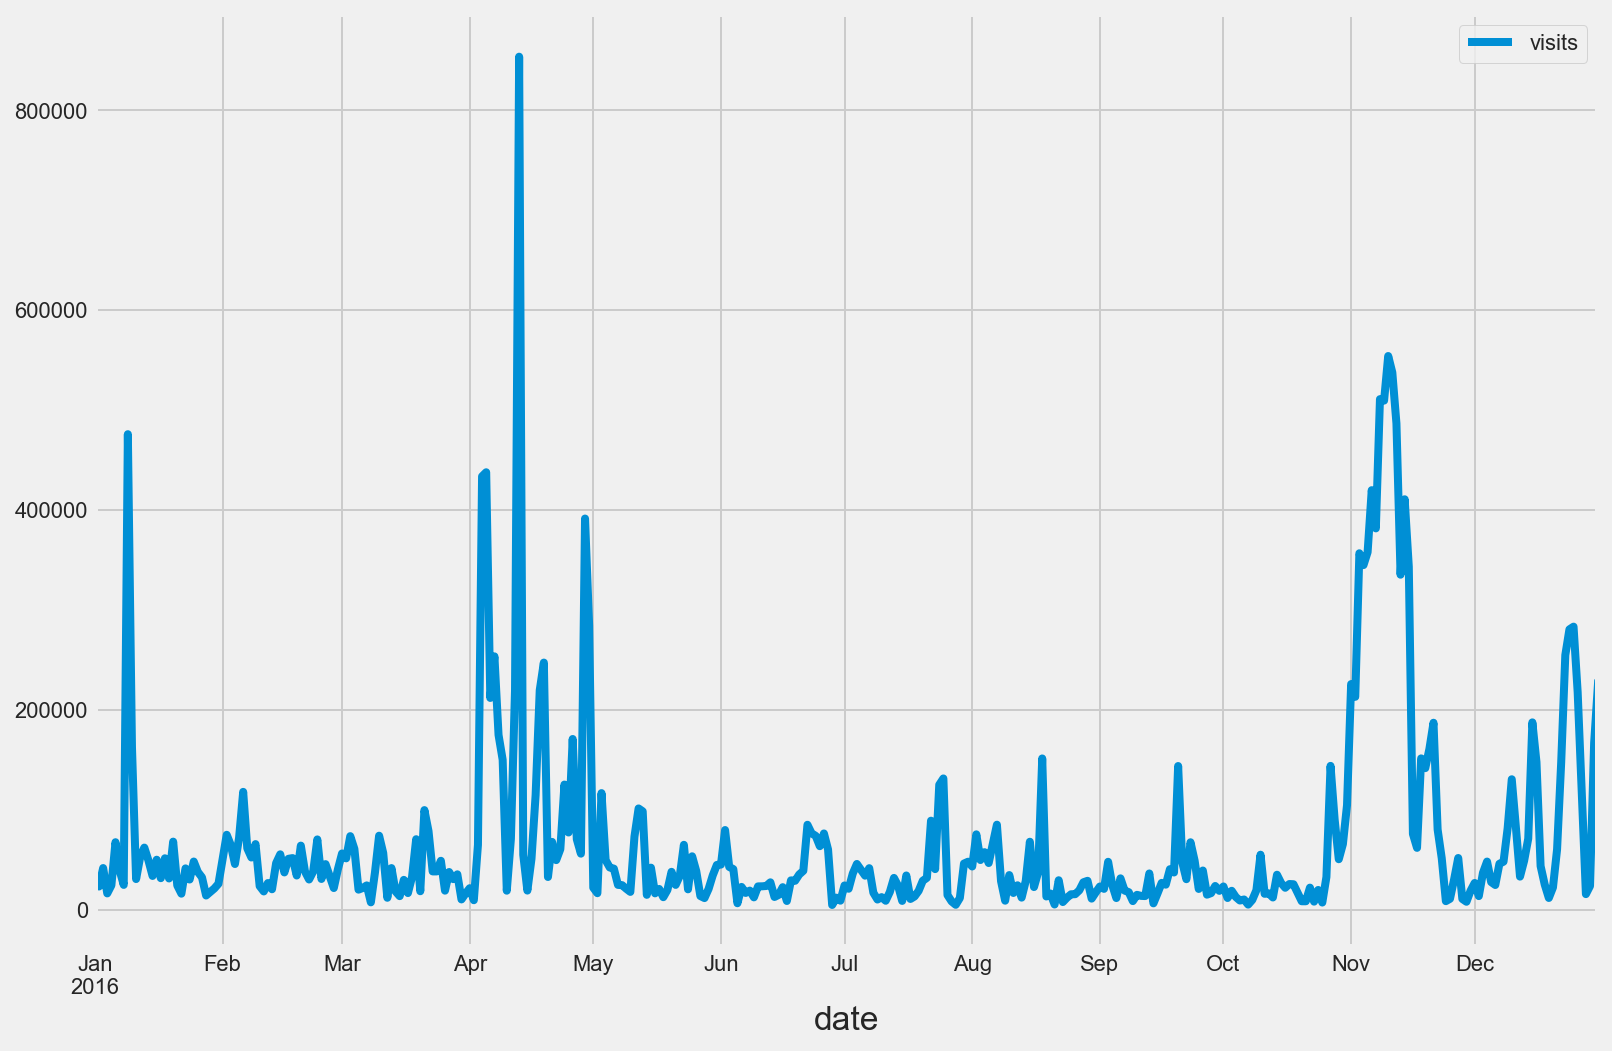

In [18]:
ts.plot()

# ts is periodic
# ts has some very large peaks
# ts in not going upward, it does not have trend (it may have if I have more years)

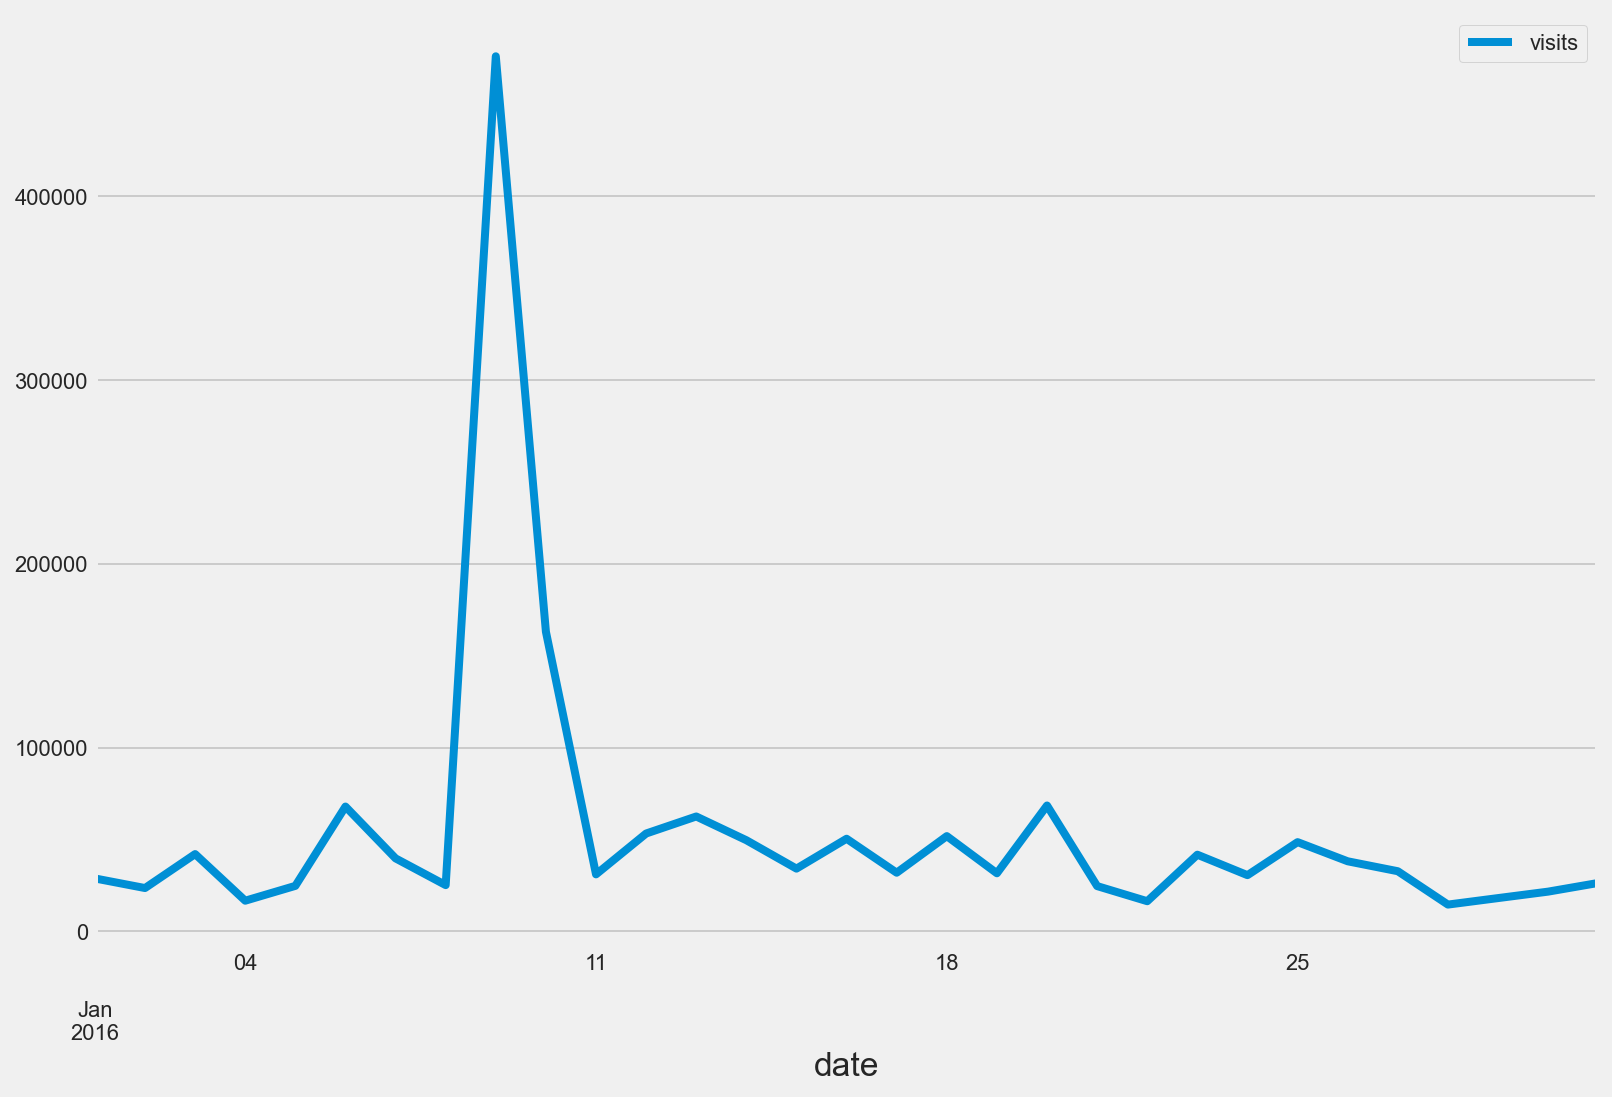

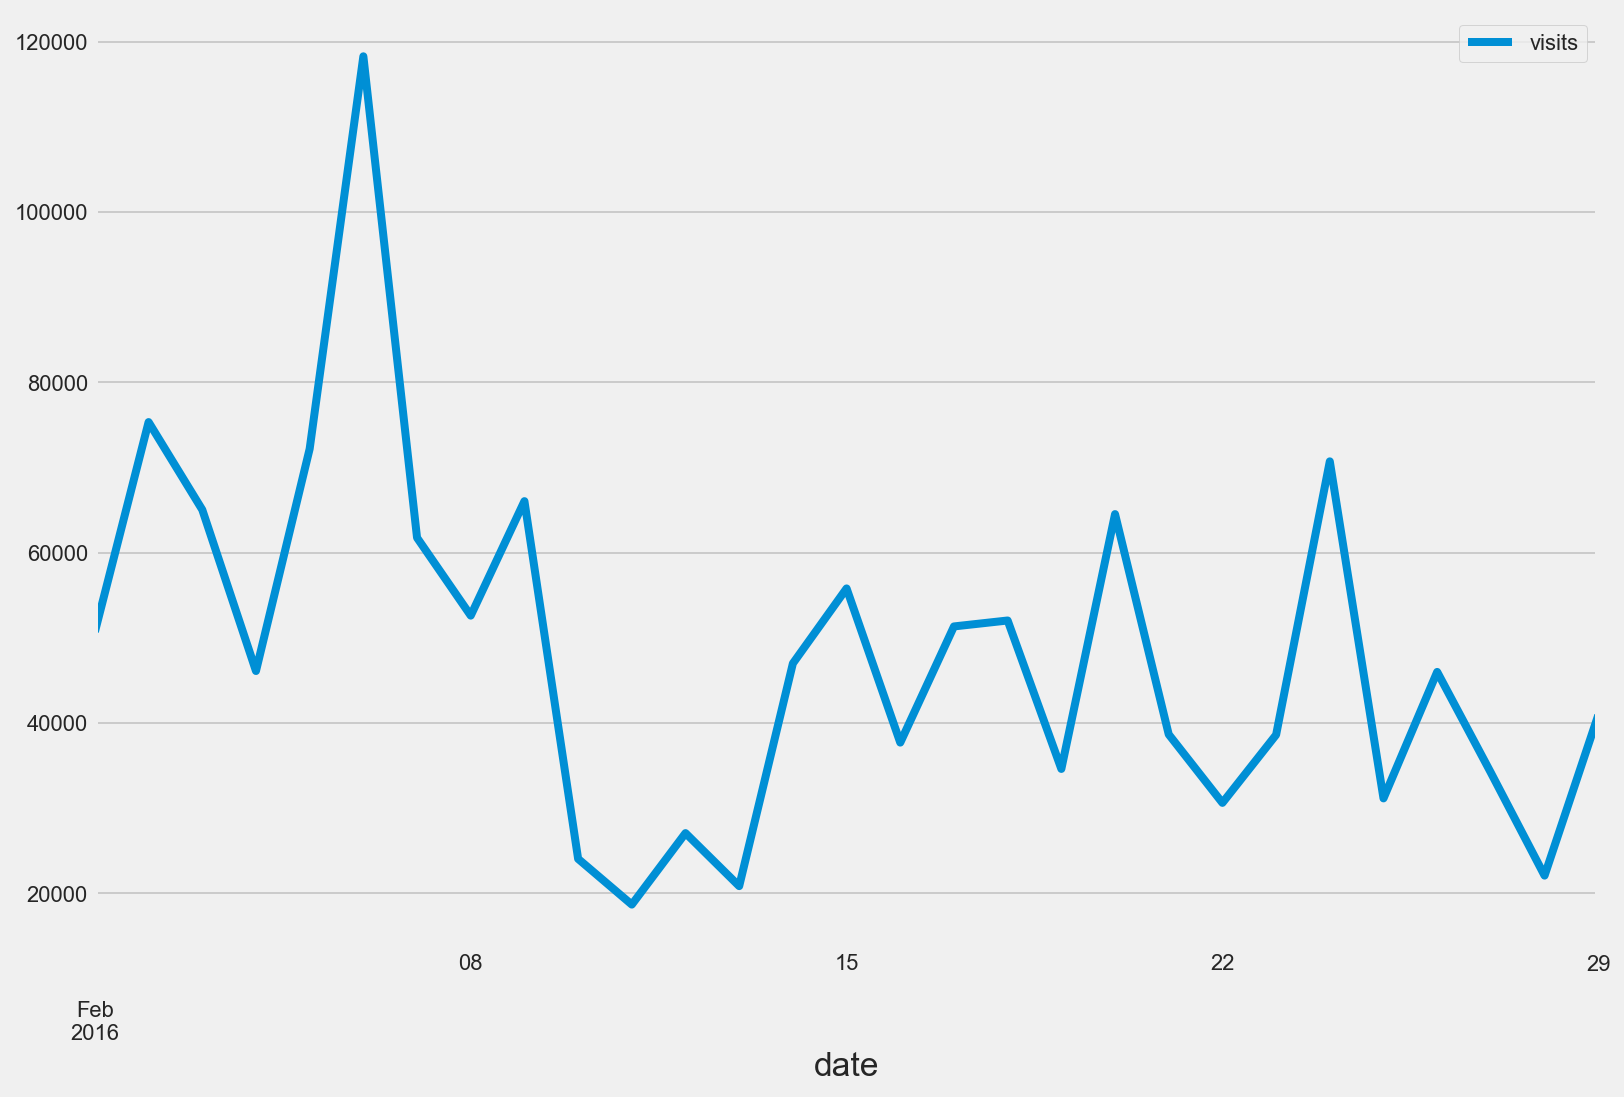

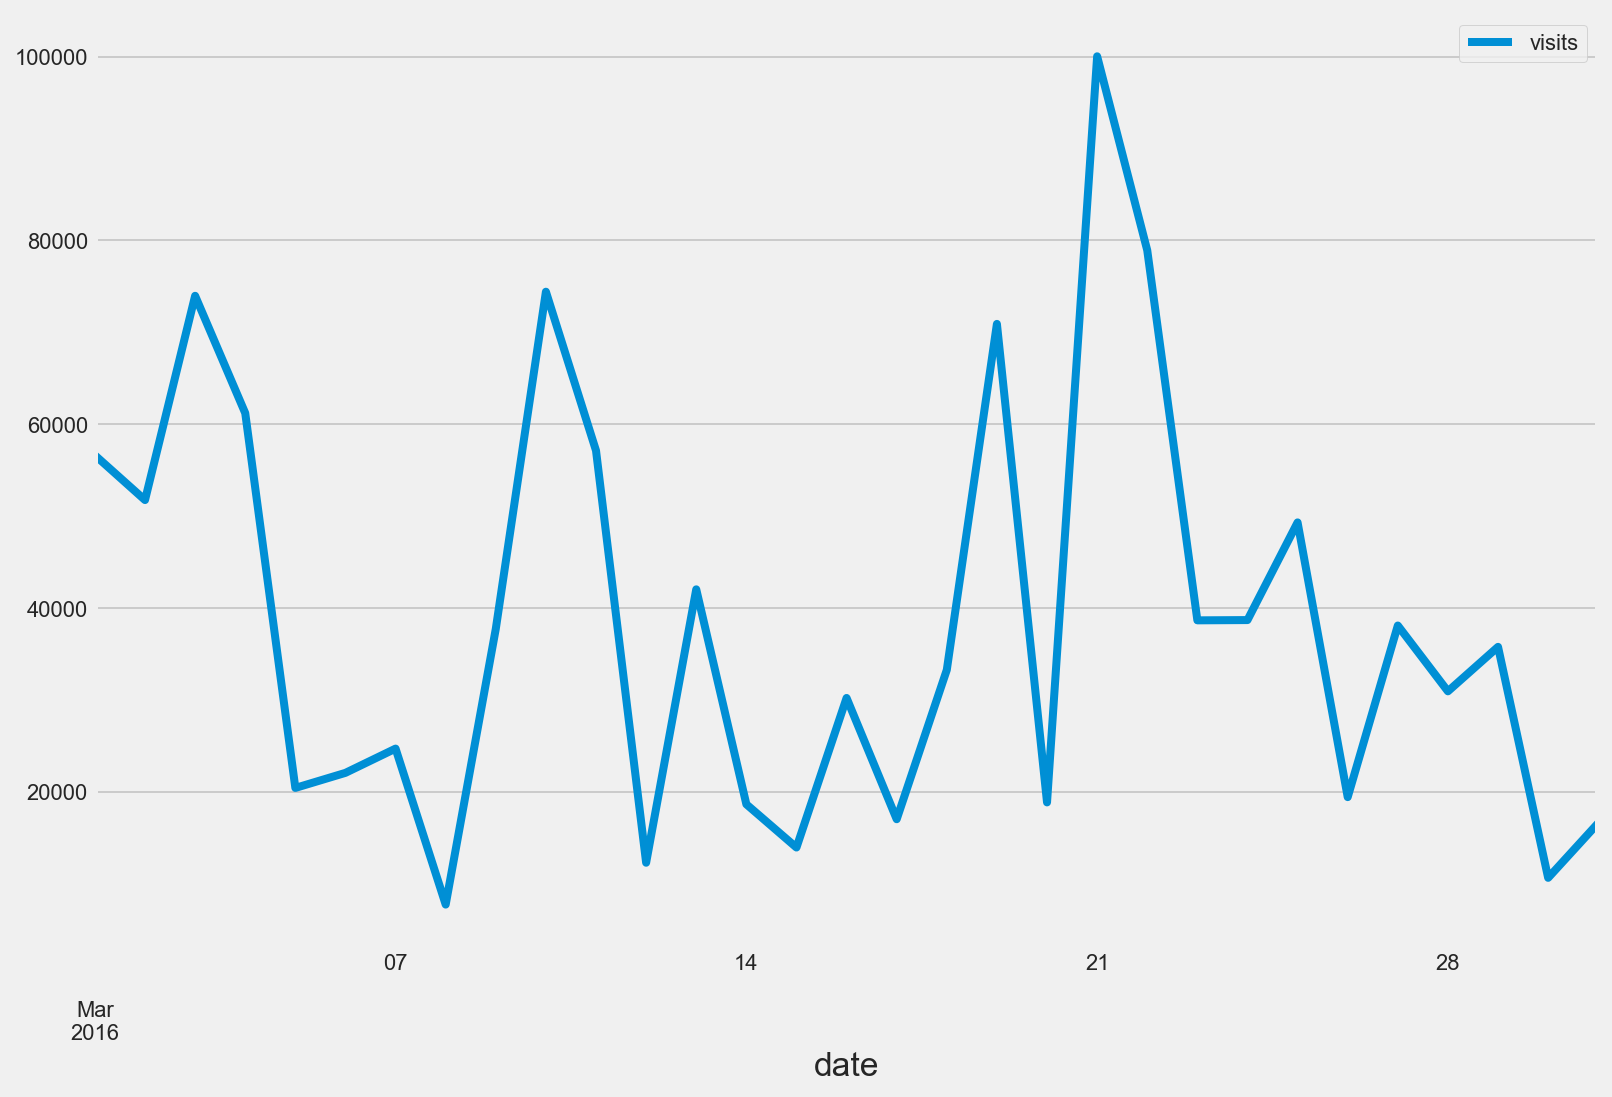

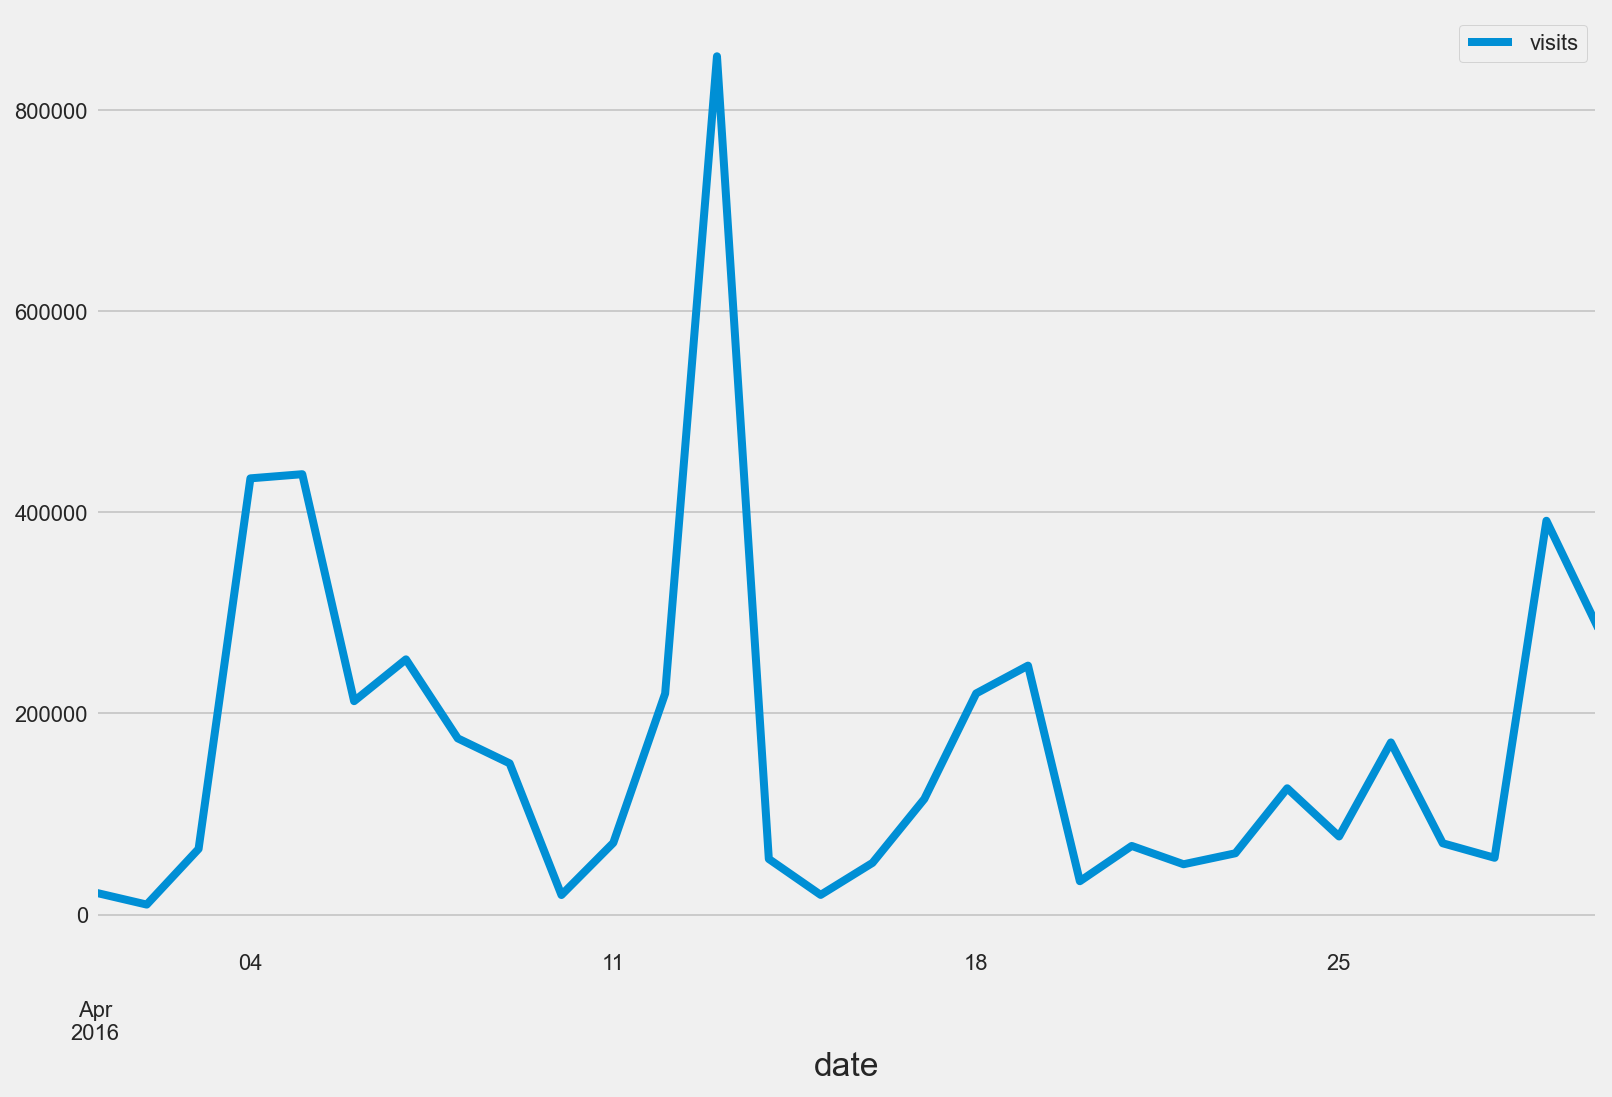

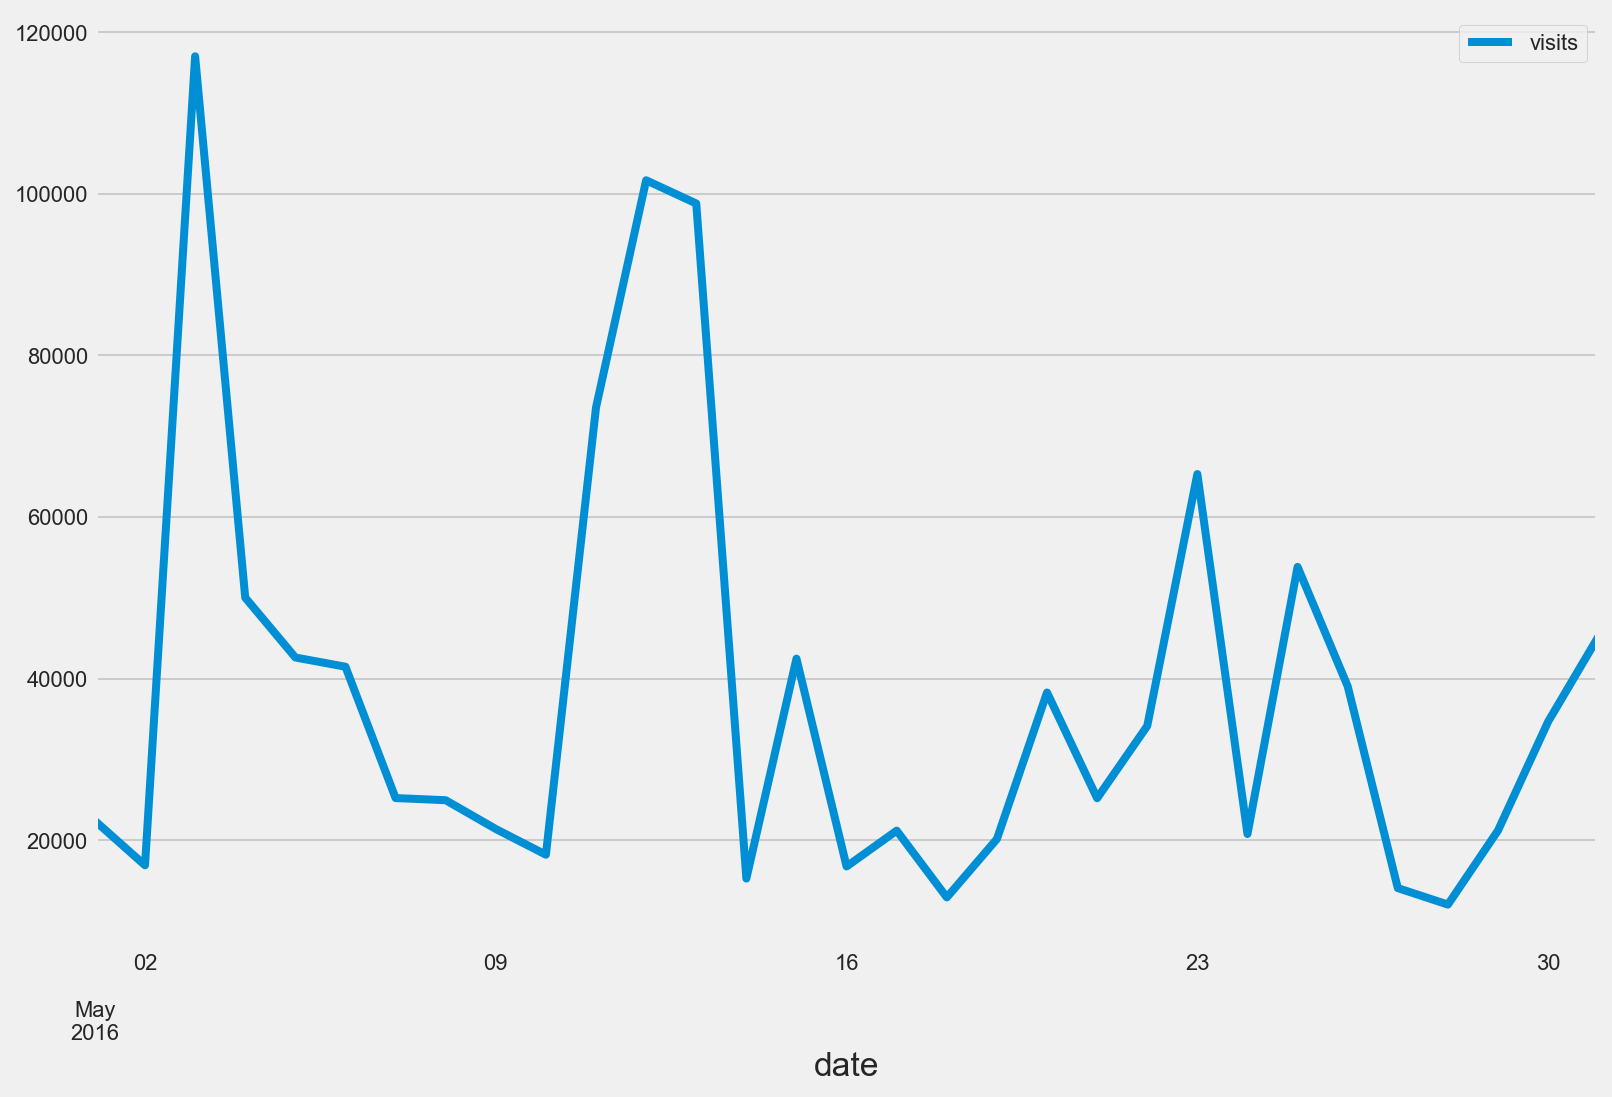

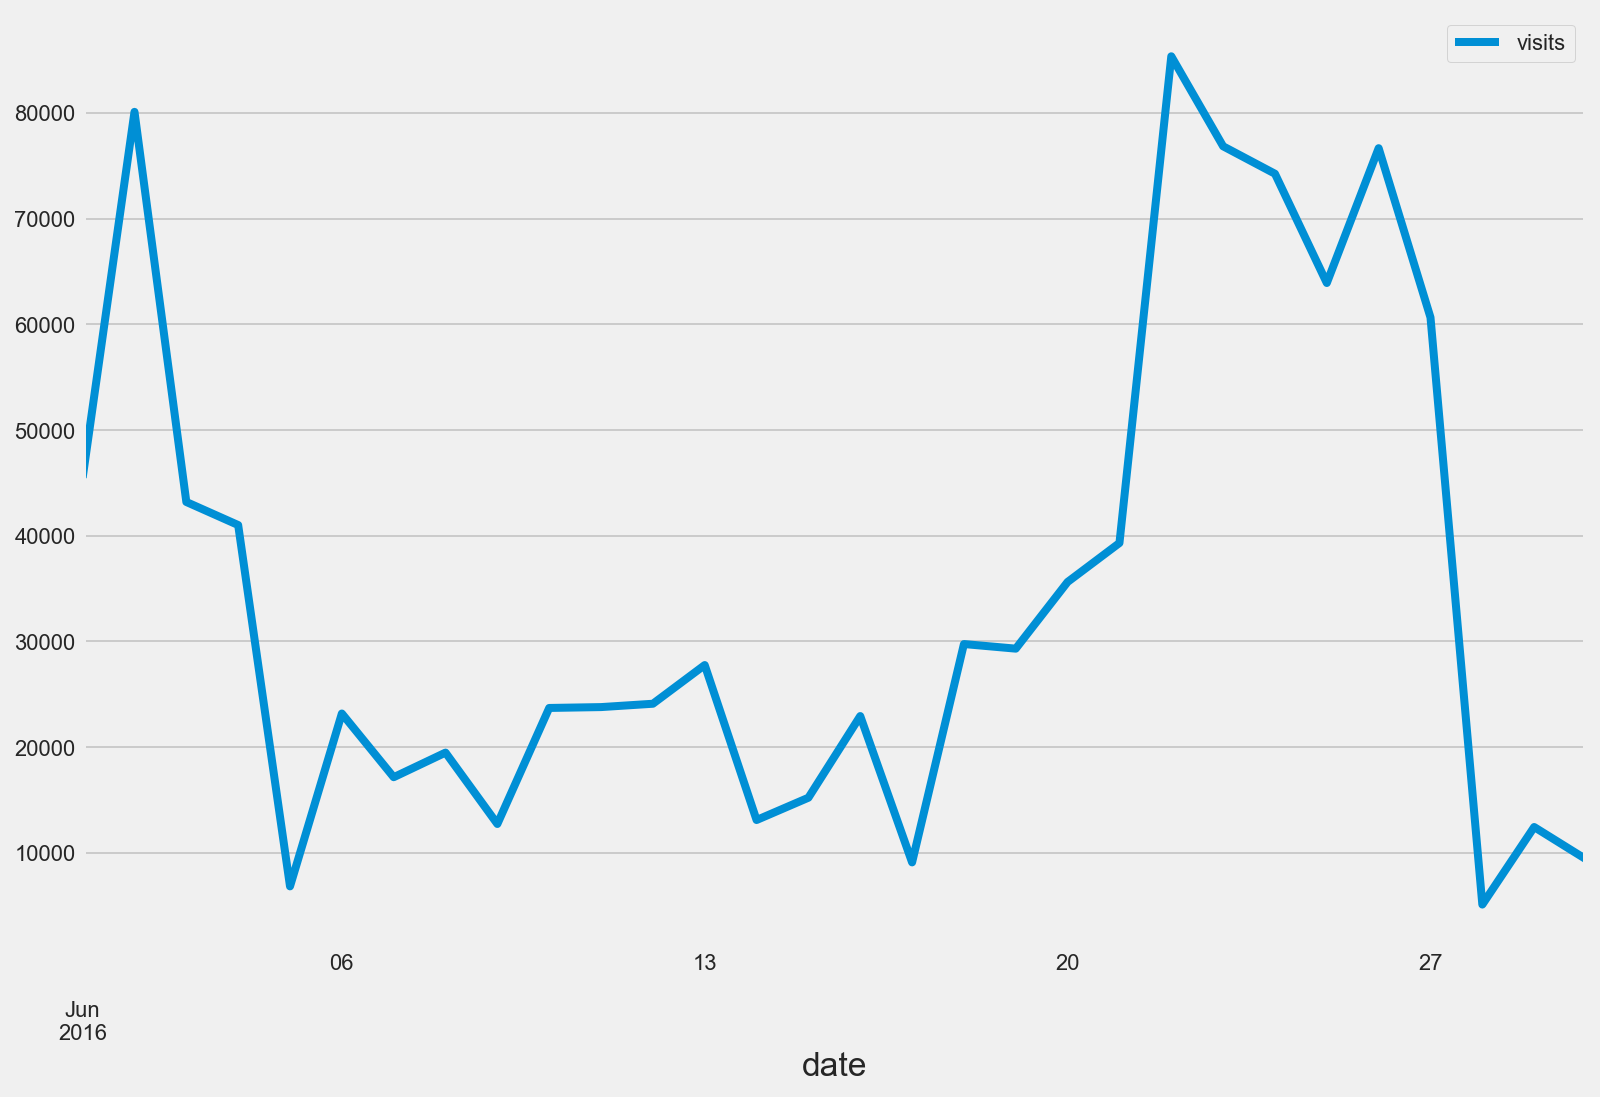

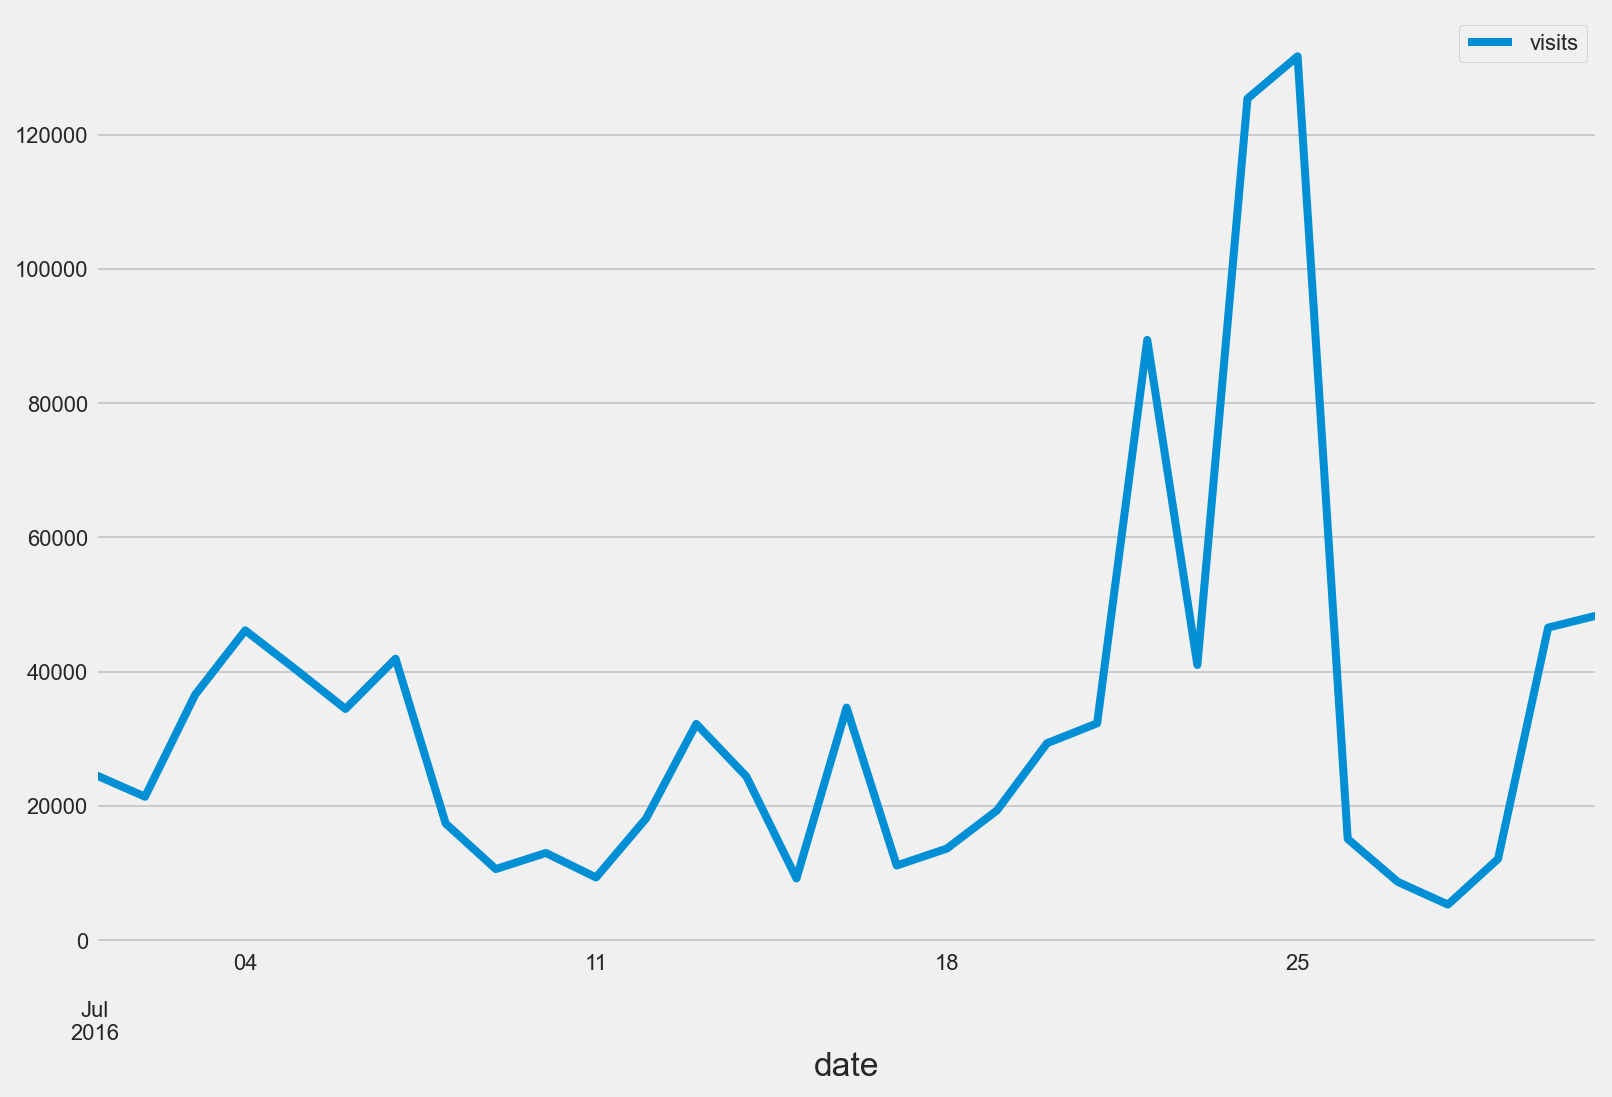

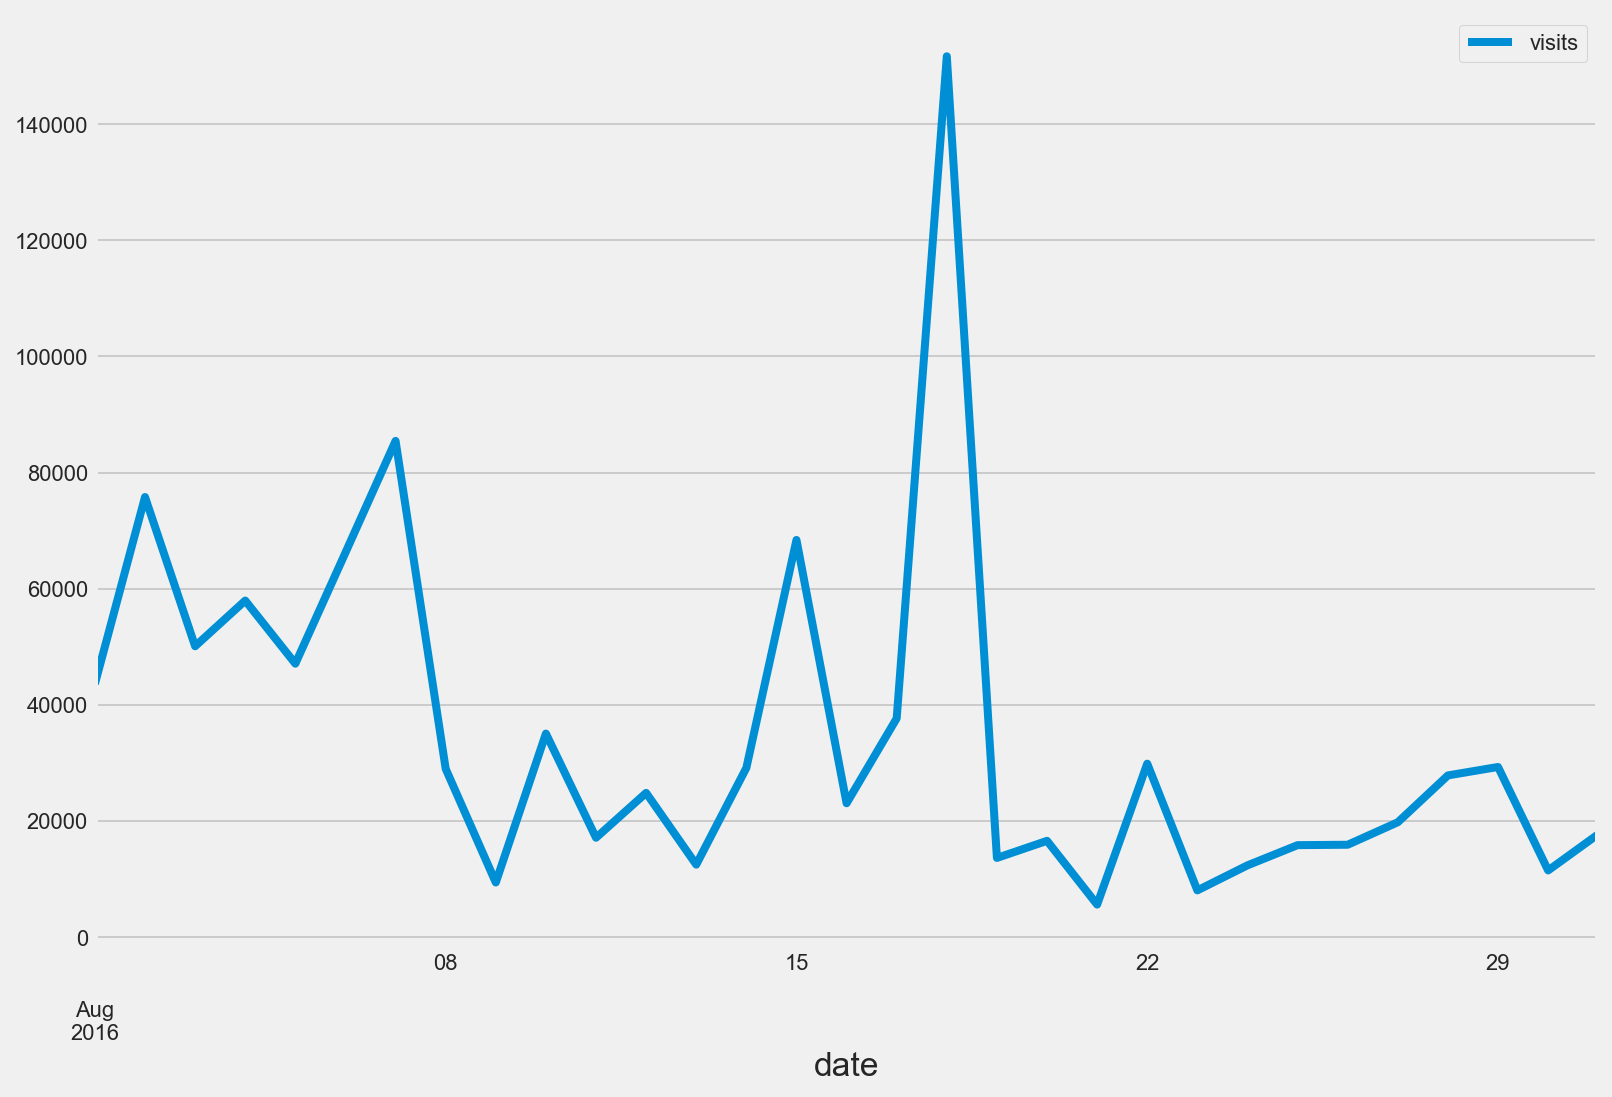

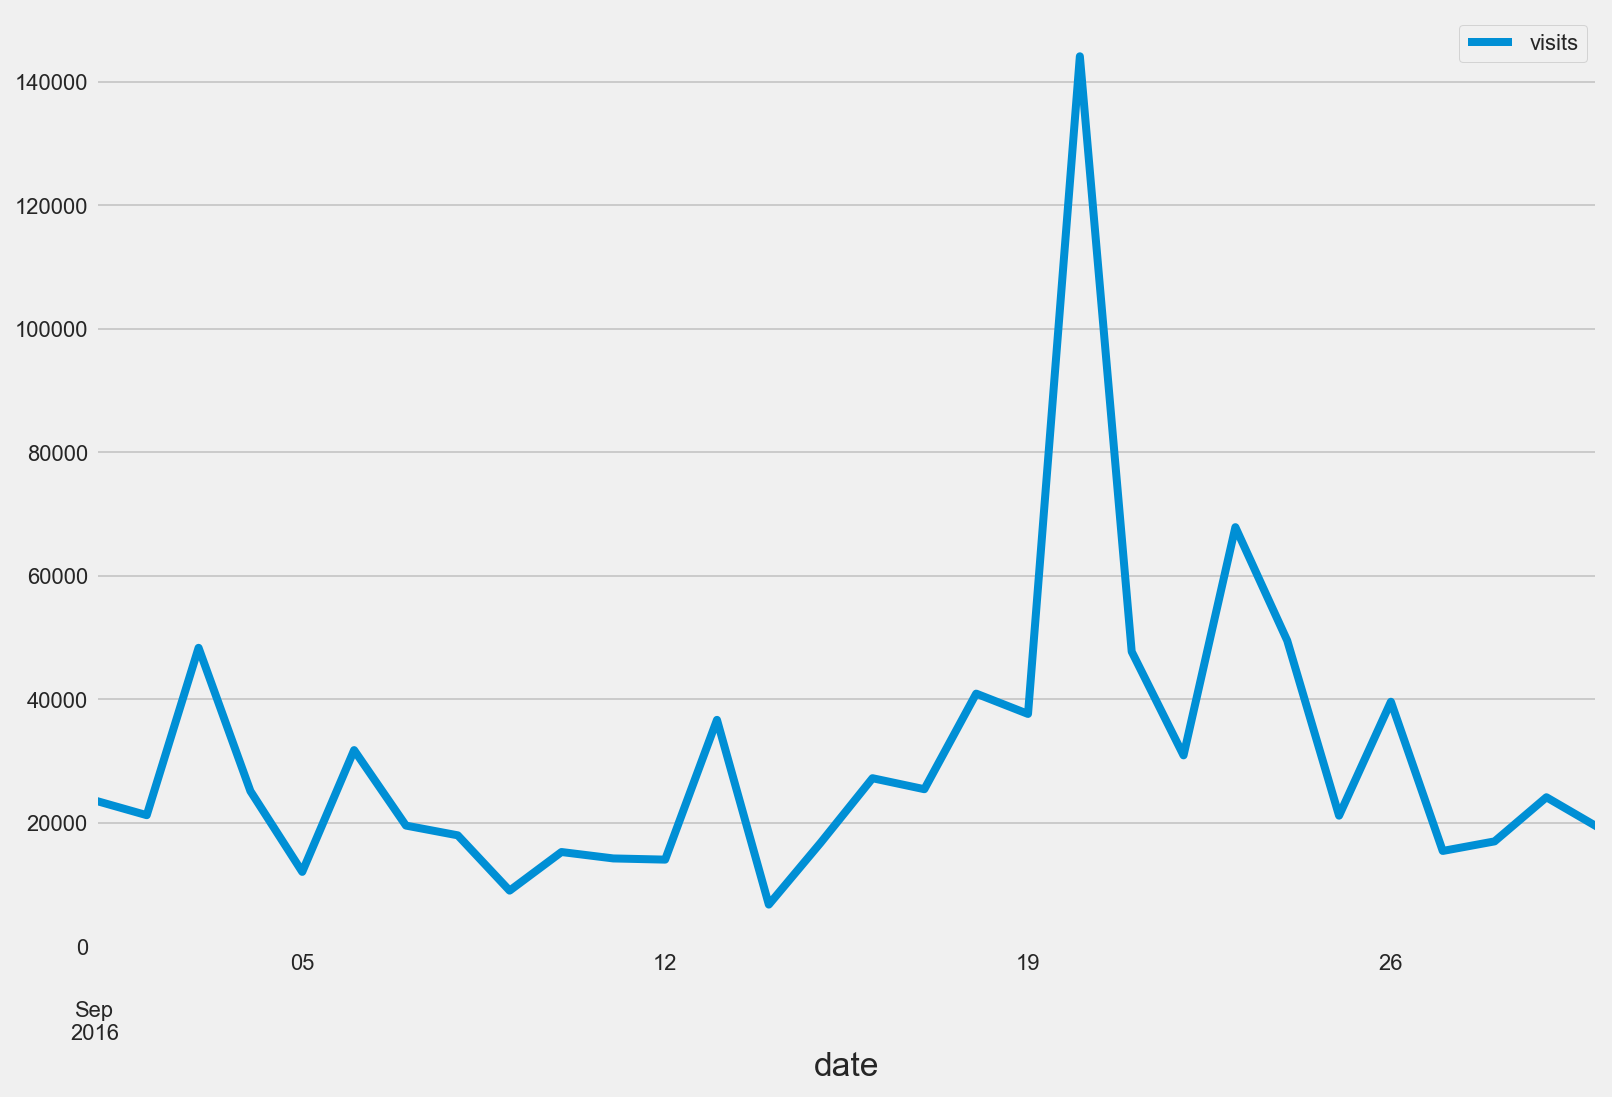

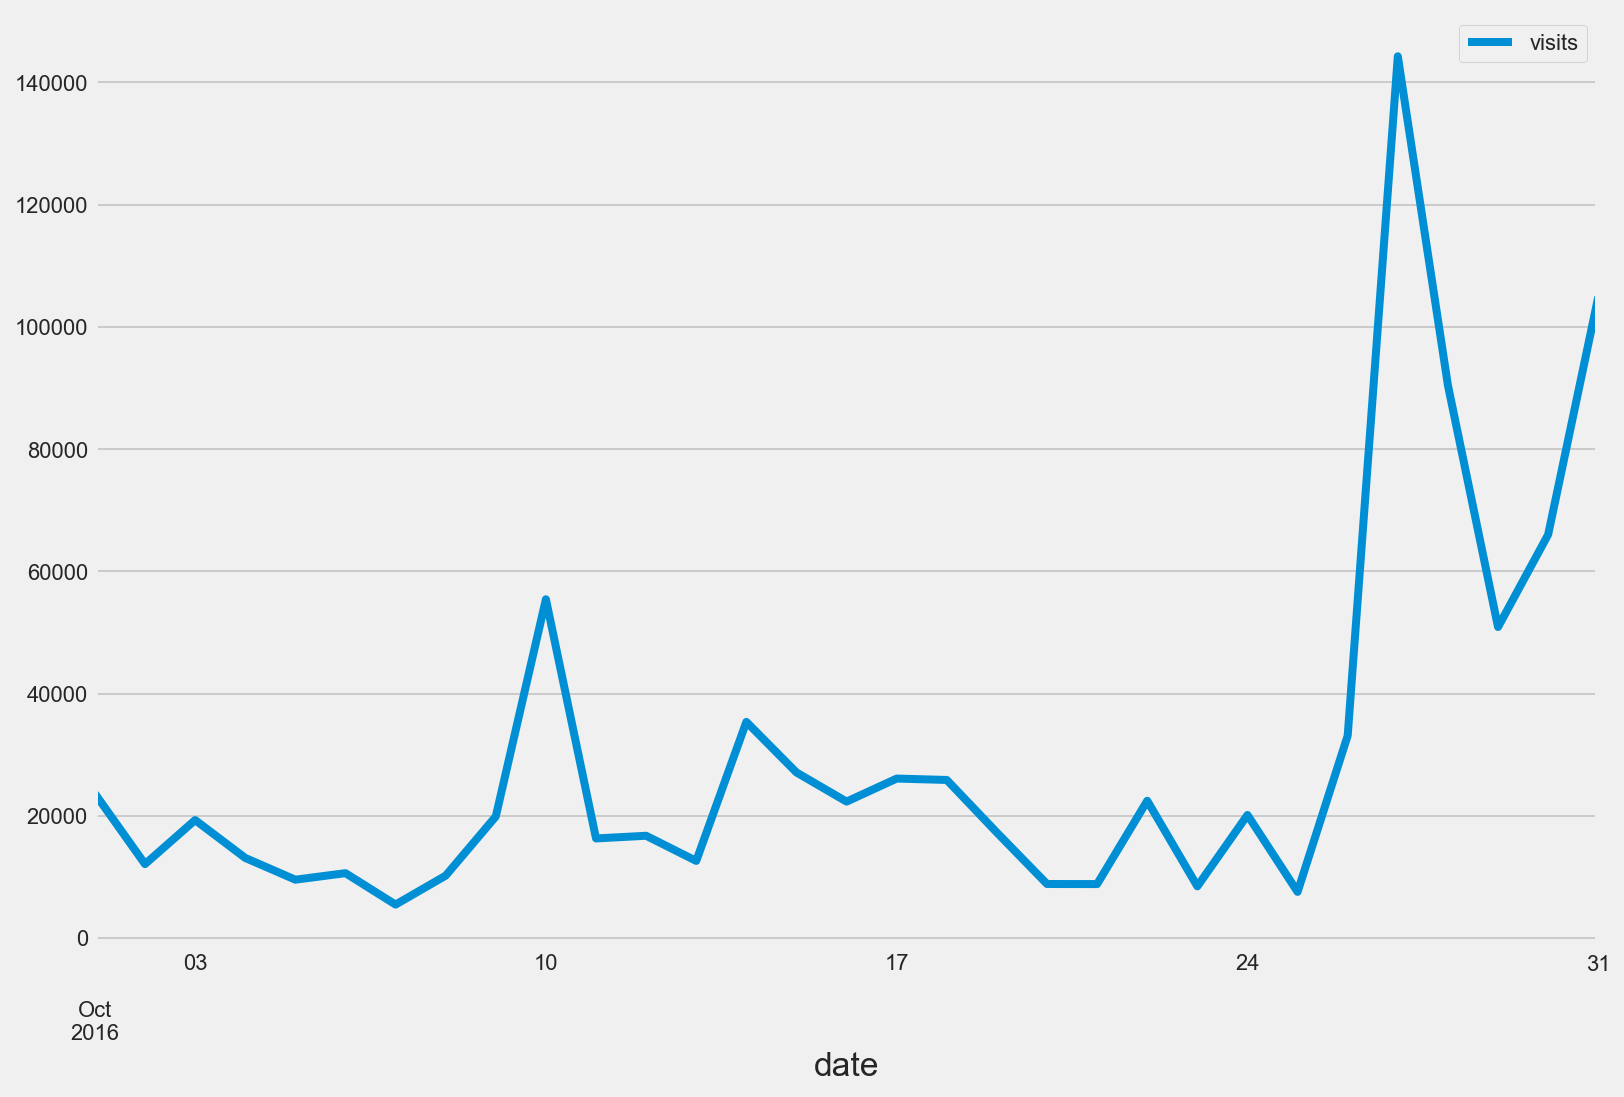

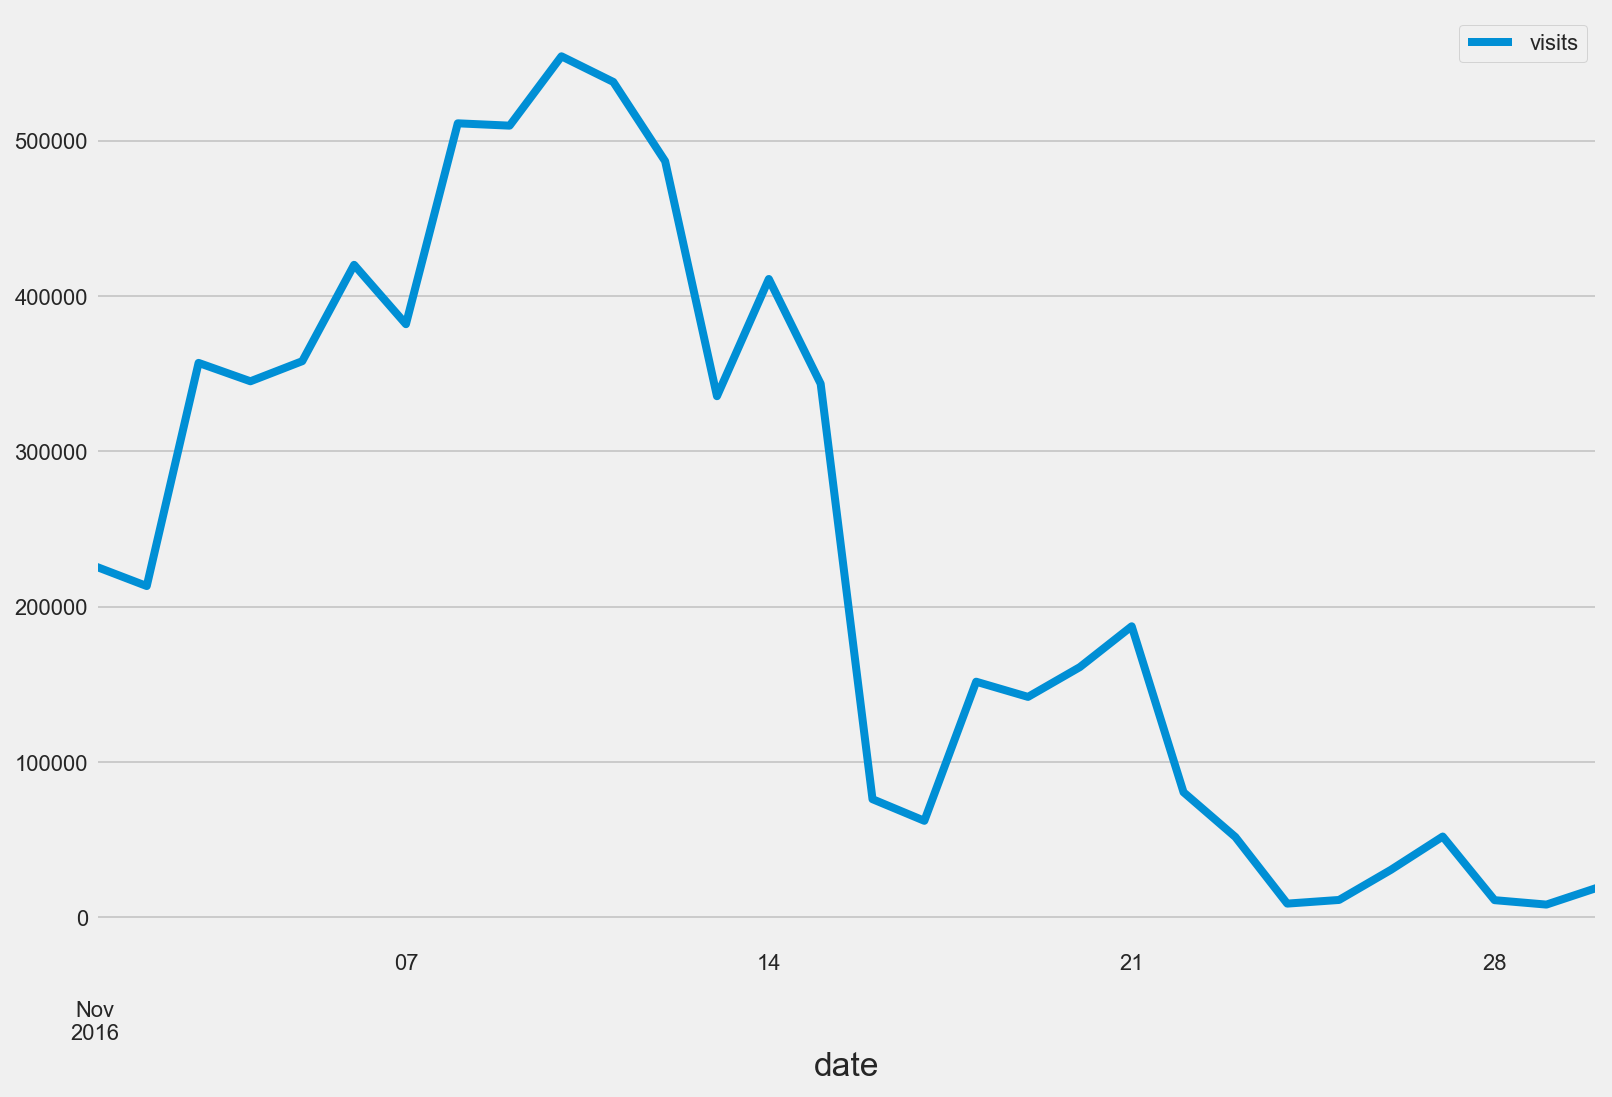

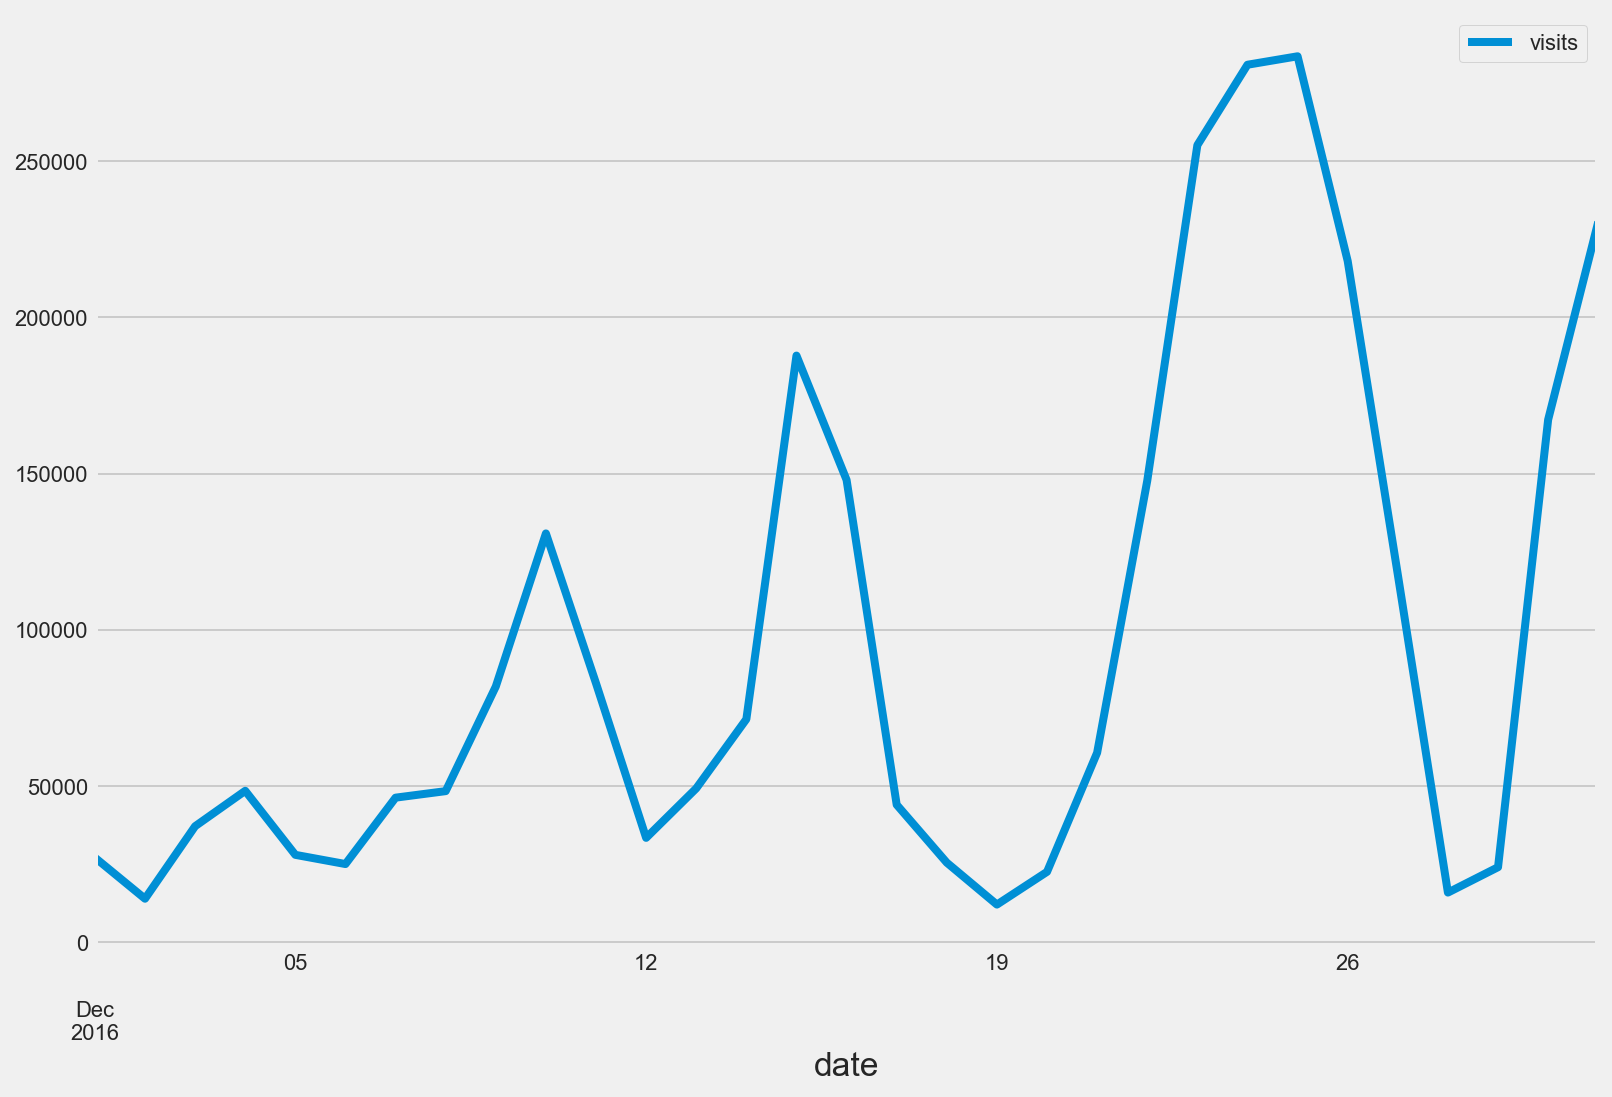

In [19]:
ts.groupby(ts.index.month).plot();

## Language monthly mean

In [20]:
df.head(2)

Page       date  visits month  \
0   Sean_Connery_en.wikipedia.org_desktop_all-agents 2016-01-01    4872     1   
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã... 2016-01-01       6     1   

  day quarter  dayofweek  dayofyear day_name month_name  weekend  weekday  \
0   1       1          4          1   Friday    January    False     True   
1   1       1          4          1   Friday    January    False     True   

          mean  median       agent   access           project  \
0  3405.661133  2624.0  all-agents  desktop  en.wikipedia.org   
1   170.841537    18.0  all-agents  desktop  fr.wikipedia.org   

                                                name lang language  
0                                       Sean_Connery   en  English  
1  Tableau_des_mÃ©dailles_des_Jeux_olympiques_d'Ã...   fr   French

In [21]:
fname_lang_monthly_mean = '../reports/figures/2016_sample001_monthly_visits.png'


if not os.path.isfile(fname_lang_monthly_mean):
    plt.figure(figsize=(12,12))
    sns.pointplot(x="month_name", y="visits", hue='language', data=df,estimator='mean')
    plt.savefig(fname_lang_monthly_mean, dpi=300)

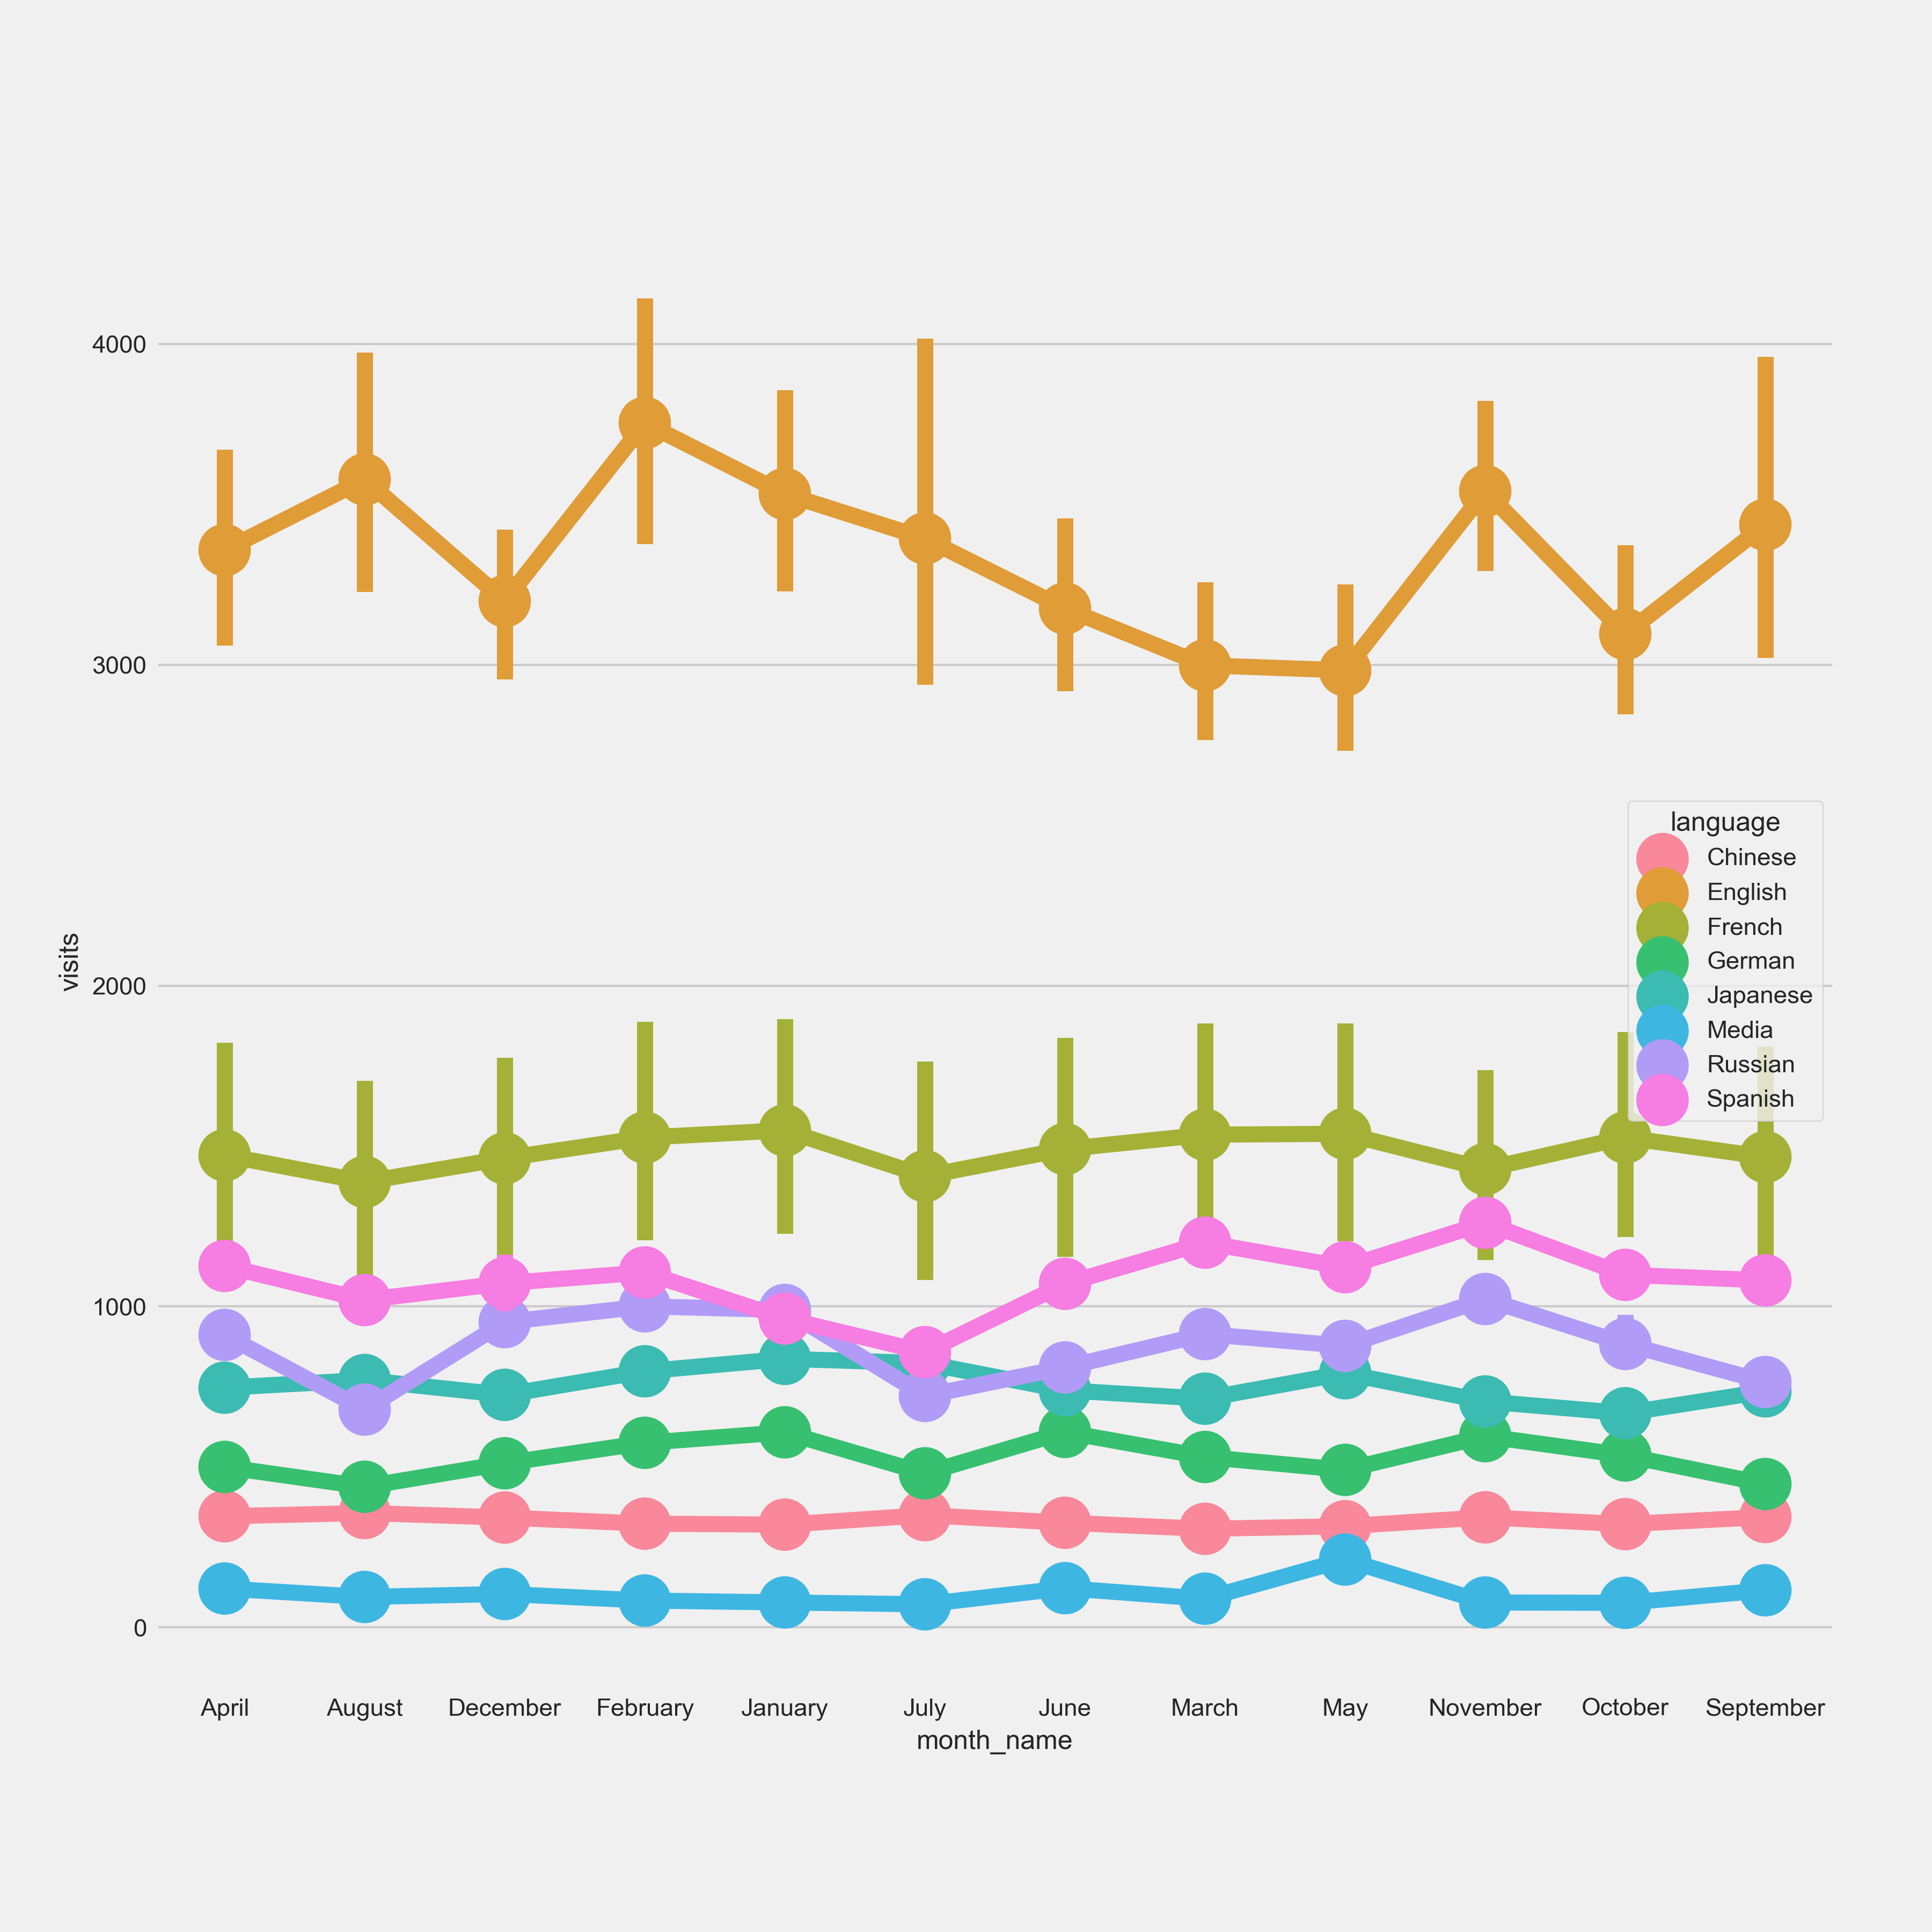

In [22]:
Image(fname_lang_monthly_mean)

In [23]:
# df.groupby(['month_name', 'language'])['visits'].sum().unstack().reset_index()
# TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

In [24]:
df.groupby(['month_name', 'language'])['visits'].mean().unstack()

language      Chinese      English     French      German      Japanese  \
month_name                                                                
January     342.459193  2621.086510  573.951784  512.001337  867.843043   
February    329.817599  2338.958621  549.187087  530.061461  674.786584   
March       301.278336  2168.100733  516.006177  541.103961  663.204943   
April       313.879964  3600.553636  470.413298  456.632297  665.828192   
May         374.369822  2445.316129  461.631263  600.784891  915.704381   
June        475.481603  2828.781364  383.480142  572.915371  708.529519   
July        378.291380  2493.361437  361.601407  440.325088  738.719628   
August      330.799048  2101.702933  403.728895  382.253050  713.152143   
September   325.865756  2338.375455  397.074823  457.672193  675.521559   
October     350.985722  2059.808211  410.550961  467.847902  737.381159   
November    394.443716  3549.760455  457.678723  757.351813  736.341294   
December    402.447735  2727.078152  467.288092  509.881665  748.898732   

language      Media       Russian      Spanish   
month_name                                       
January      86.918603  891.316836   879.596647  
February     97.250313  821.931507  1185.318219  
March       144.932475  821.942996  1180.546355  
April       116.374957  789.744064  1166.903412  
May         112.023901  726.005303  1289.404369  
June         96.194128  910.601826  1247.700000  
July         82.590172  620.536677  1085.744729  
August      104.909243  683.399912  1305.298959  
September   113.057513  668.401598  1370.632808  
October     112.381915  728.887539  1194.172212  
November    104.715371  744.500228  1586.094751  
December    110.517466  864.160407  1003.130302

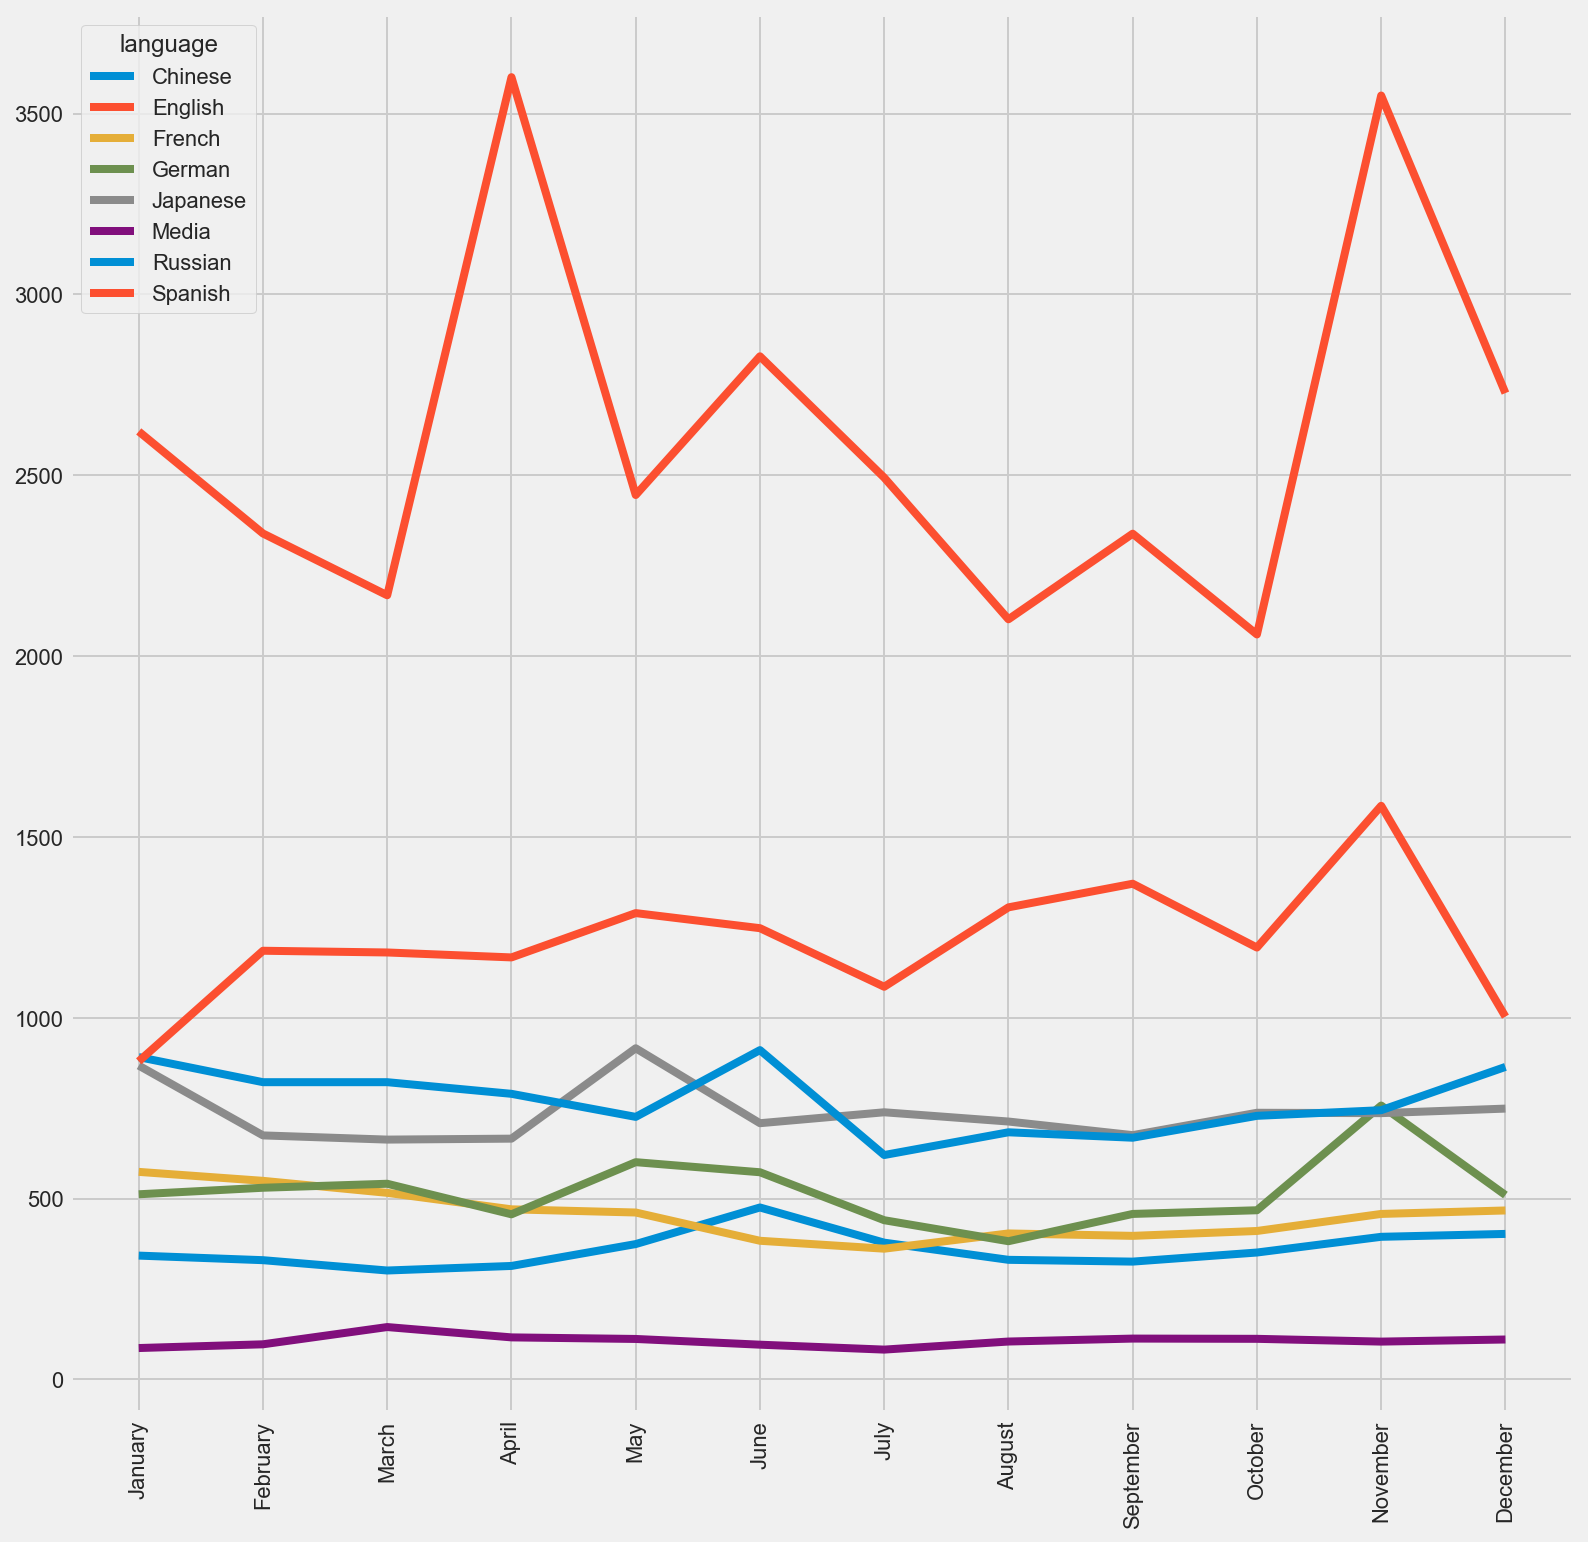

In [25]:
ax = df.groupby(['month_name', 'language'])['visits'].mean().unstack()\
.reset_index(drop=True).plot(figsize=(12,12), logy=False )

plt.xticks(range(12), rotation=90)
ax.set_xticklabels(df['month_name'].unique());

In [26]:
# exclude english and compare others

In [27]:
# plt.figure(figsize=(12,12))

# df.query("""language != 'English'""").pipe((sns.pointplot,'data'), x='month_name',
#                                                         y='visits',hue='language')
# # ValueError: 'c' argument has 12 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

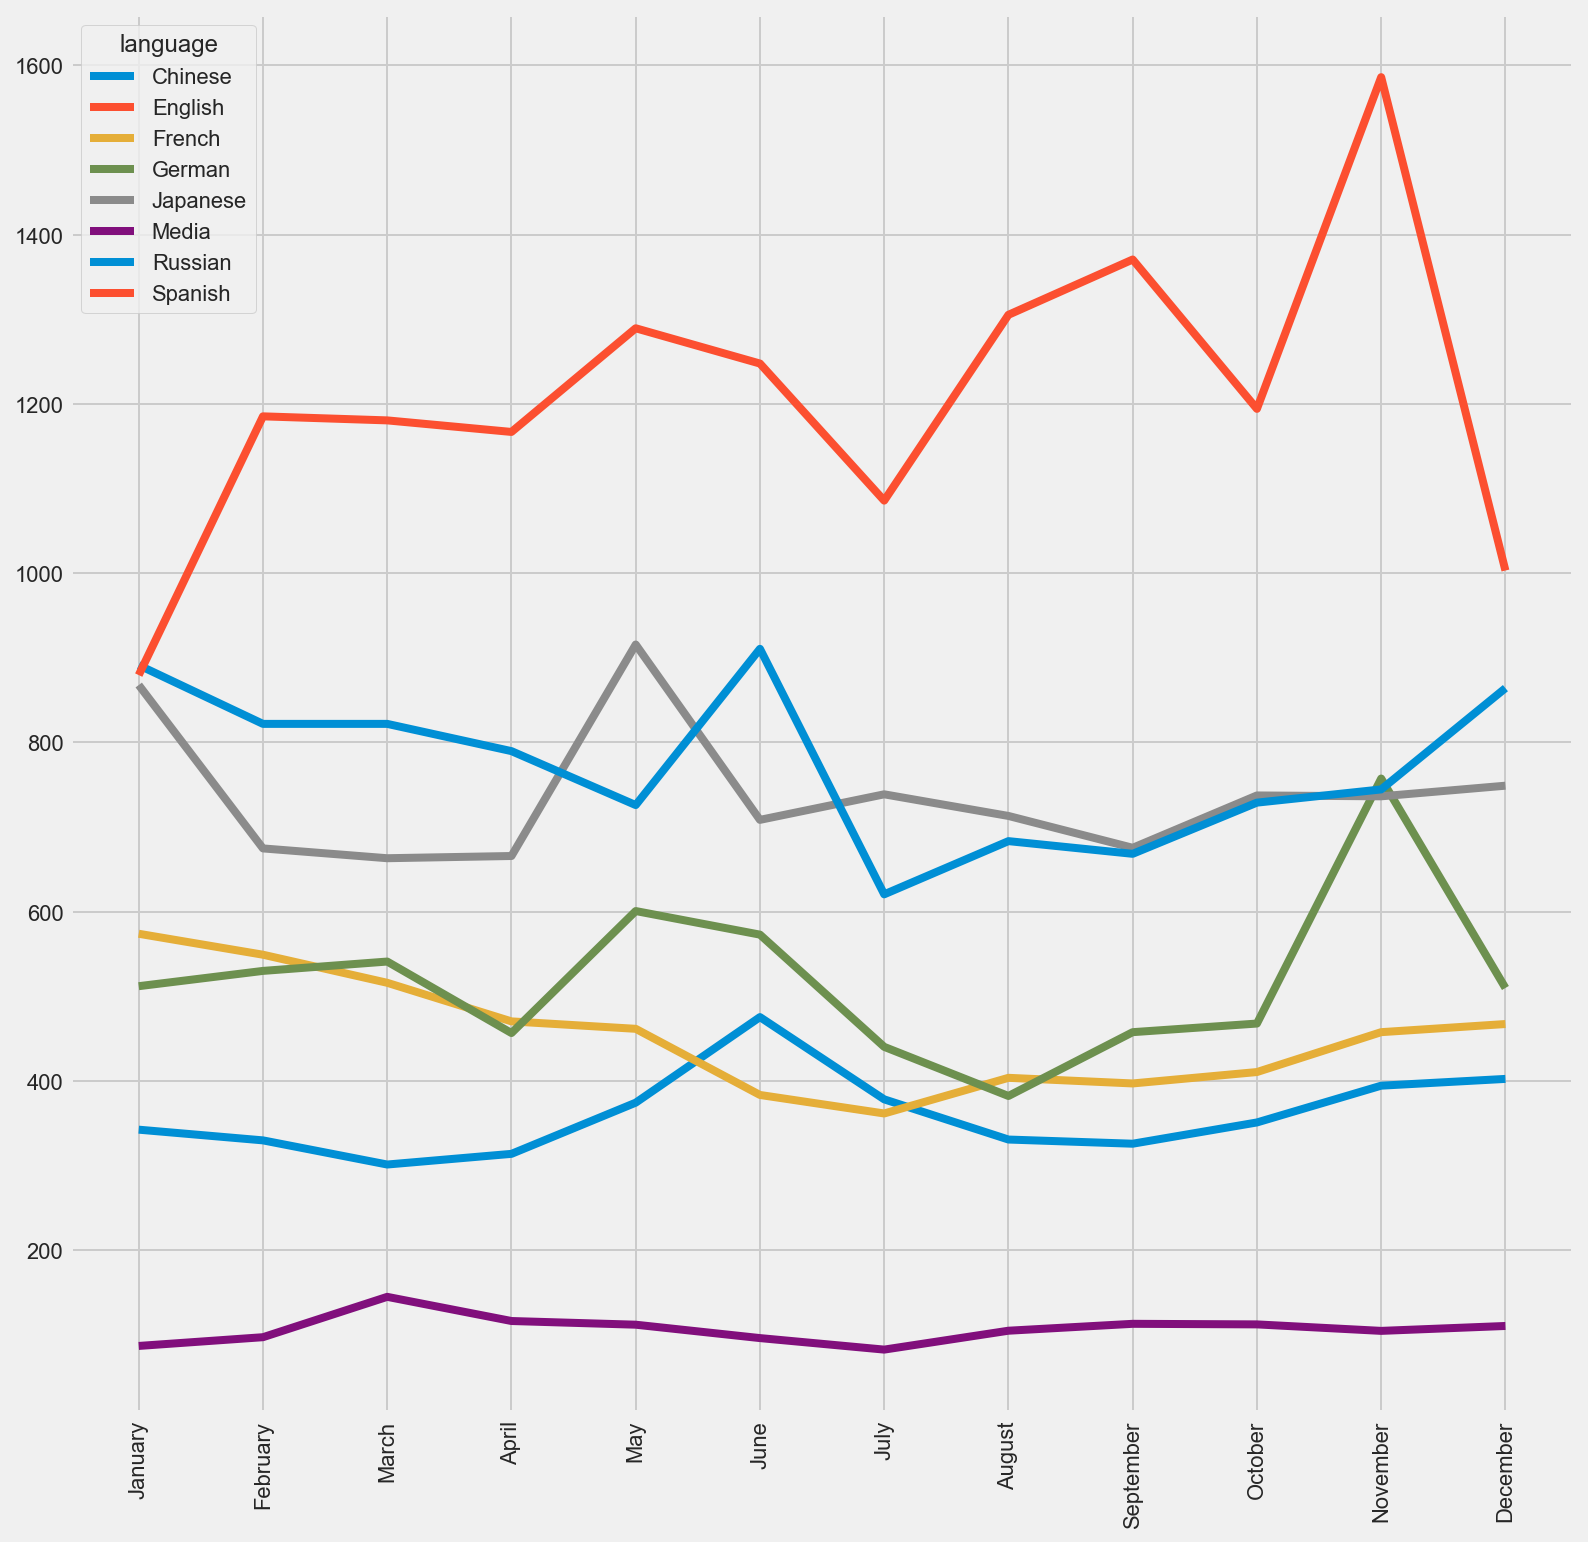

In [28]:
ax = df.query("""language != 'English'""")\
.groupby(['month_name', 'language'])['visits'].mean().unstack()\
.reset_index(drop=True).plot(figsize=(12,12), logy=False )

plt.xticks(range(12), rotation=90)
ax.set_xticklabels(df['month_name'].unique());

## Timeseries per language

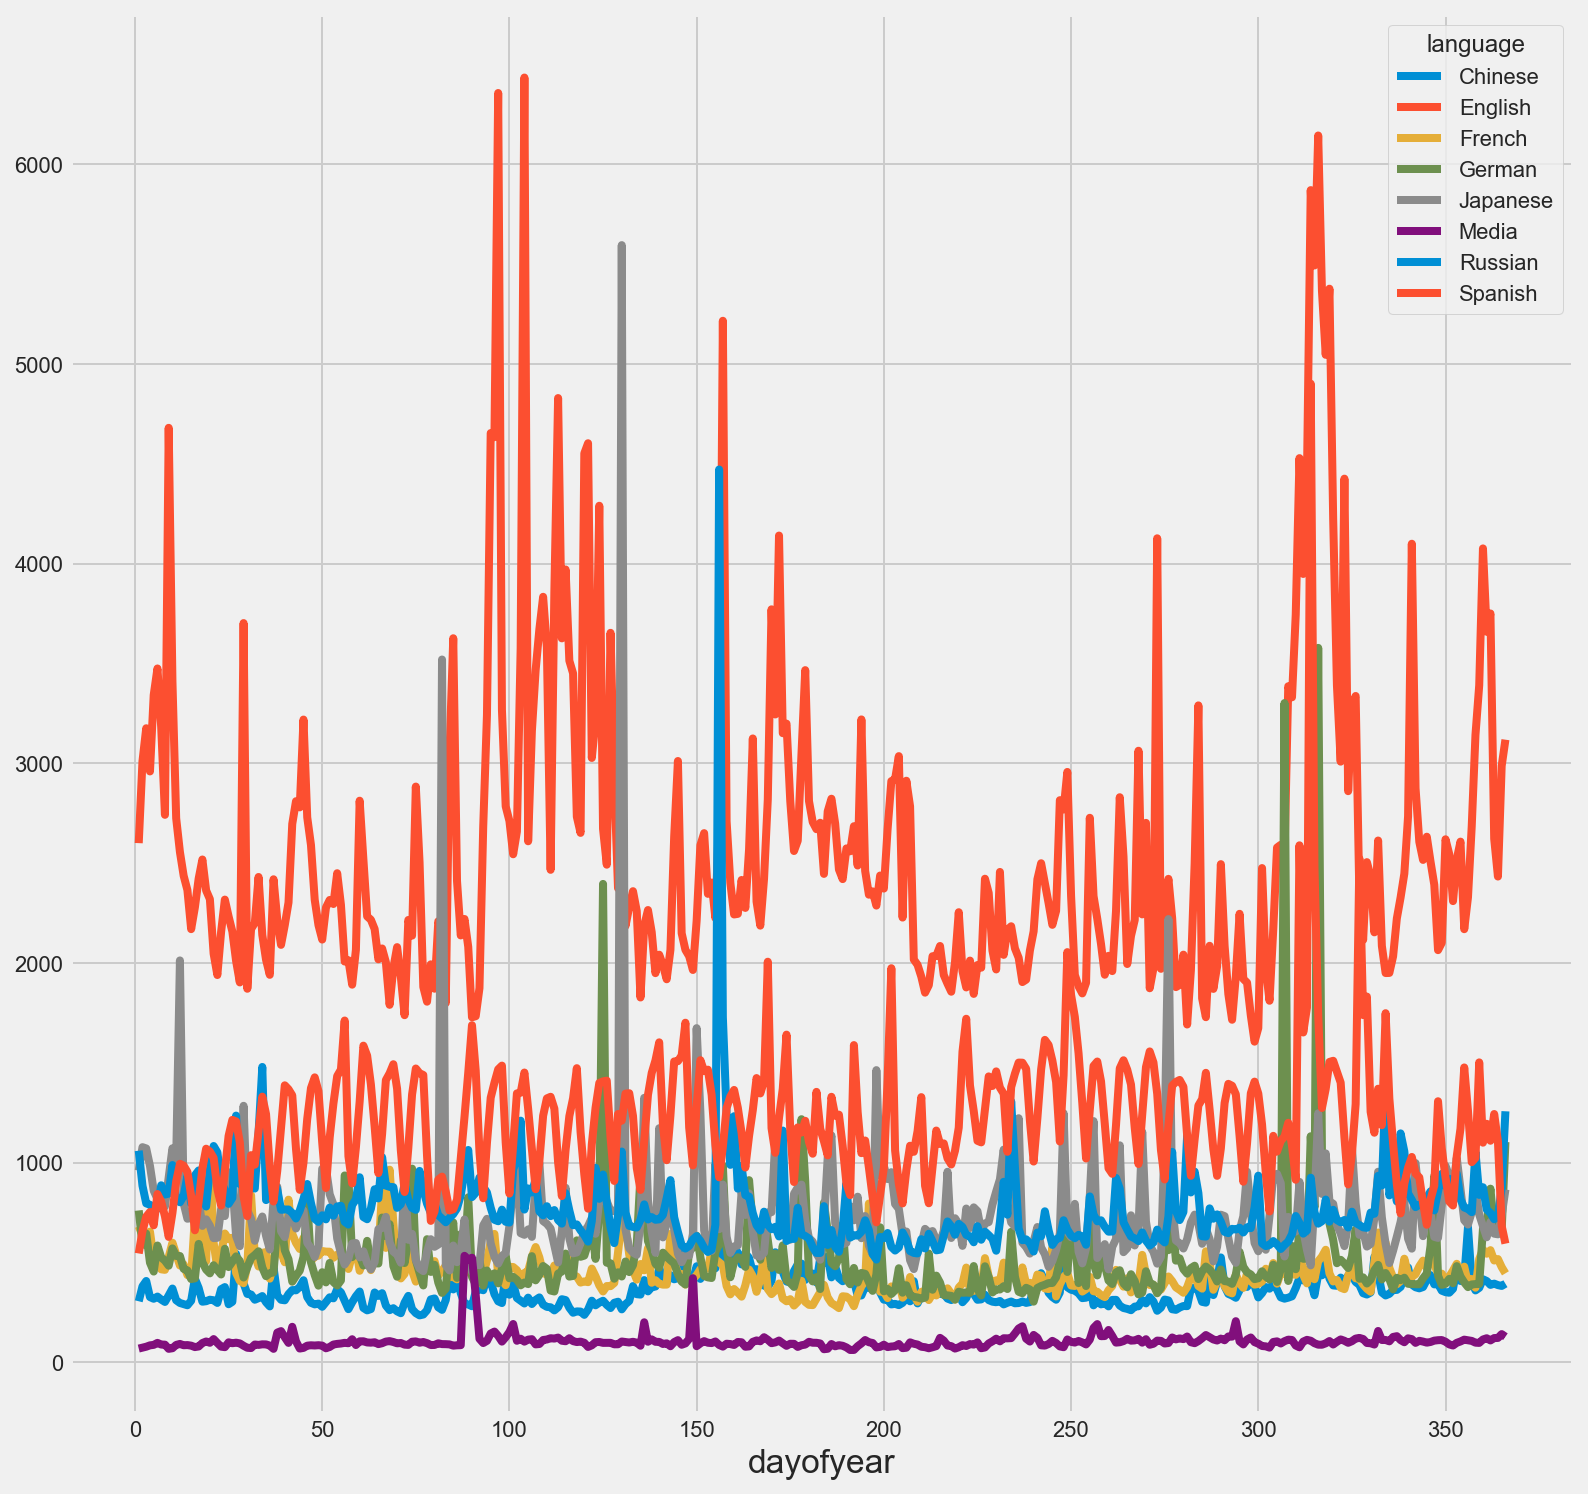

In [29]:
df.groupby(['dayofyear', 'language'])['visits'].mean().unstack().plot(figsize=(12,12))
plt.savefig('../reports/figures/daily_visits.png',dpi=300)

In [30]:
%%time
# plt.figure(figsize=(12,12))
# sns.lineplot(x='dayofyear',y='visits',hue='language',data=df)

# Wall time: 2min 27s

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


## Page Visits per Week Day

In [31]:
df['day_name'].unique().categories

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

CPU times: user 2.56 s, sys: 26.2 ms, total: 2.59 s
Wall time: 2.6 s


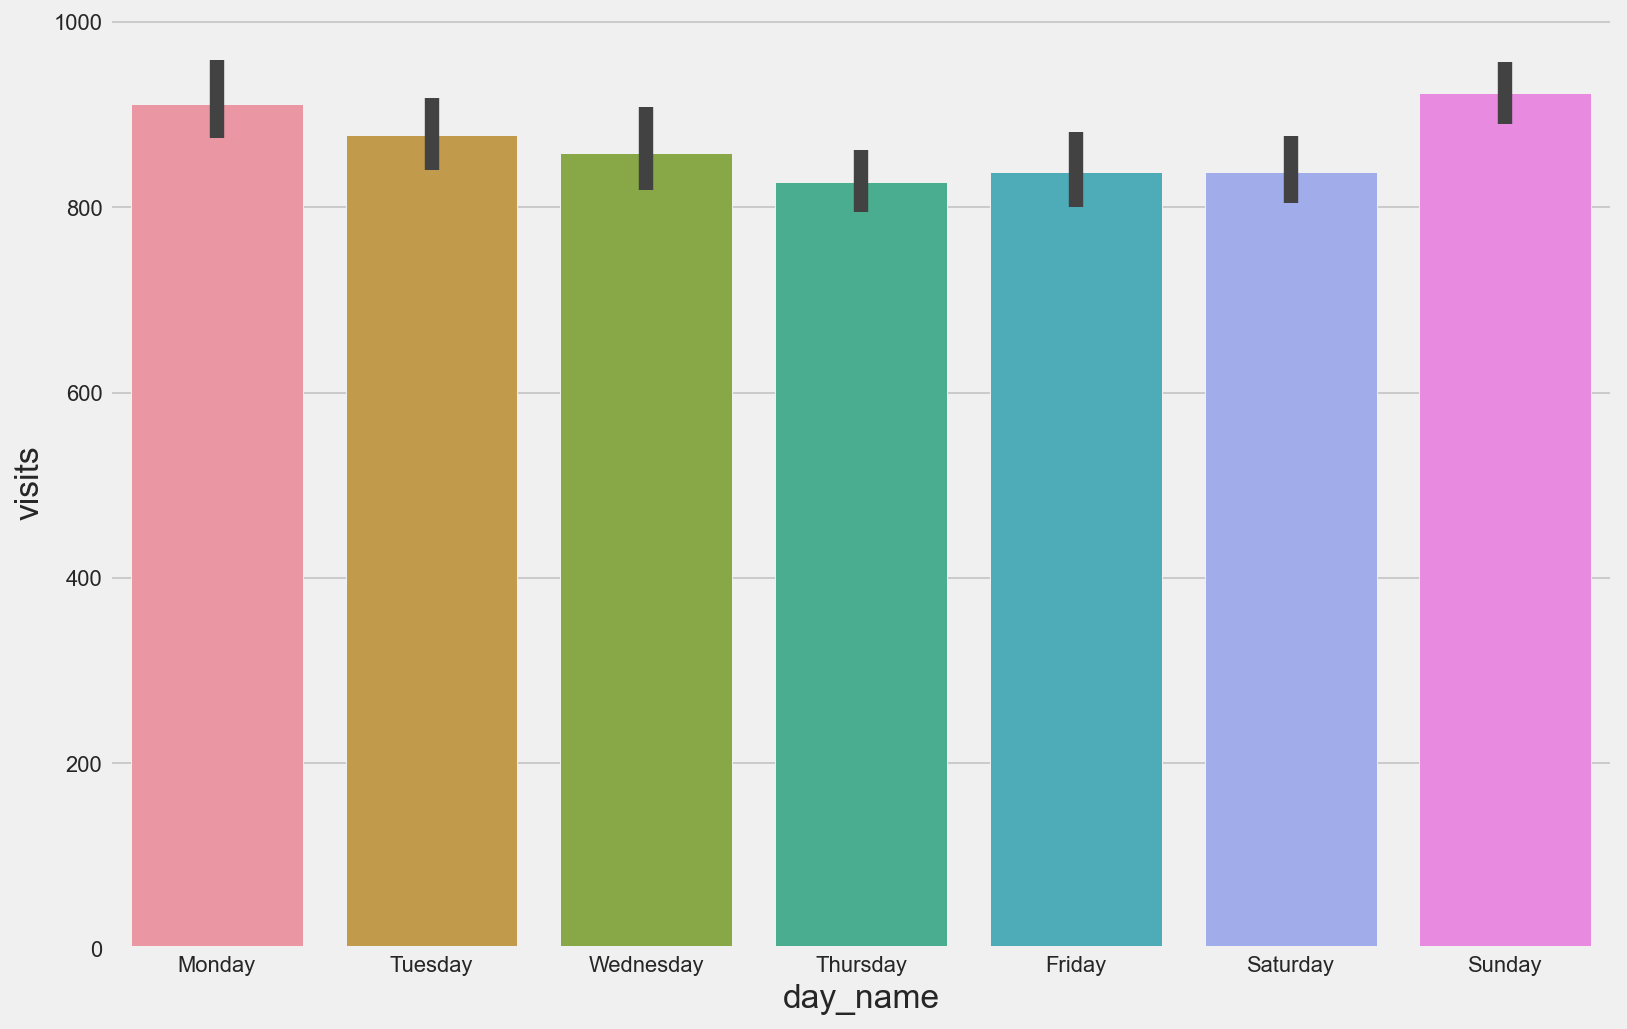

In [32]:
%%time
sns.barplot(x='day_name',y='visits',data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'])

plt.savefig('../reports/figures/visits_by_weekday.png')

CPU times: user 24.5 ms, sys: 2.14 ms, total: 26.7 ms
Wall time: 25.5 ms


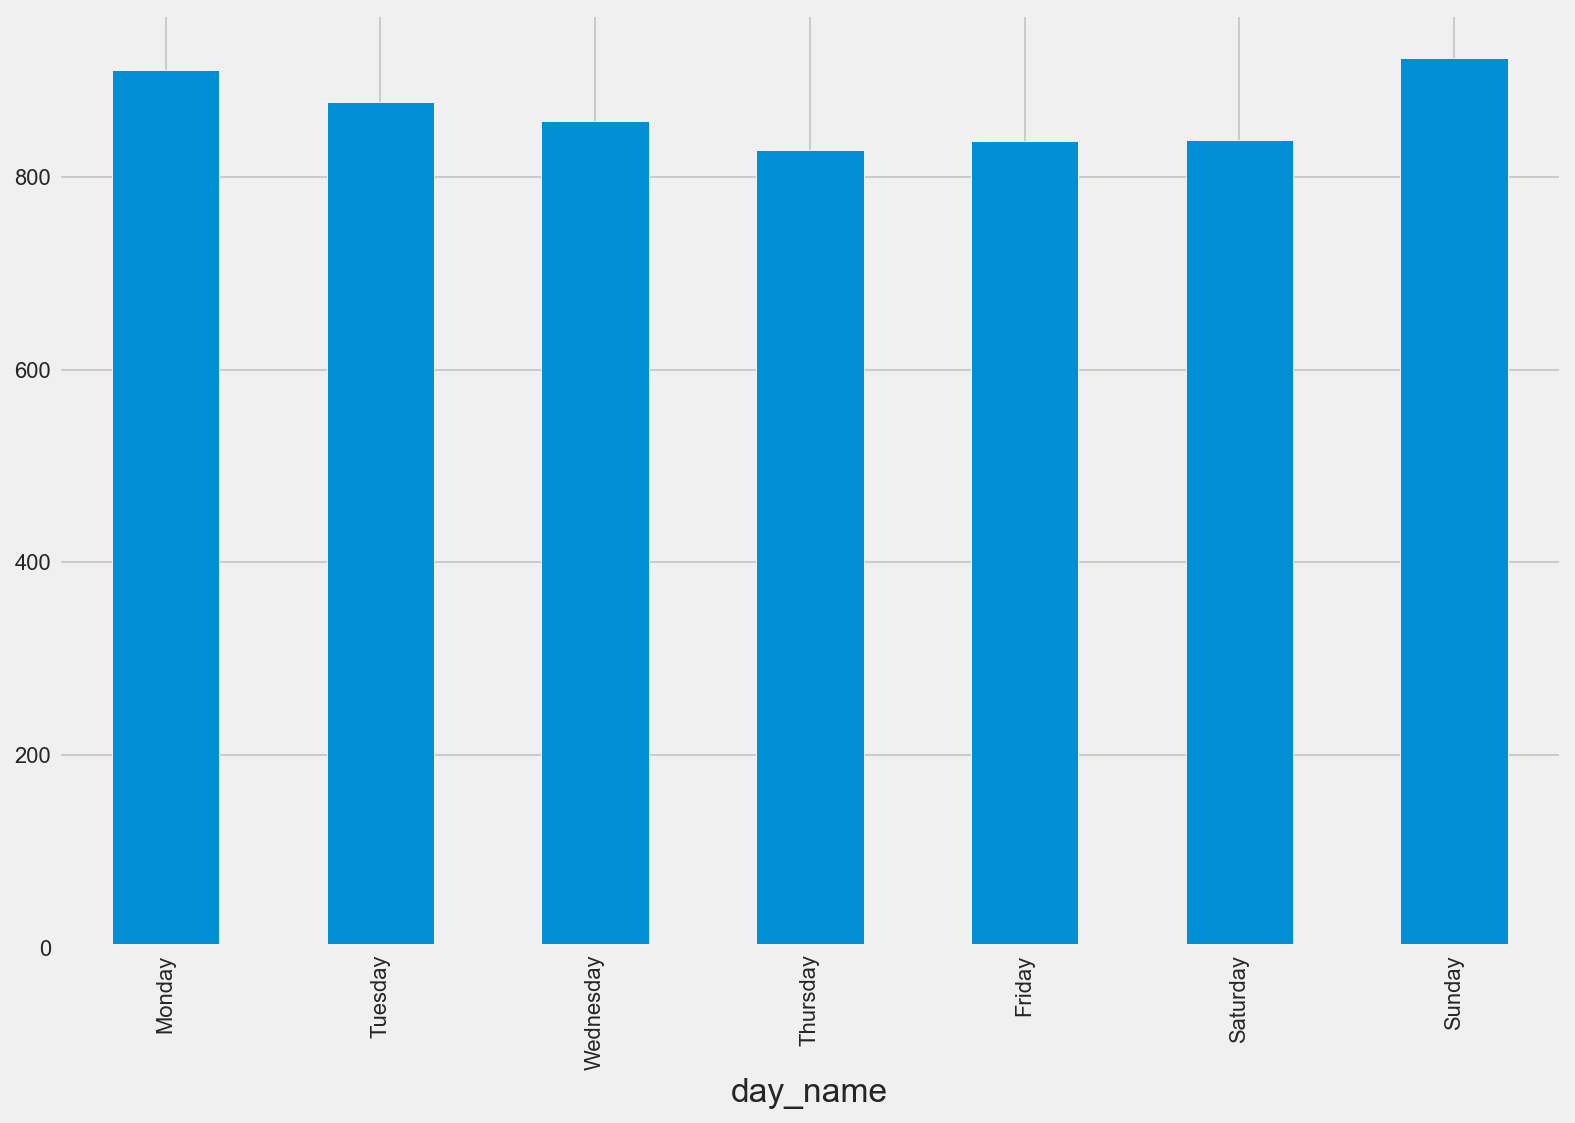

In [33]:
%%time
df.groupby('day_name')['visits'].mean().sort_index().plot.bar()

CPU times: user 25.8 ms, sys: 1.26 ms, total: 27.1 ms
Wall time: 25.9 ms


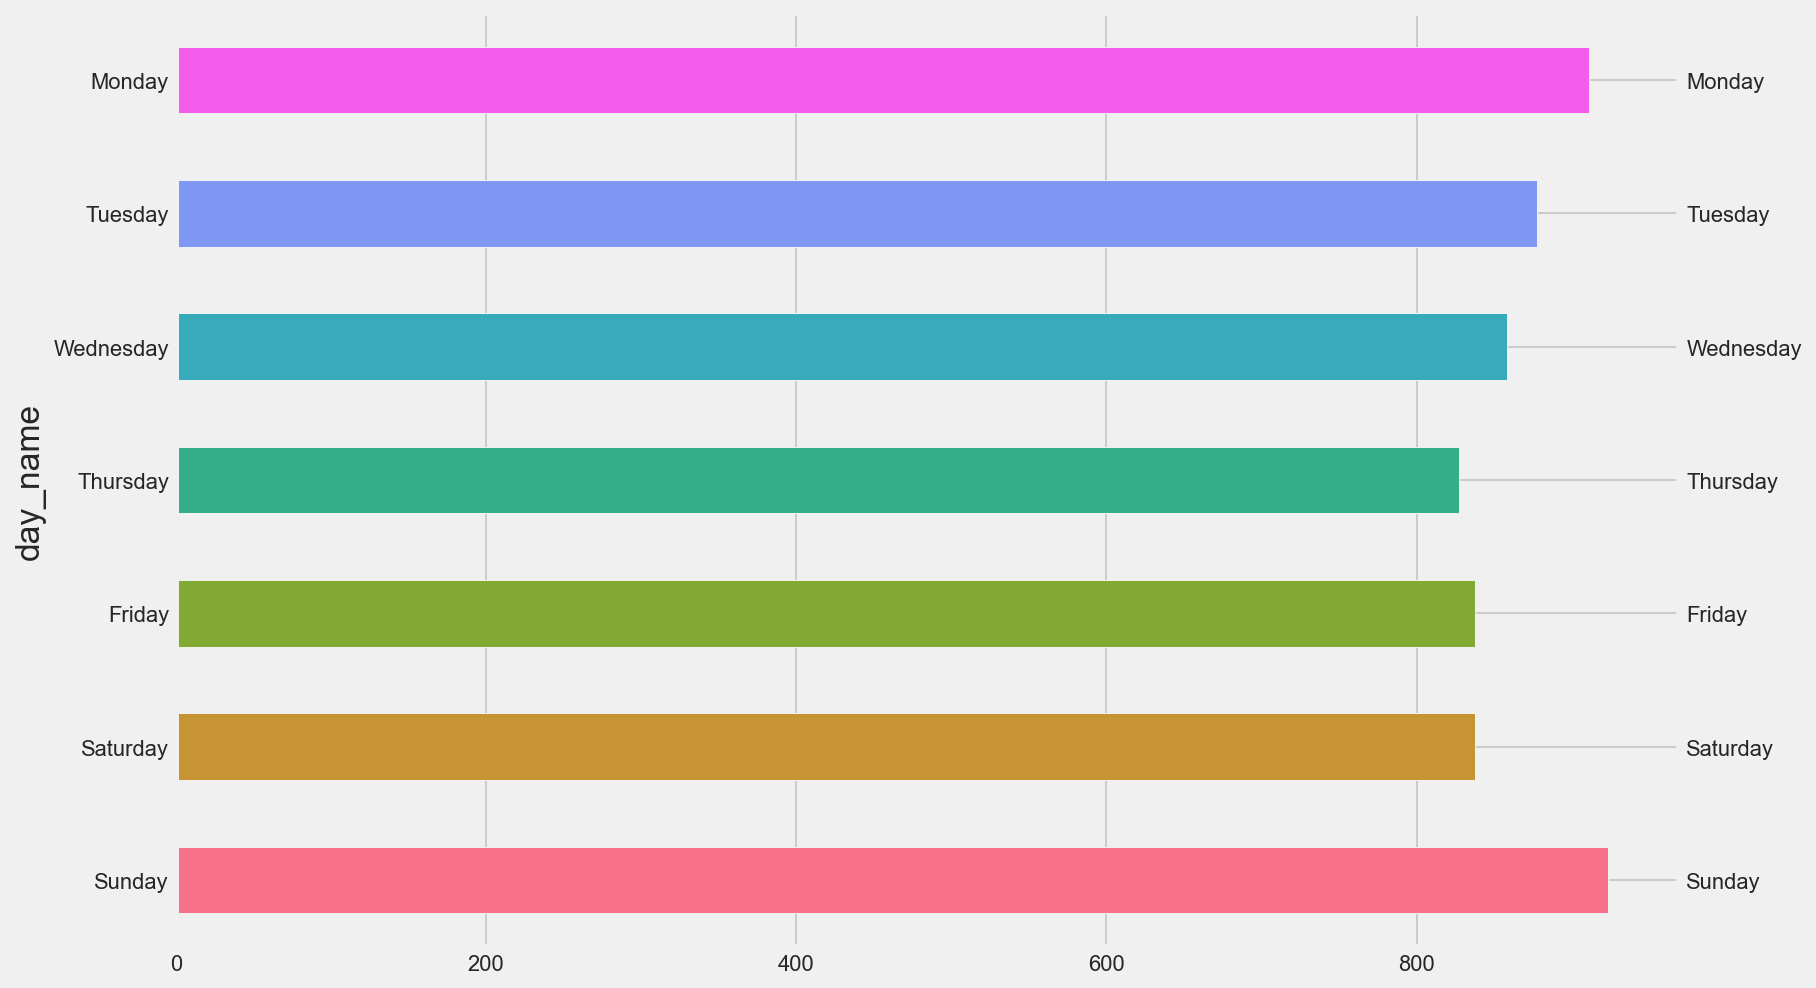

In [34]:
%%time
ax = df.groupby('day_name')['visits'].mean().sort_index(ascending=False)\
.plot.barh(use_index=True, color=sns.color_palette('husl',7))


plt.tick_params(axis='y', which='both', labelright='on')

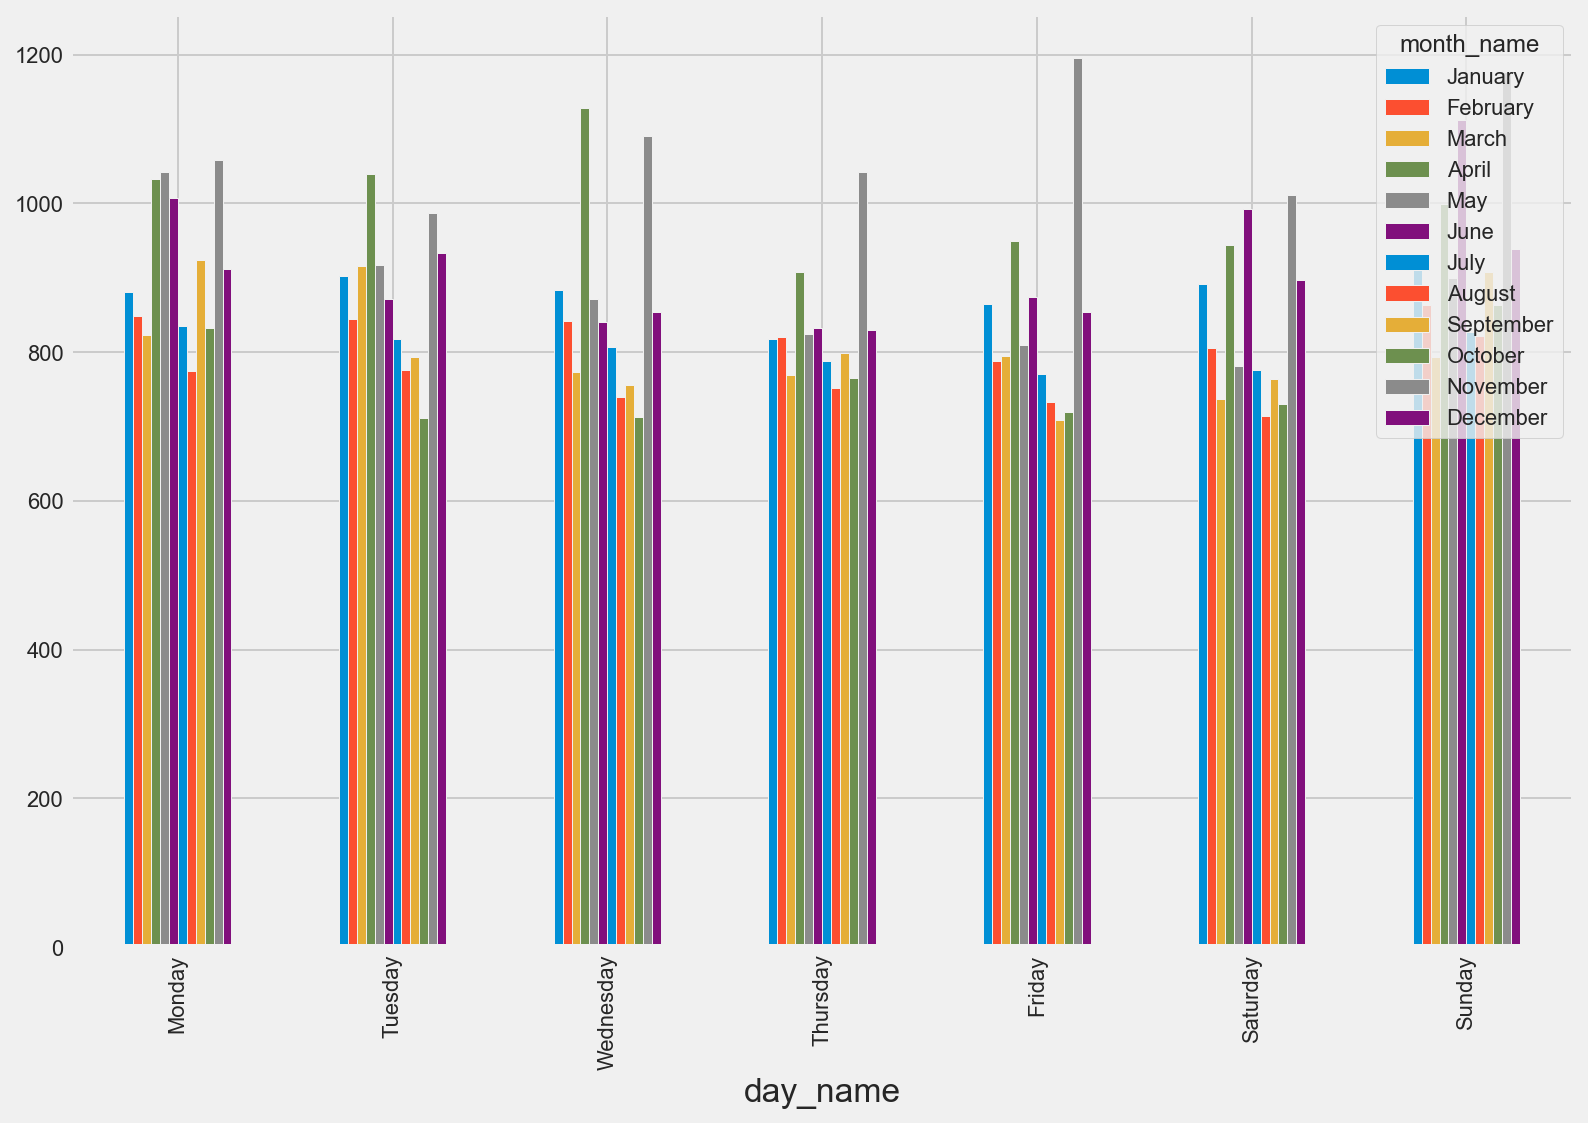

In [35]:
df.groupby(['day_name','month_name'])['visits'].mean().sort_index(ascending=False).unstack().plot.bar()

CPU times: user 2.96 s, sys: 99.9 ms, total: 3.06 s
Wall time: 2.62 s


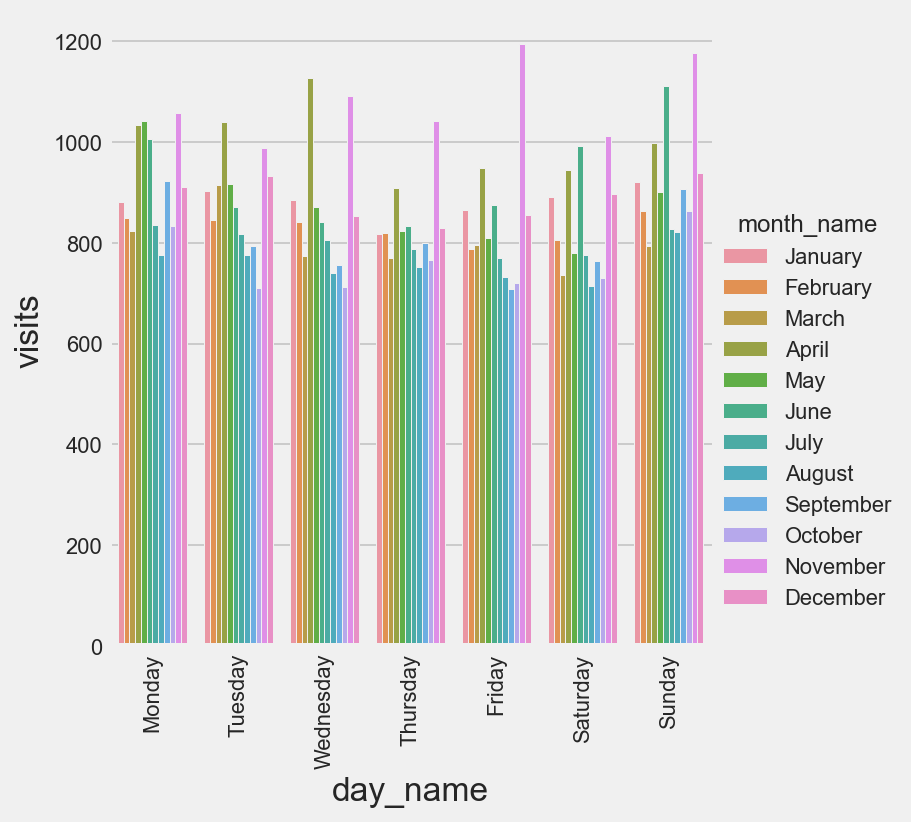

In [36]:
%%time
sns.catplot(data=df, kind='bar',ci=None,
            x='day_name',y='visits',hue='month_name')
plt.xticks(rotation=90)

plt.savefig('../reports/figures/visits_per_month_per_weekday.png')

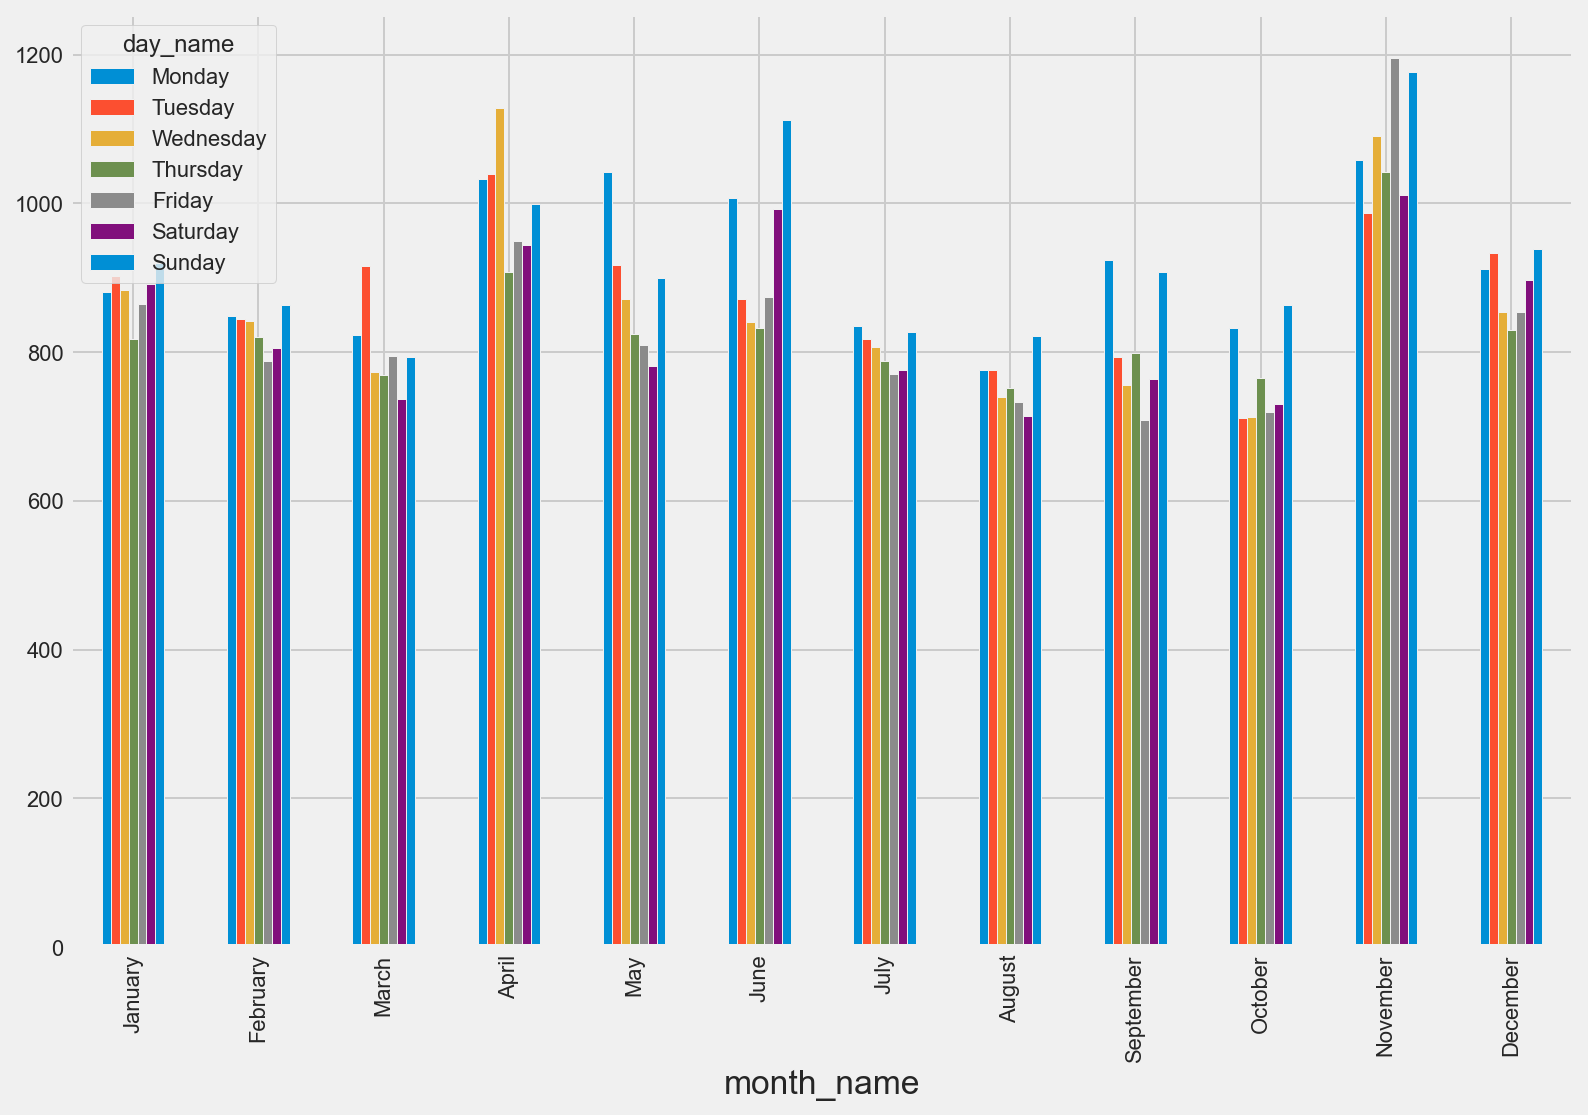

In [37]:
df.groupby(['day_name','month_name'])['visits'].mean().sort_index(ascending=False).unstack(0).plot.bar()

## Page Visits per Month Day

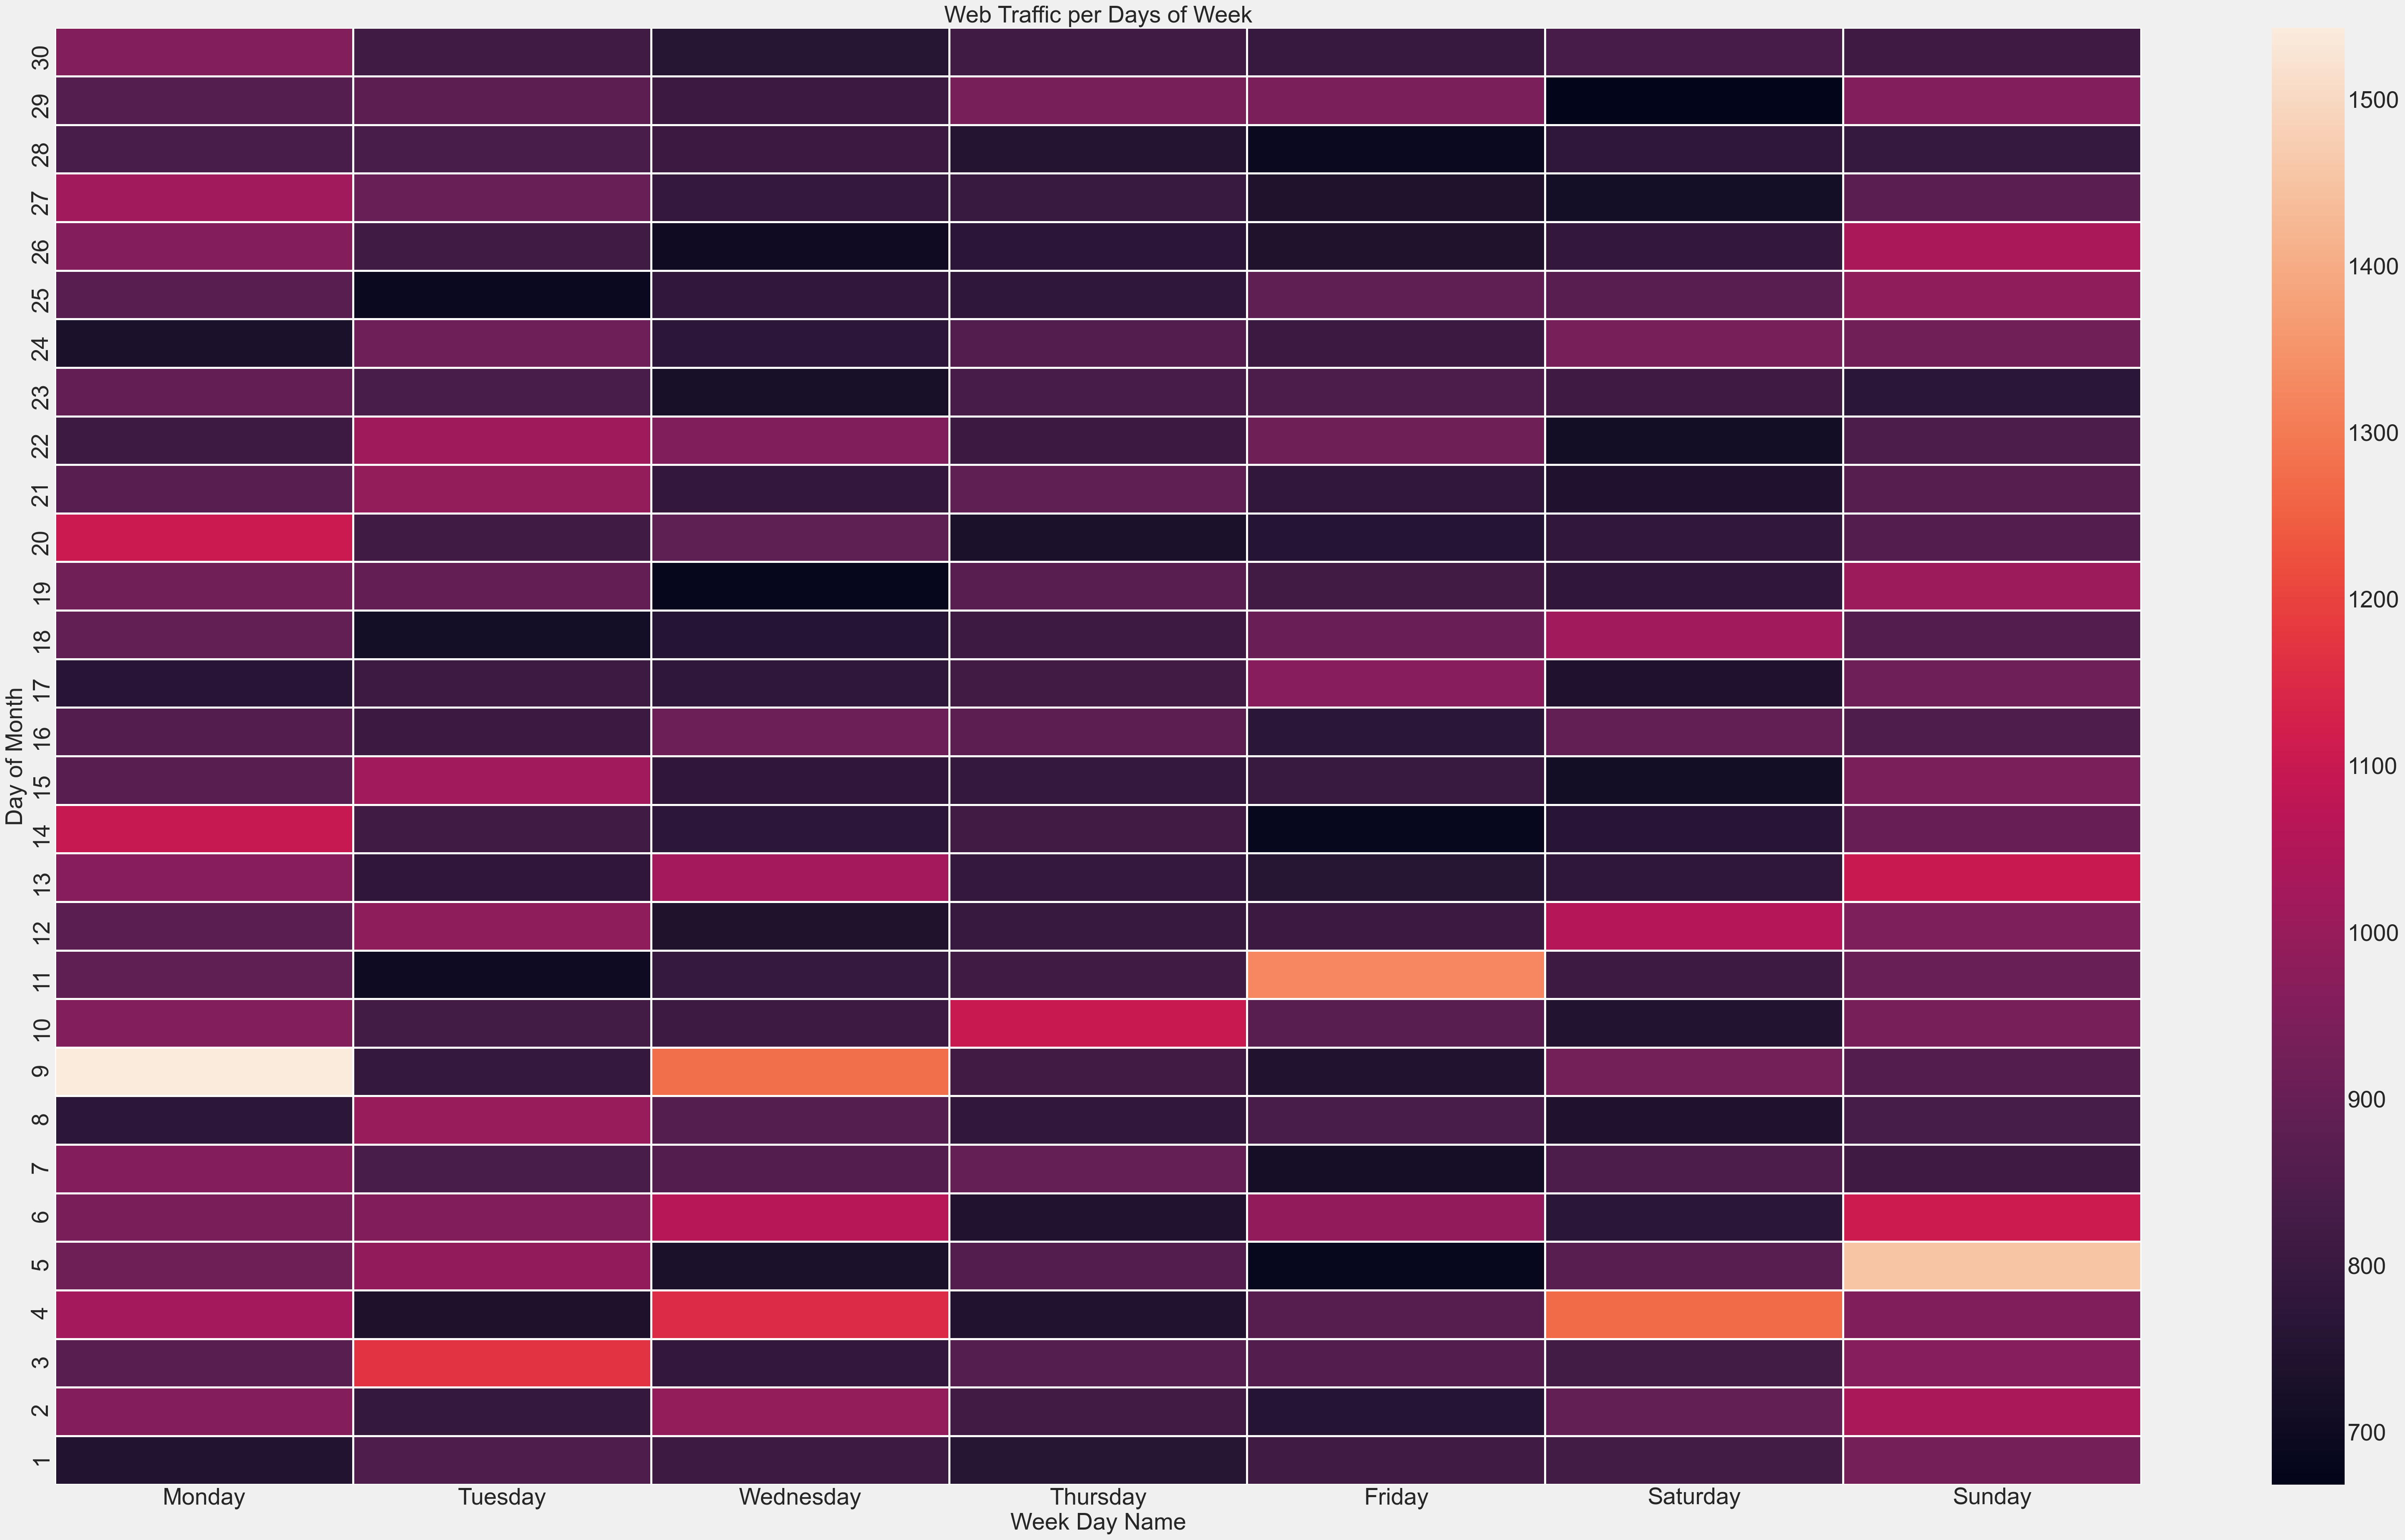

In [38]:
df1 = df.groupby(["day_name", "day"])['visits'].mean().reset_index()\
.pivot('day','day_name','visits').dropna()

fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(data=df1, annot=False, ax=ax, fmt="d", linewidths=2).invert_yaxis()
plt.title('Web Traffic per Days of Week',fontsize=28)

plt.xlabel('Week Day Name', fontsize=28)
plt.ylabel('Day of Month', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)
plt.savefig('../reports/figures/visits_per_dayofmonth_per_dayofweek.png')
plt.show()

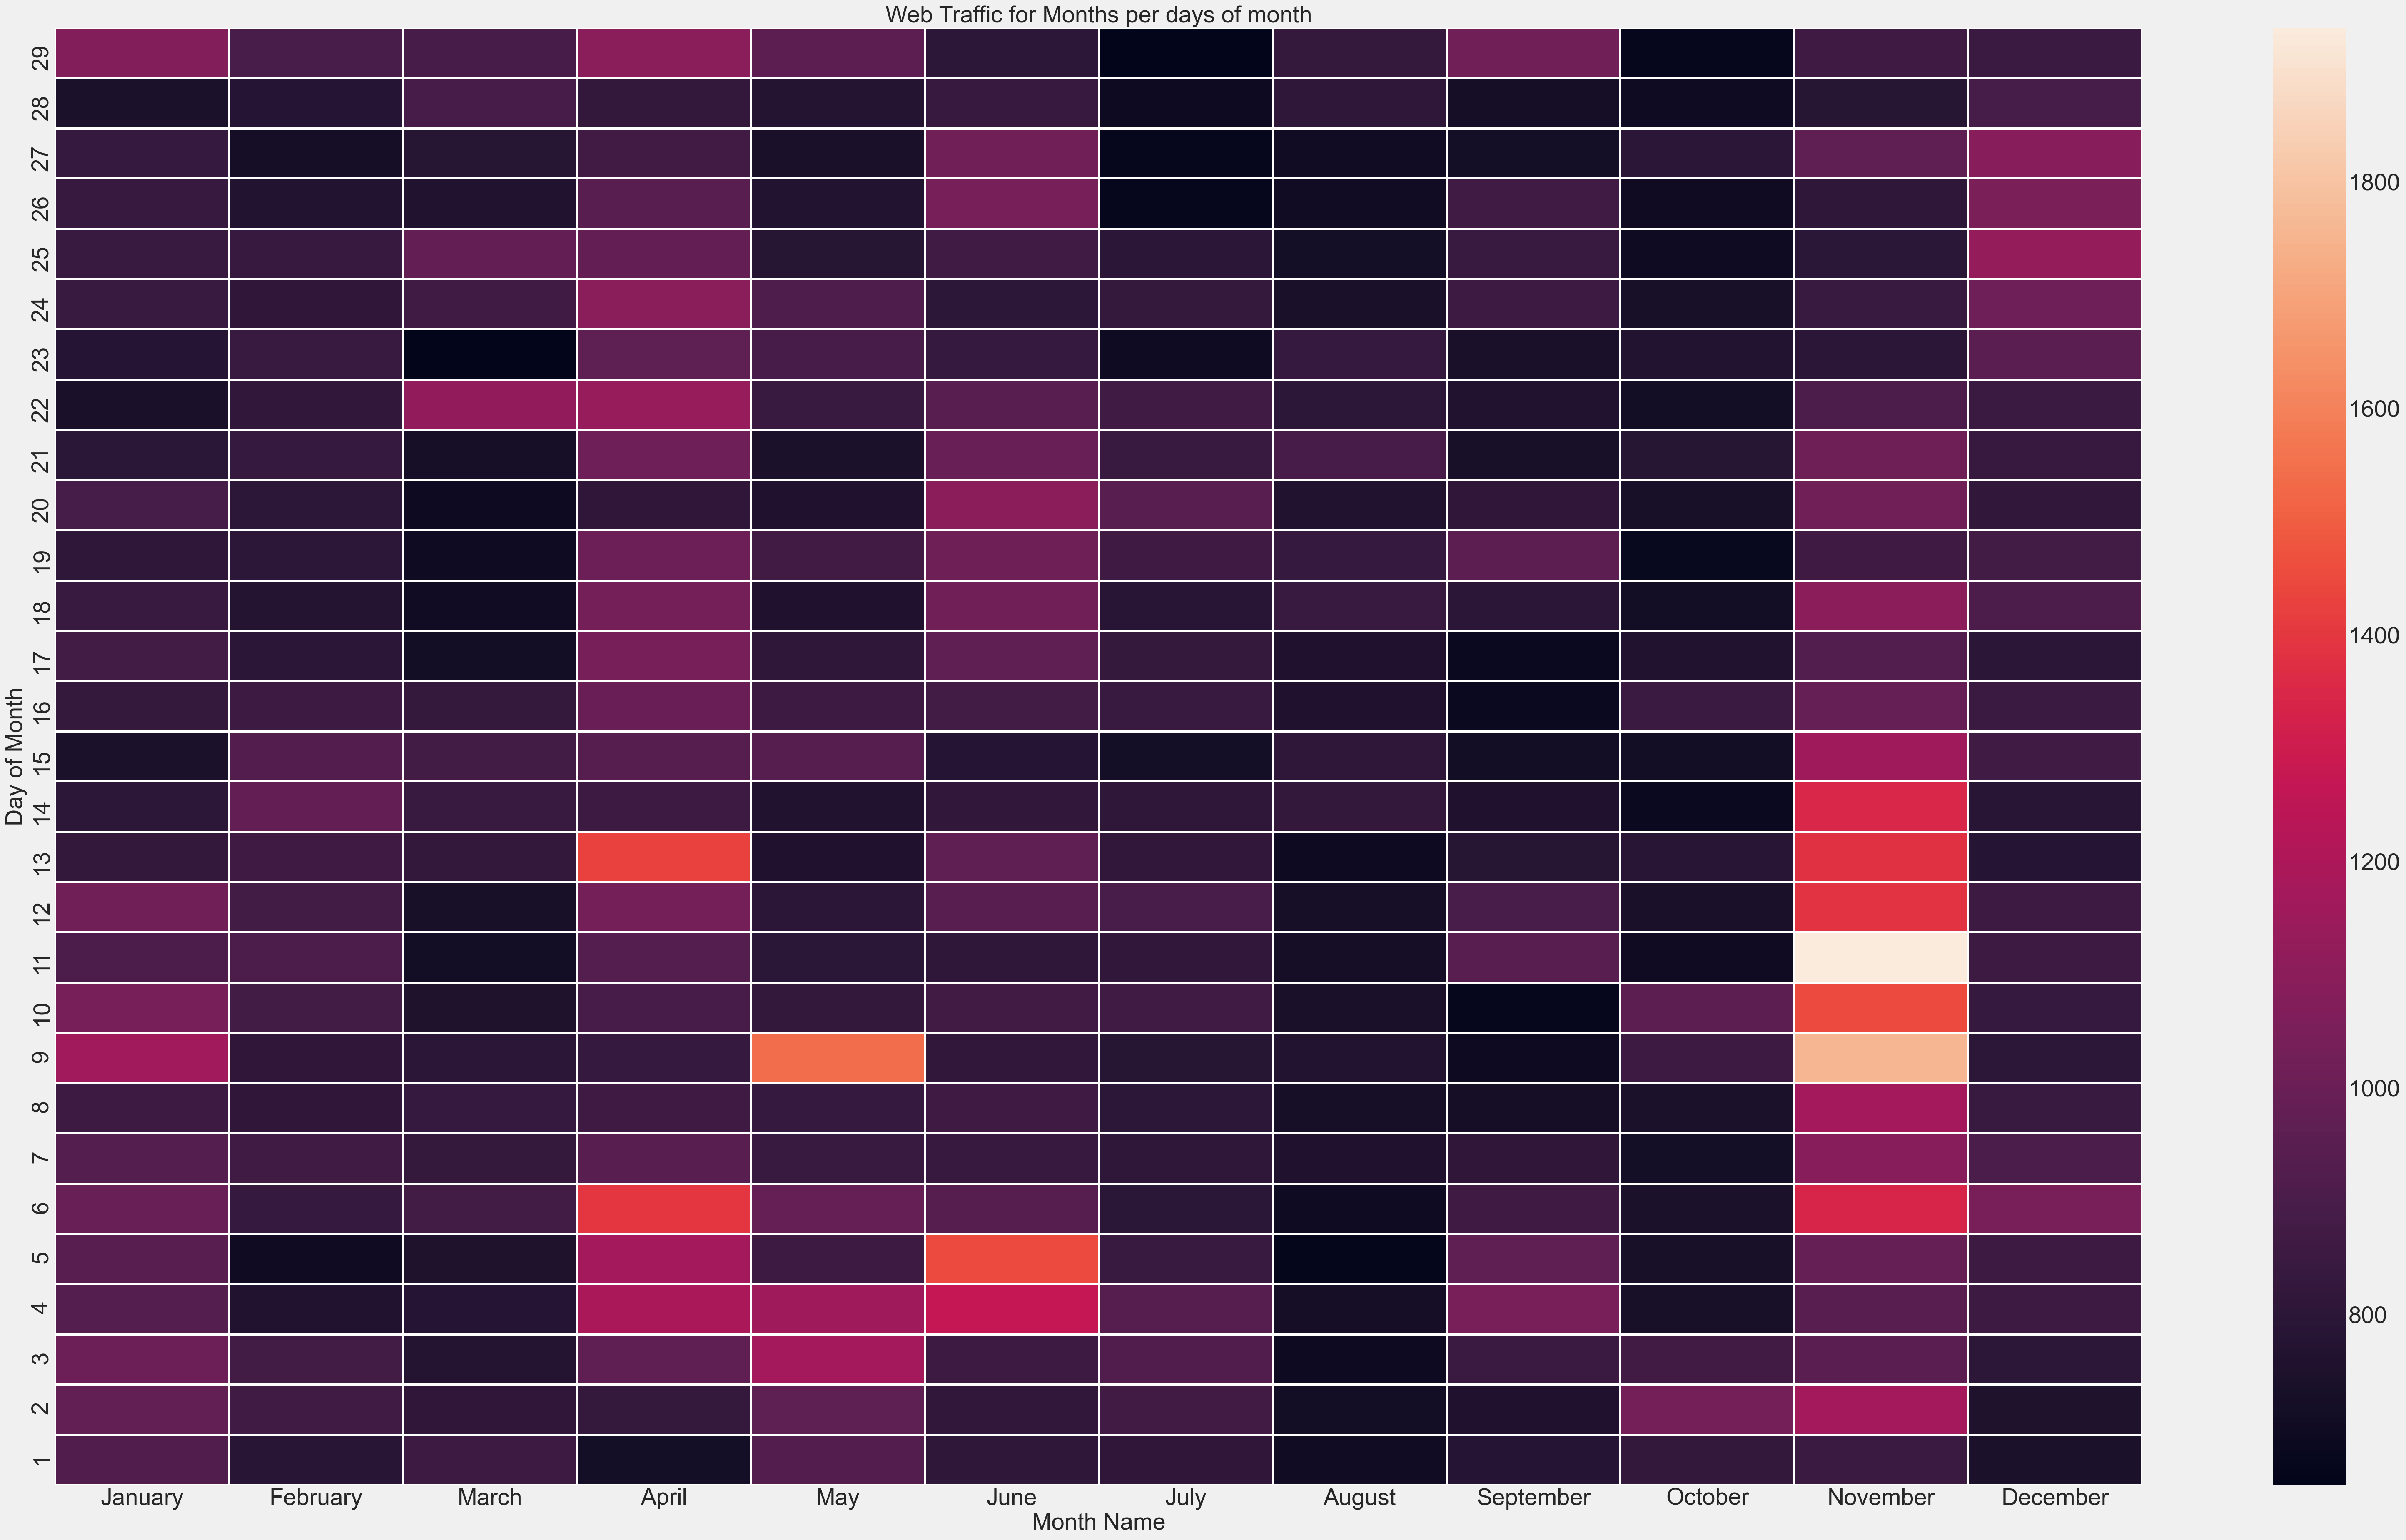

In [39]:
df1 = df.groupby(["month_name", "day"])['visits'].mean().reset_index()\
.pivot('day','month_name','visits').dropna()

fig, ax = plt.subplots(figsize=(50, 30))
# sns.set(font_scale=3)
sns.heatmap(data=df1, annot=False, ax=ax, fmt="d", linewidths=2).invert_yaxis()
plt.title('Web Traffic for Months per days of month',fontsize=28)

plt.xlabel('Month Name', fontsize=28)
plt.ylabel('Day of Month', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

plt.show()

## Fast Fourier Transform (FFT)

Resources:
- https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/
- https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration

Here we can that the plots seems periodic in nature in time domain.
We can work in the frequency domain using FFT transformation of the time series.
Peaks in the FFT show us the strongest frequencies in the periodic signal.

The Fourier transform is an alternative representation of a signal as a superposition of periodic components. It is an important mathematical result that any well-behaved function can be represented under this form. Whereas a time-varying signal is most naturally considered as a function of time, the Fourier transform represents it as a function of the frequency. A magnitude and a phase, which are both encoded in a single complex number, are associated to each frequency.

**The Discrete Fourier Transform**  
Let's consider a digital signal x represented by a vector $(x0,...,xN−1)$. We assume that this signal is regularly sampled. The Discrete Fourier Transform (DFT) of x is $X=(X0,...,XN−1)$ defined as:

$$
\forall k \in\{0, \ldots, N-1\}, \quad X_{k}=\sum_{n=0}^{N-1} x_{n} e^{-2\  i \pi k\  n / N}
$$

The DFT can be computed efficiently with the Fast Fourier Transform (FFT), an algorithm that exploits symmetries and redundancies in this definition to considerably speed up the computation. The complexity of the FFT is $O(NlogN)$ instead of $O(N^2)$ for the naive DFT. The FFT is one of the most important algorithms of the digital universe.


In [40]:
days = df['dayofyear'].unique()

In [41]:
df_daily = df.groupby(['dayofyear', 'language'])['visits'].mean().unstack()
df_daily.head()

language     Chinese      English     French      German       Japanese  \
dayofyear                                                                 
1          306.234973  2600.668182  681.744681  761.170984   961.223881   
2          381.191257  3011.259091  635.835106  589.082902  1078.119403   
3          407.907104  3176.172727  639.170213  645.492228  1071.691542   
4          327.142077  2959.886364  655.047872  499.595855   984.273632   
5          318.710383  3342.718182  519.462766  455.051813   860.353234   

language    Media        Russian     Spanish   
dayofyear                                      
1          69.383420  1060.171233  545.700787  
2          73.911917   884.945205  657.291339  
3          78.678756   796.493151  730.070866  
4          85.523316   789.609589  753.275591  
5          87.911917   771.342466  686.732283

In [42]:
df_daily.columns

CategoricalIndex(['Chinese', 'English', 'French', 'German', 'Japanese',
                  'Media', 'Russian', 'Spanish'],
                 categories=['Chinese', 'English', 'French', 'German', 'Japanese', 'Media', 'Russian', 'Spanish'], ordered=False, name='language', dtype='category')

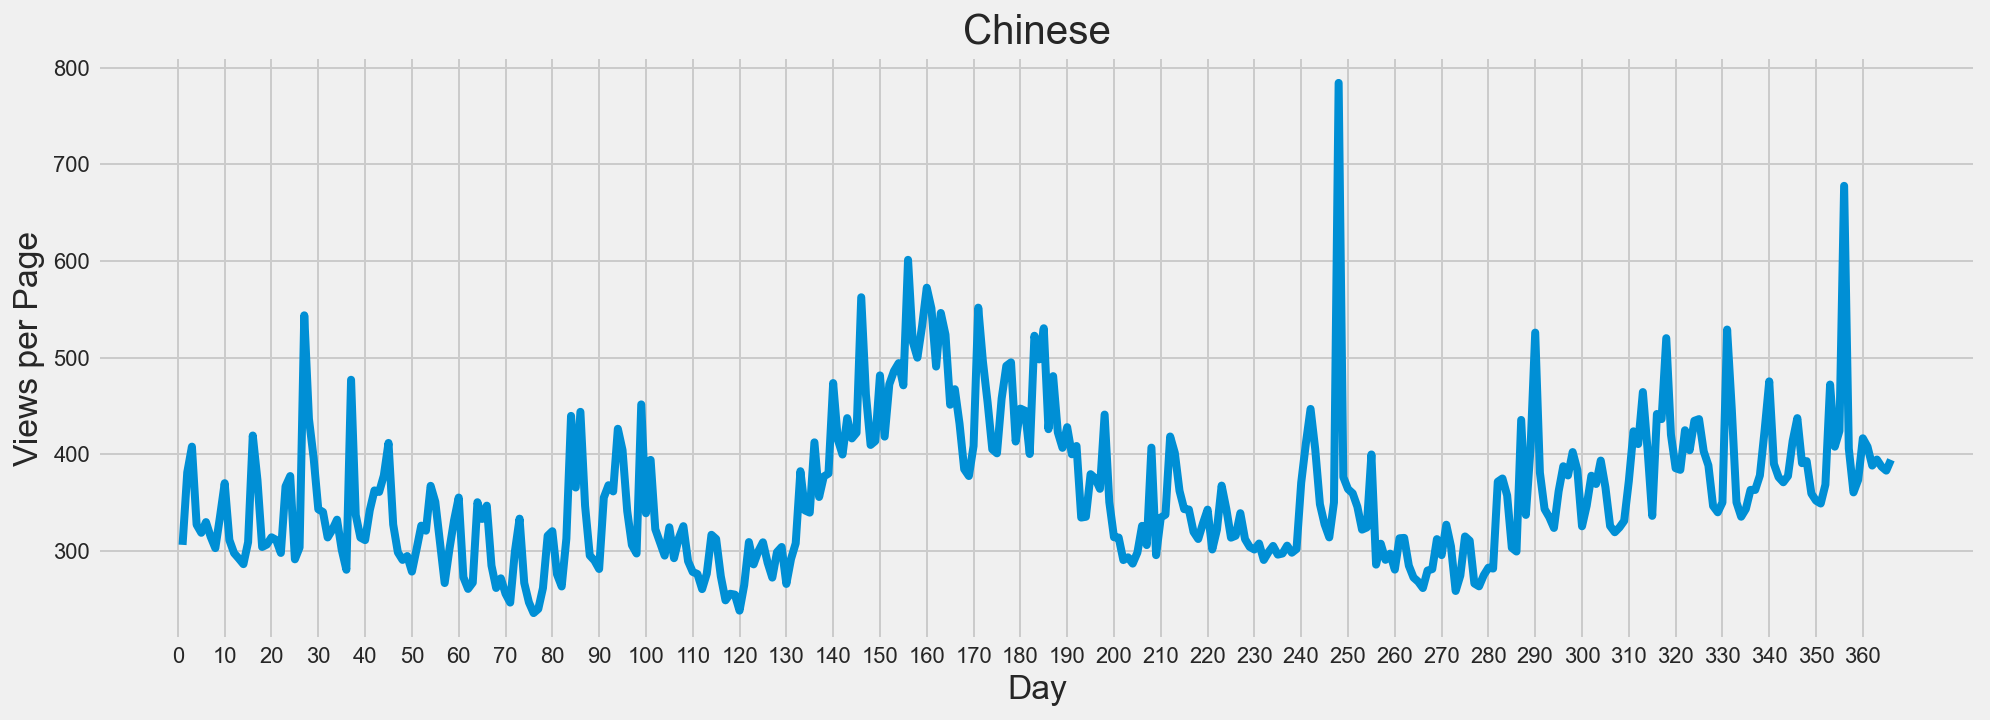

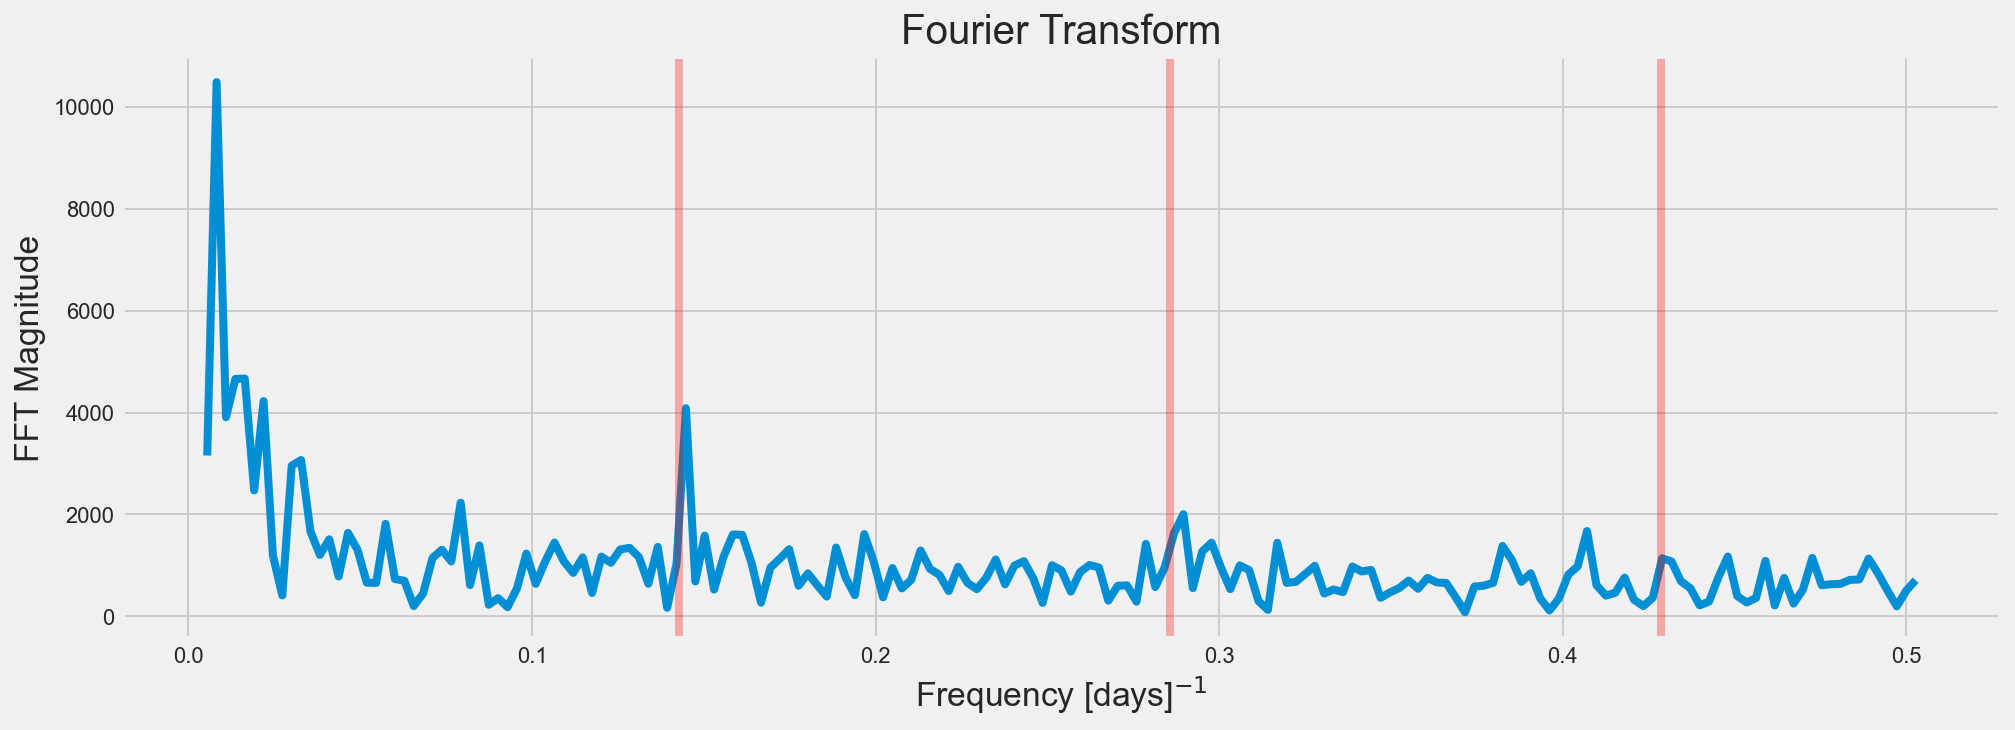

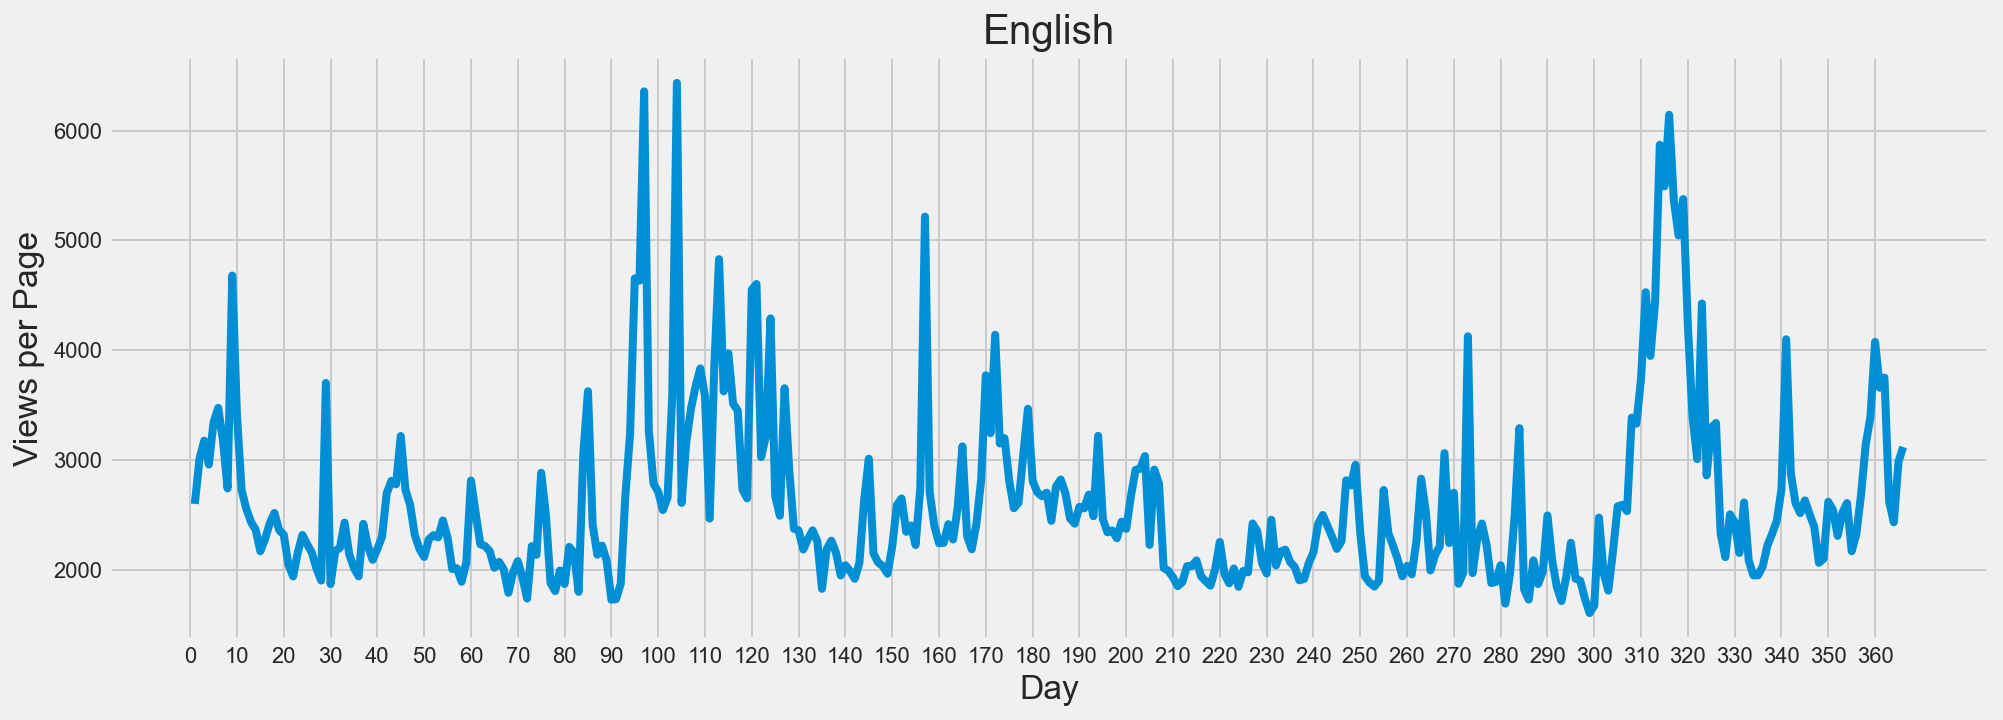

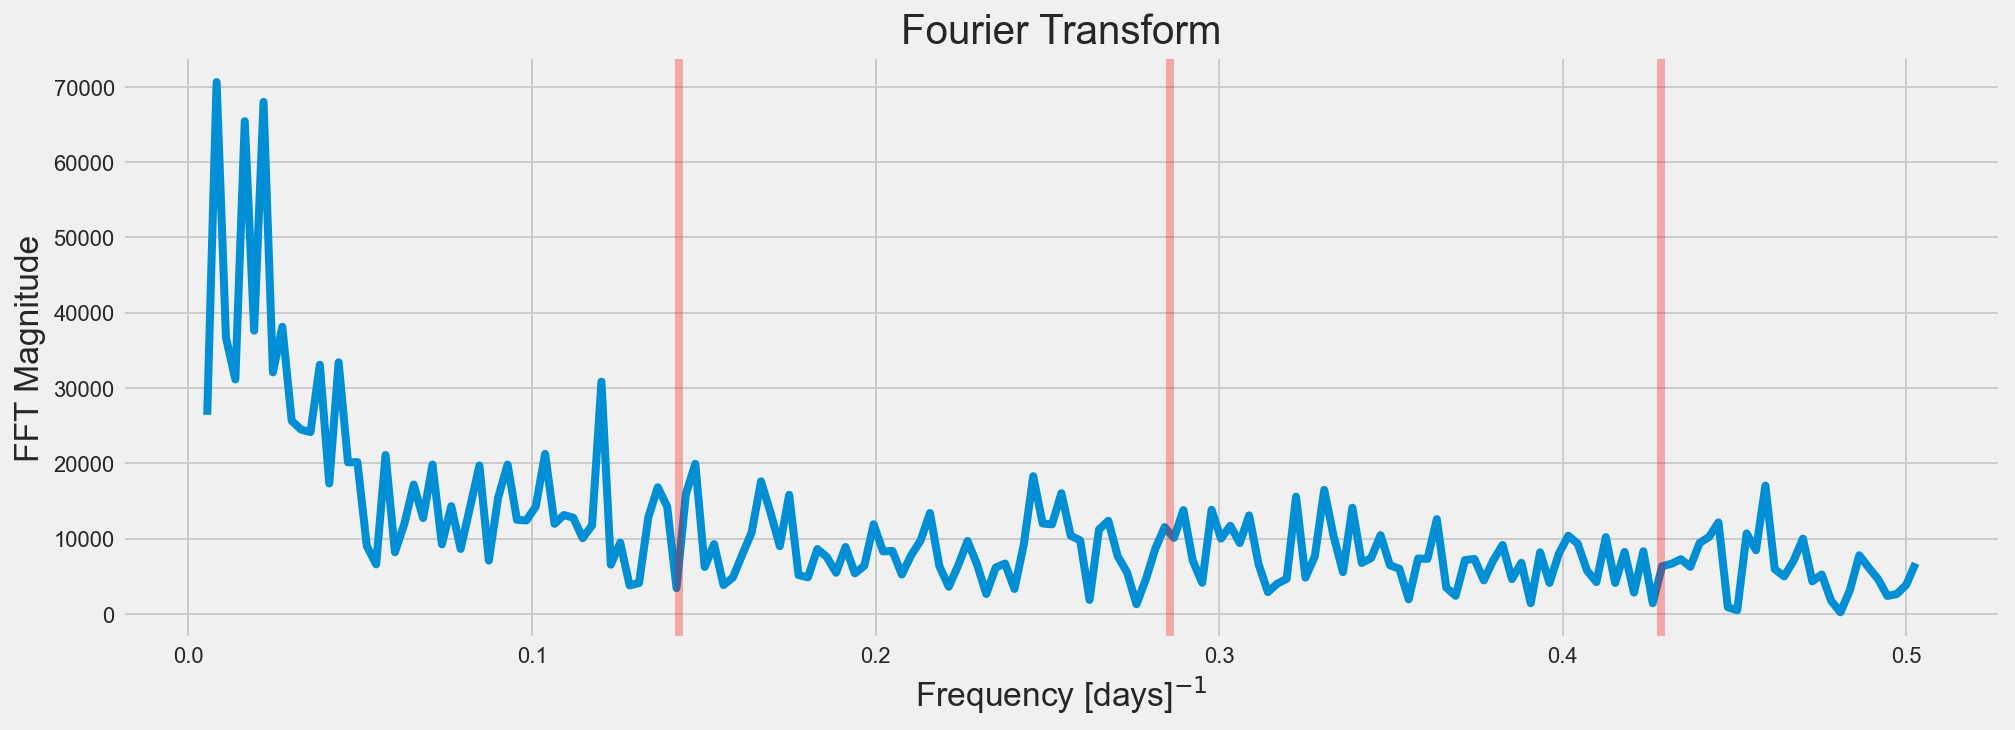

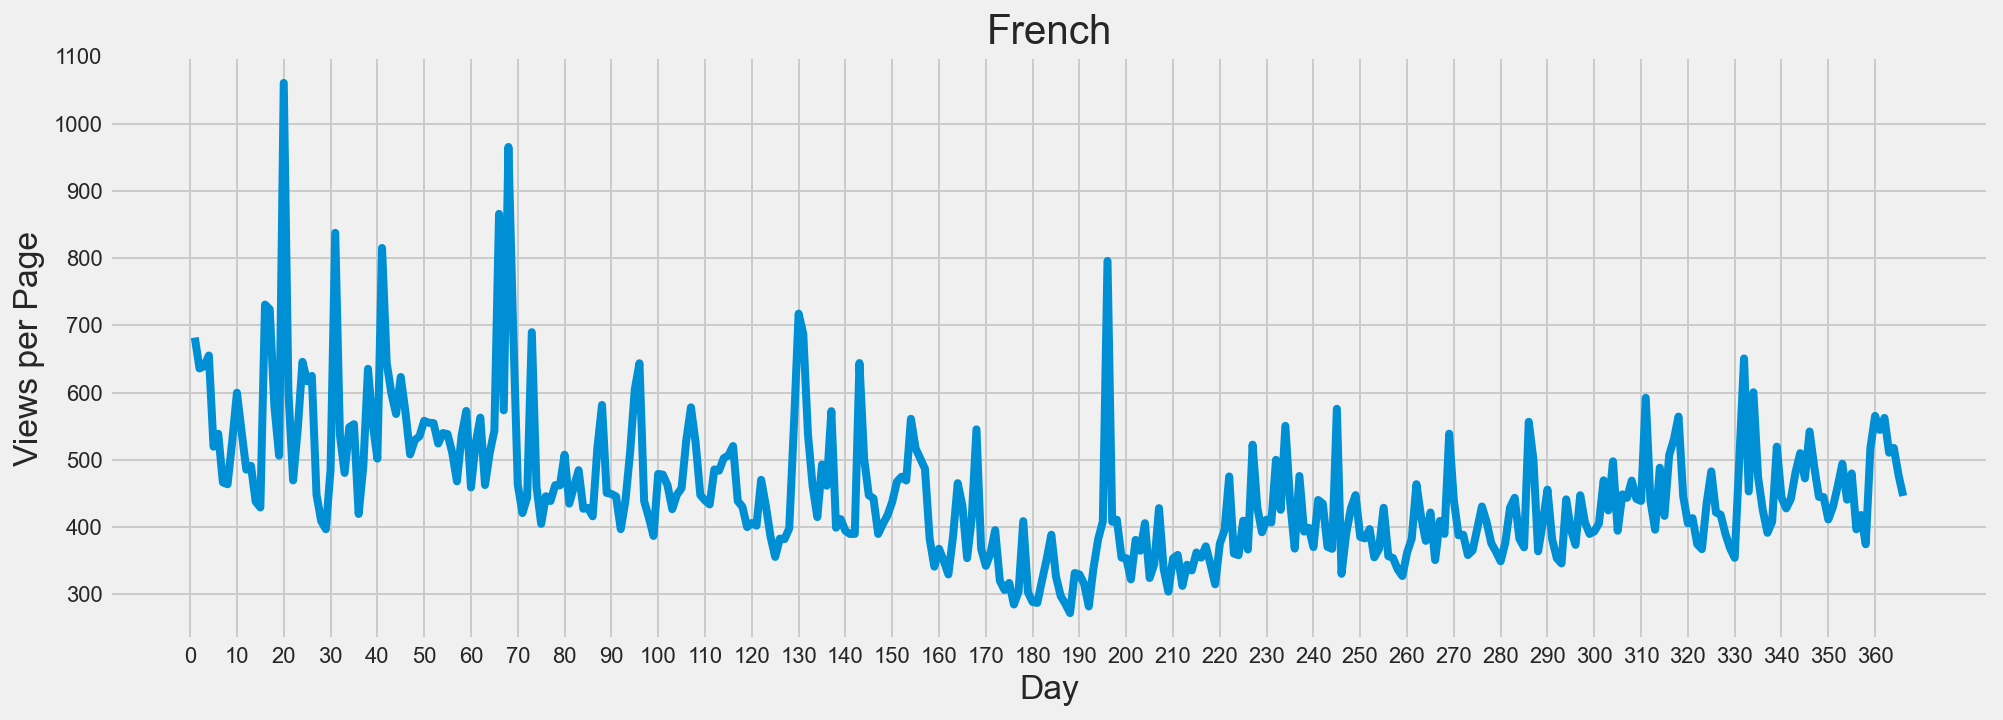

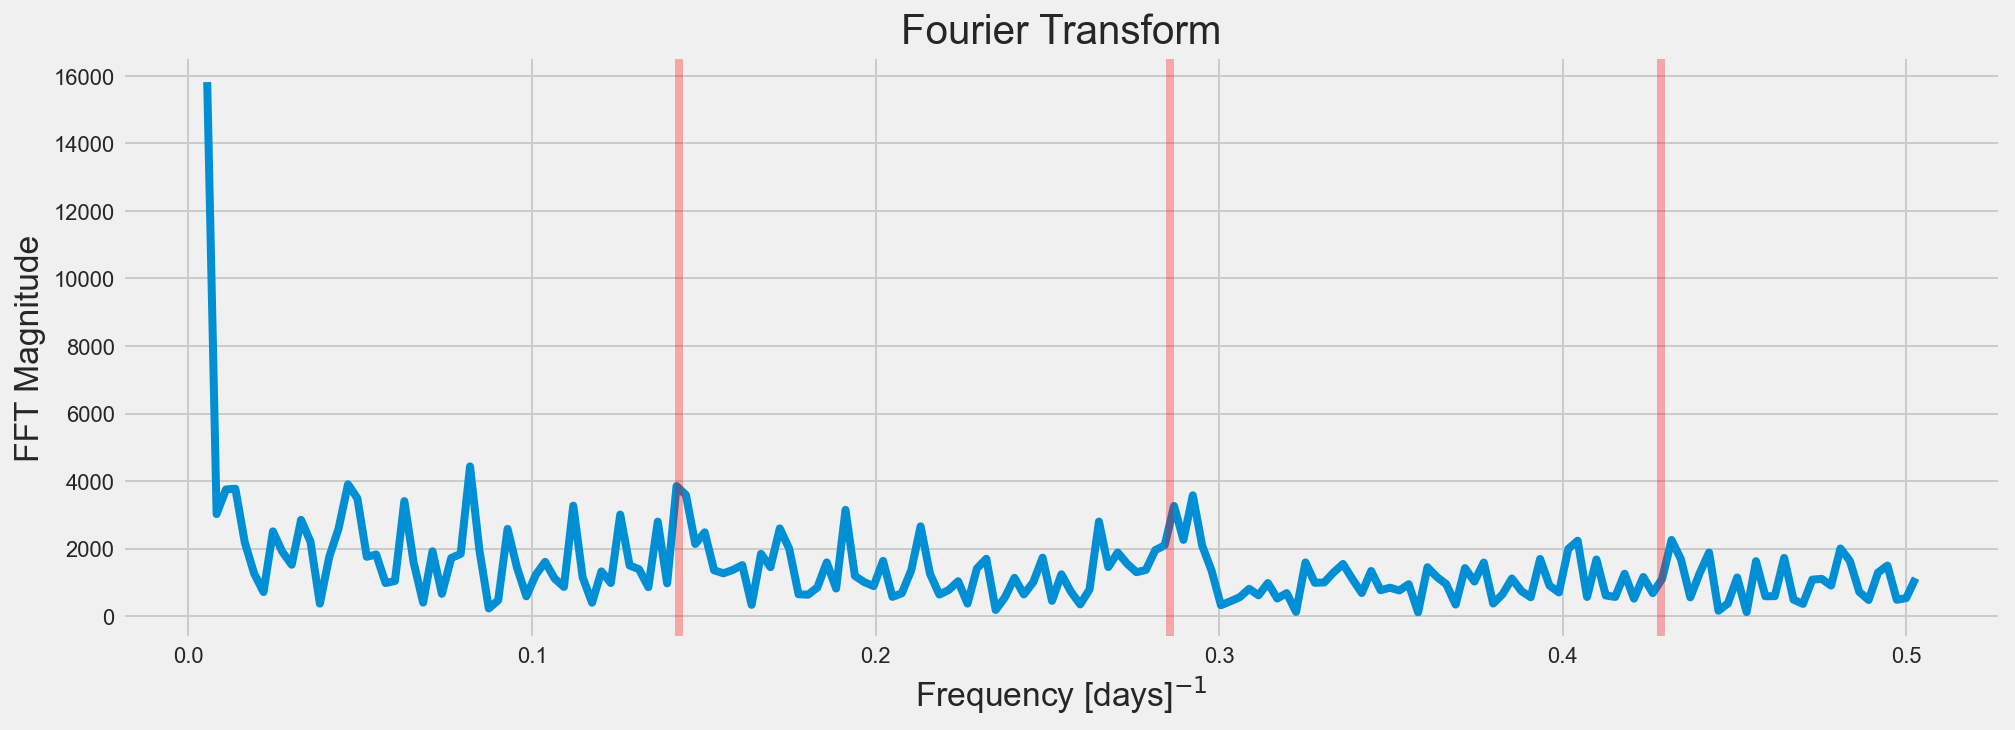

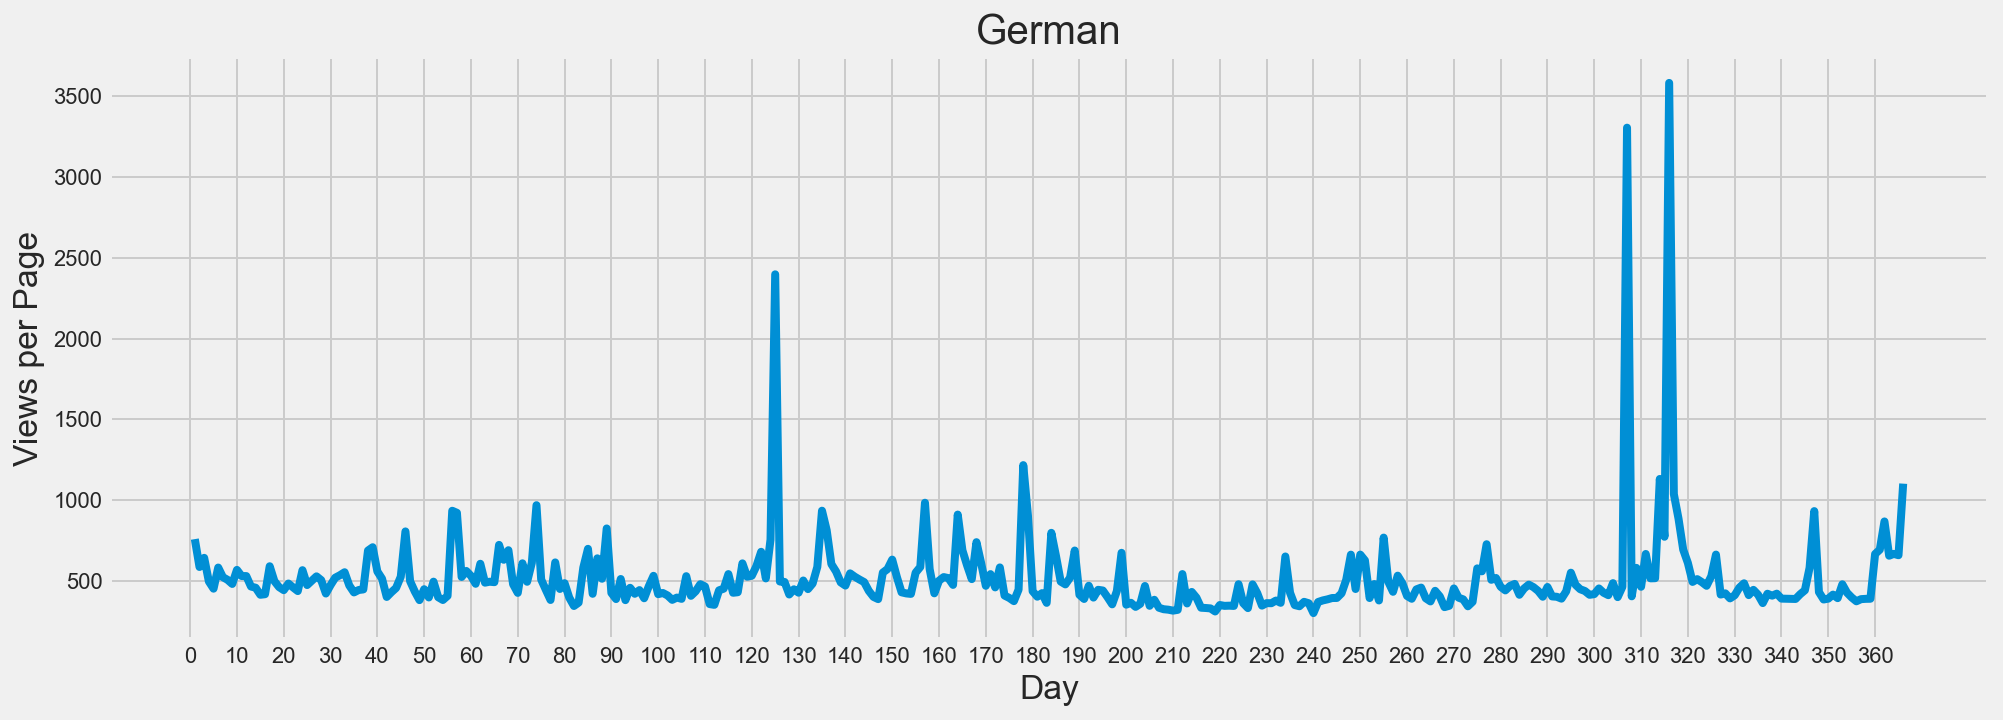

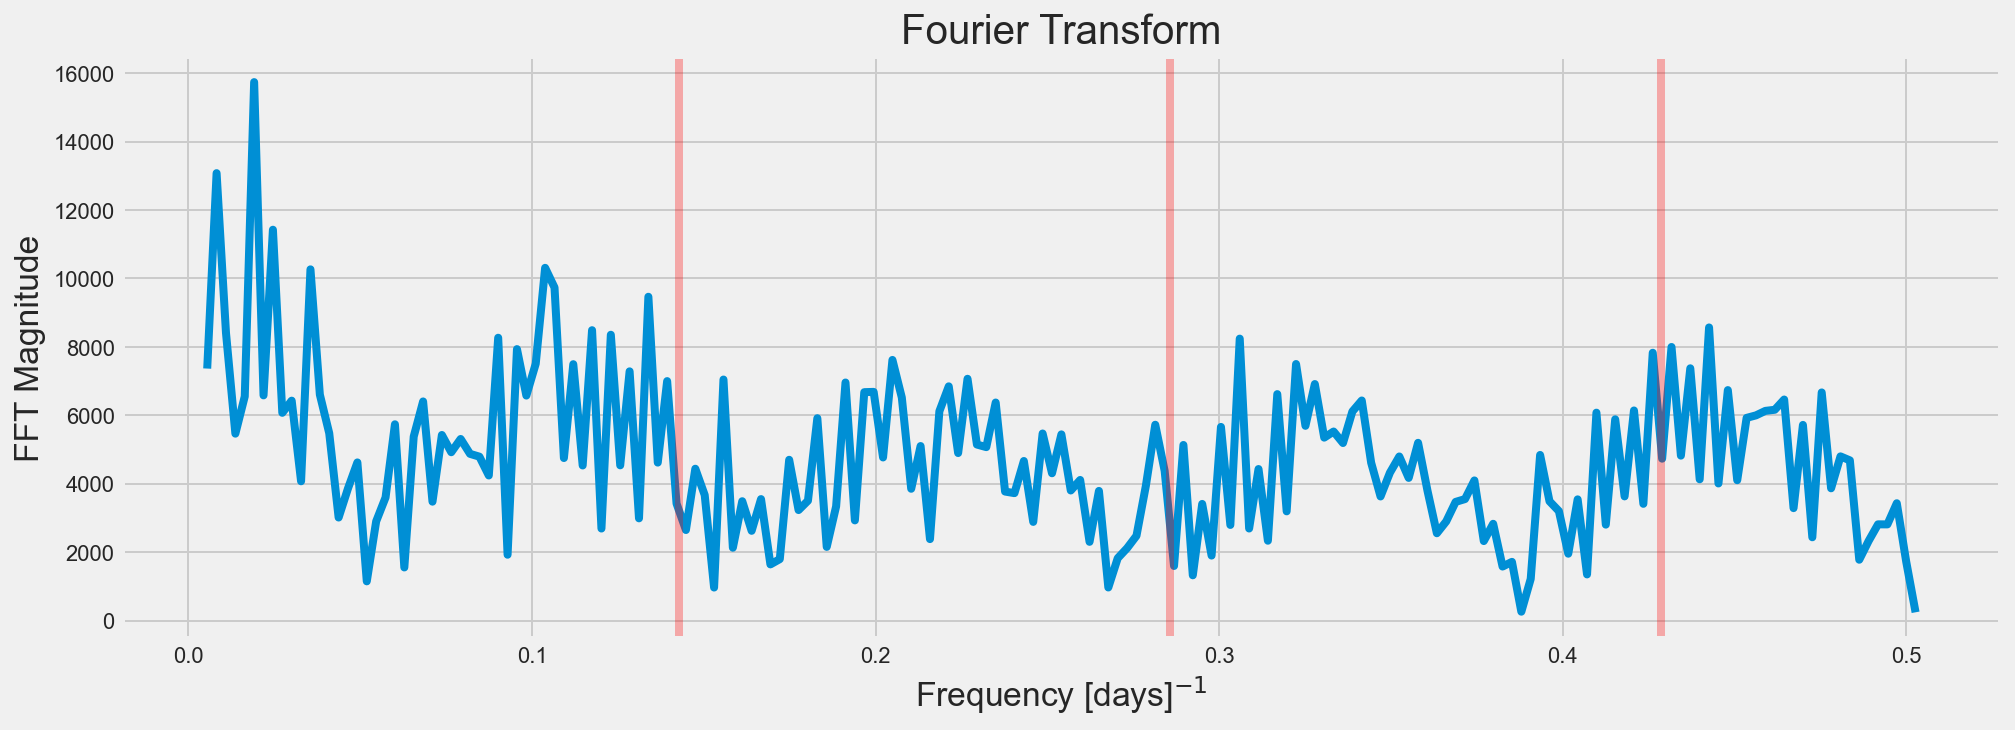

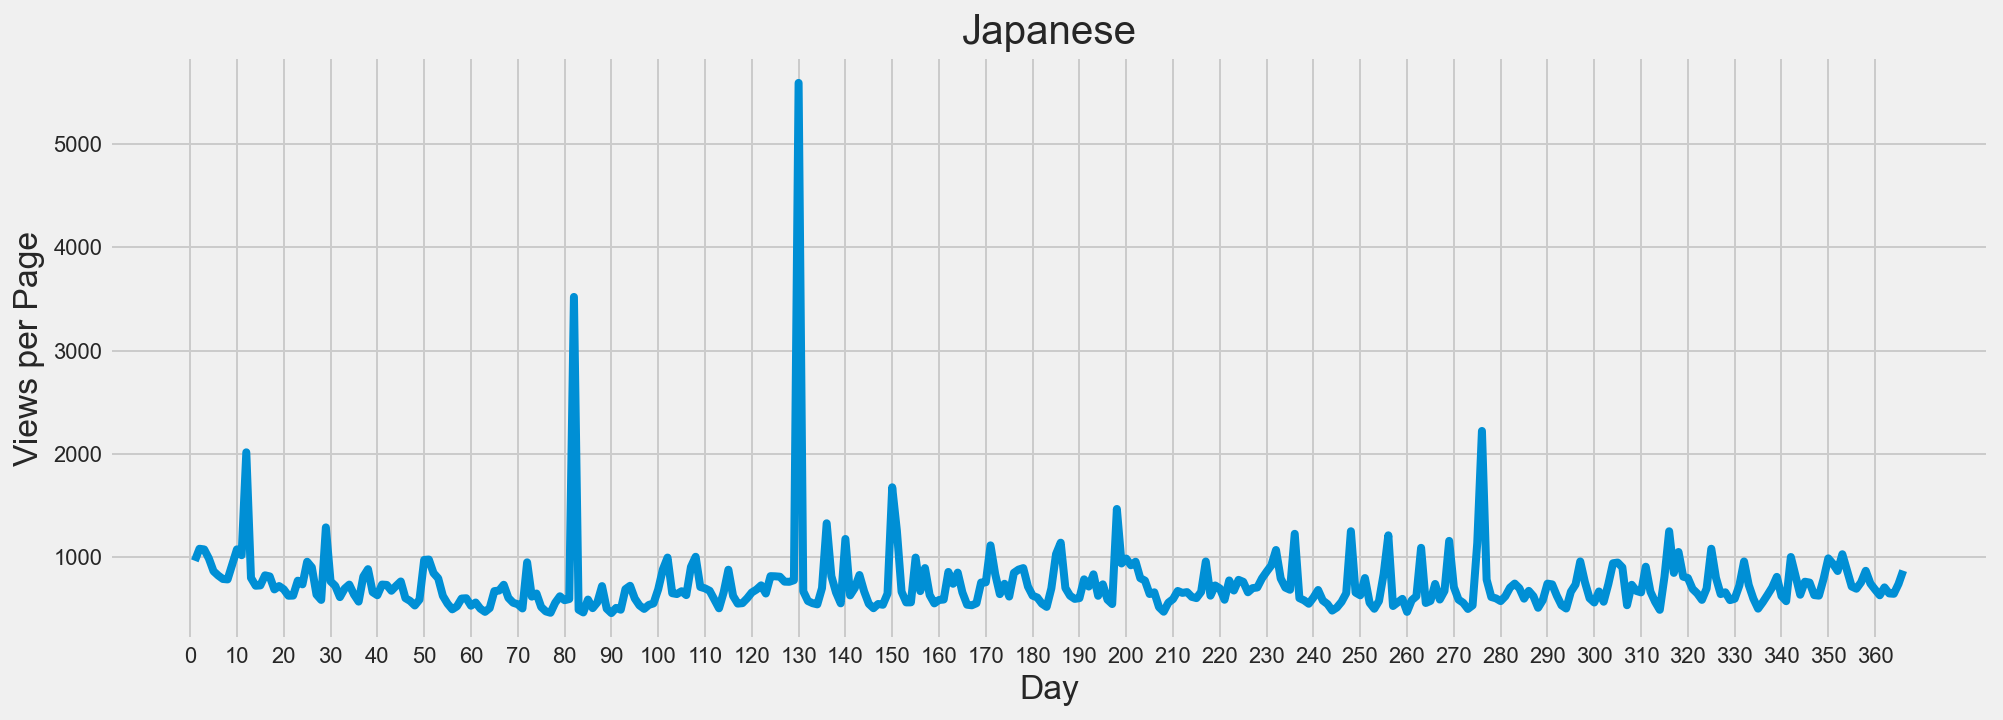

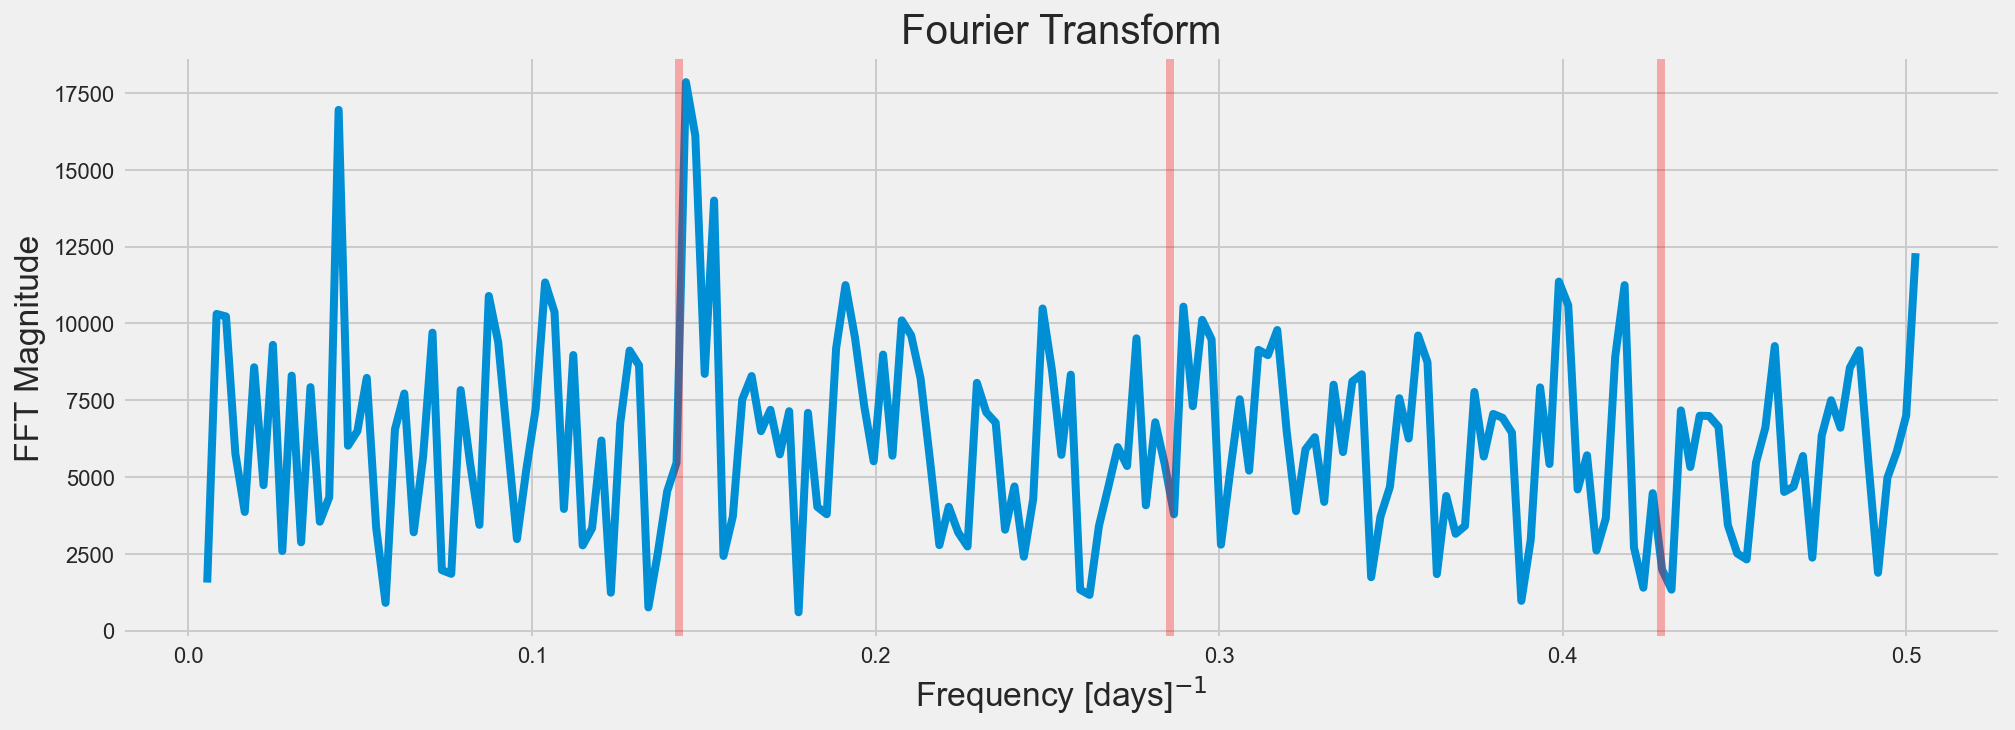

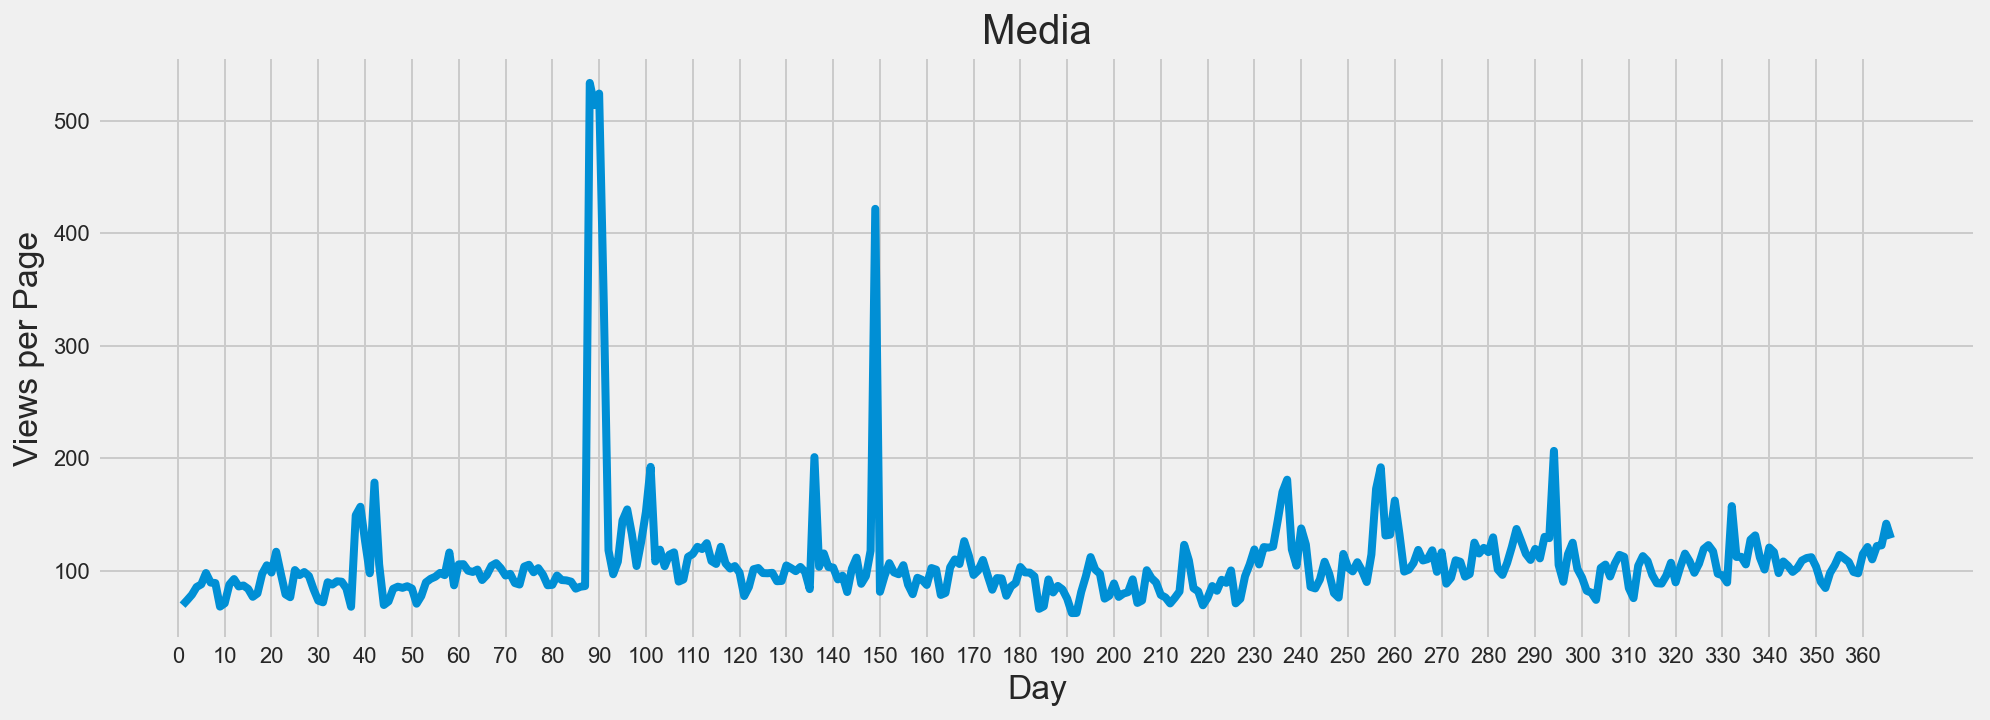

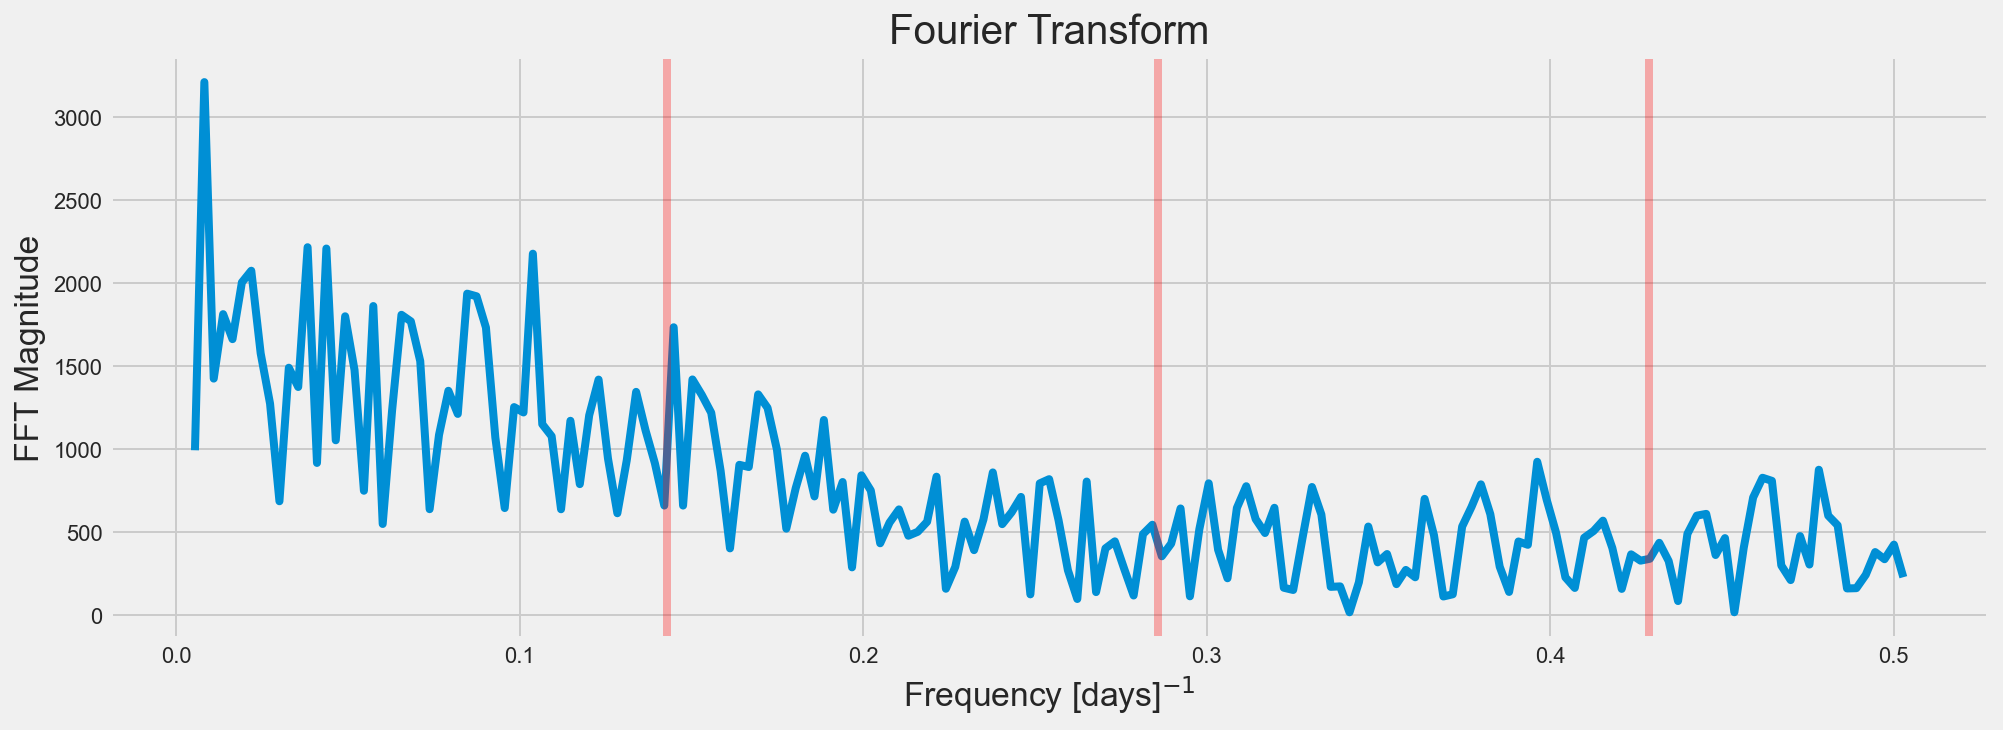

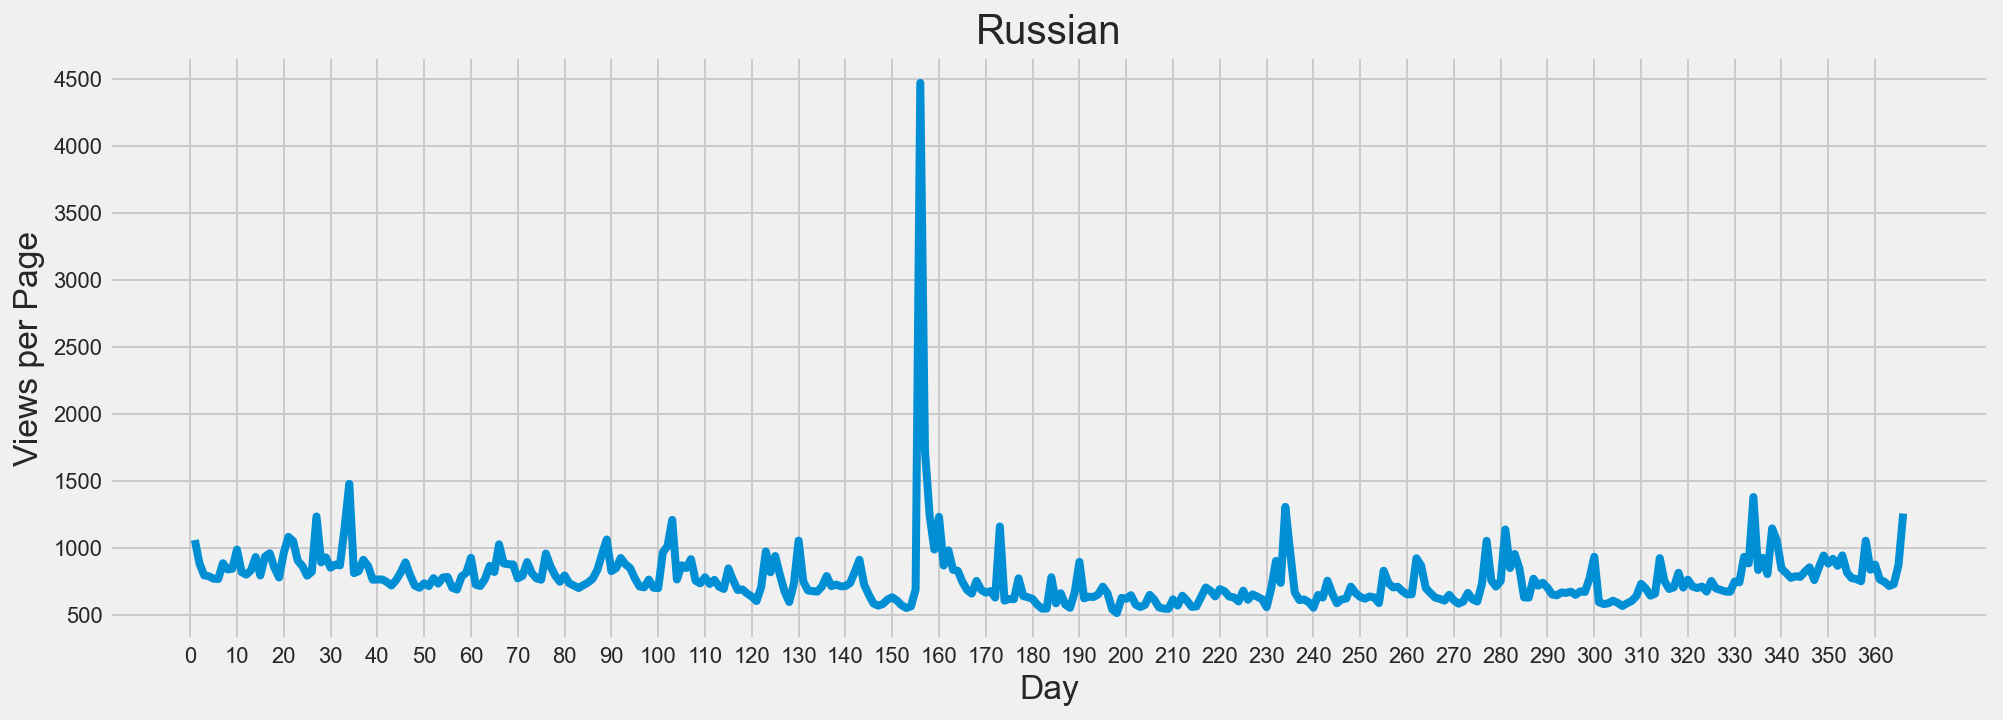

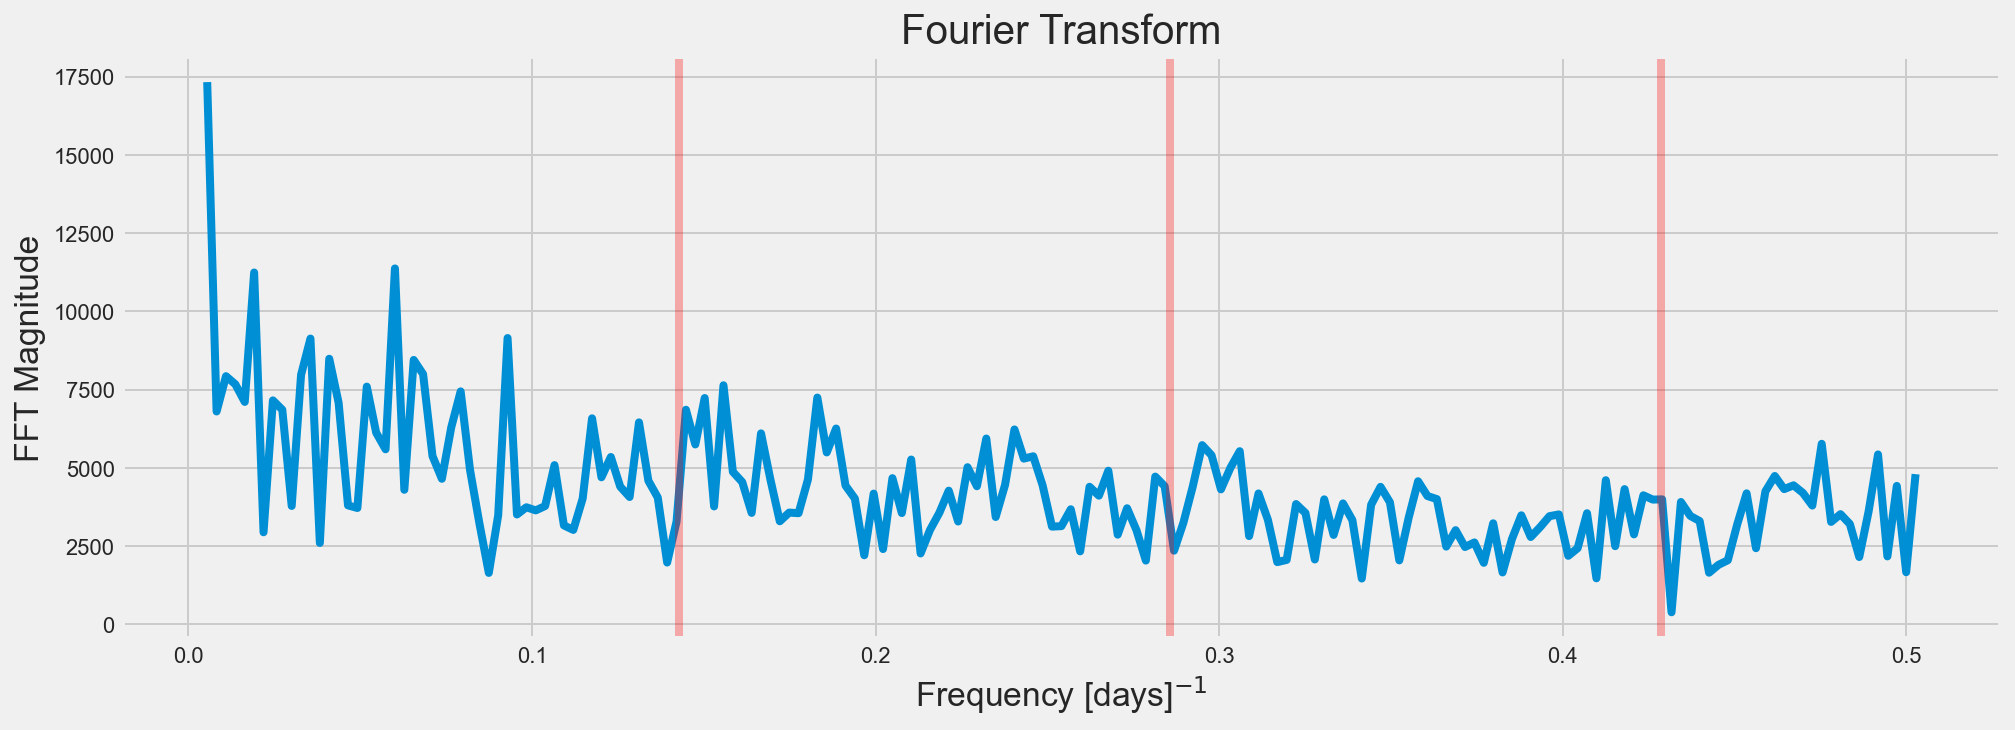

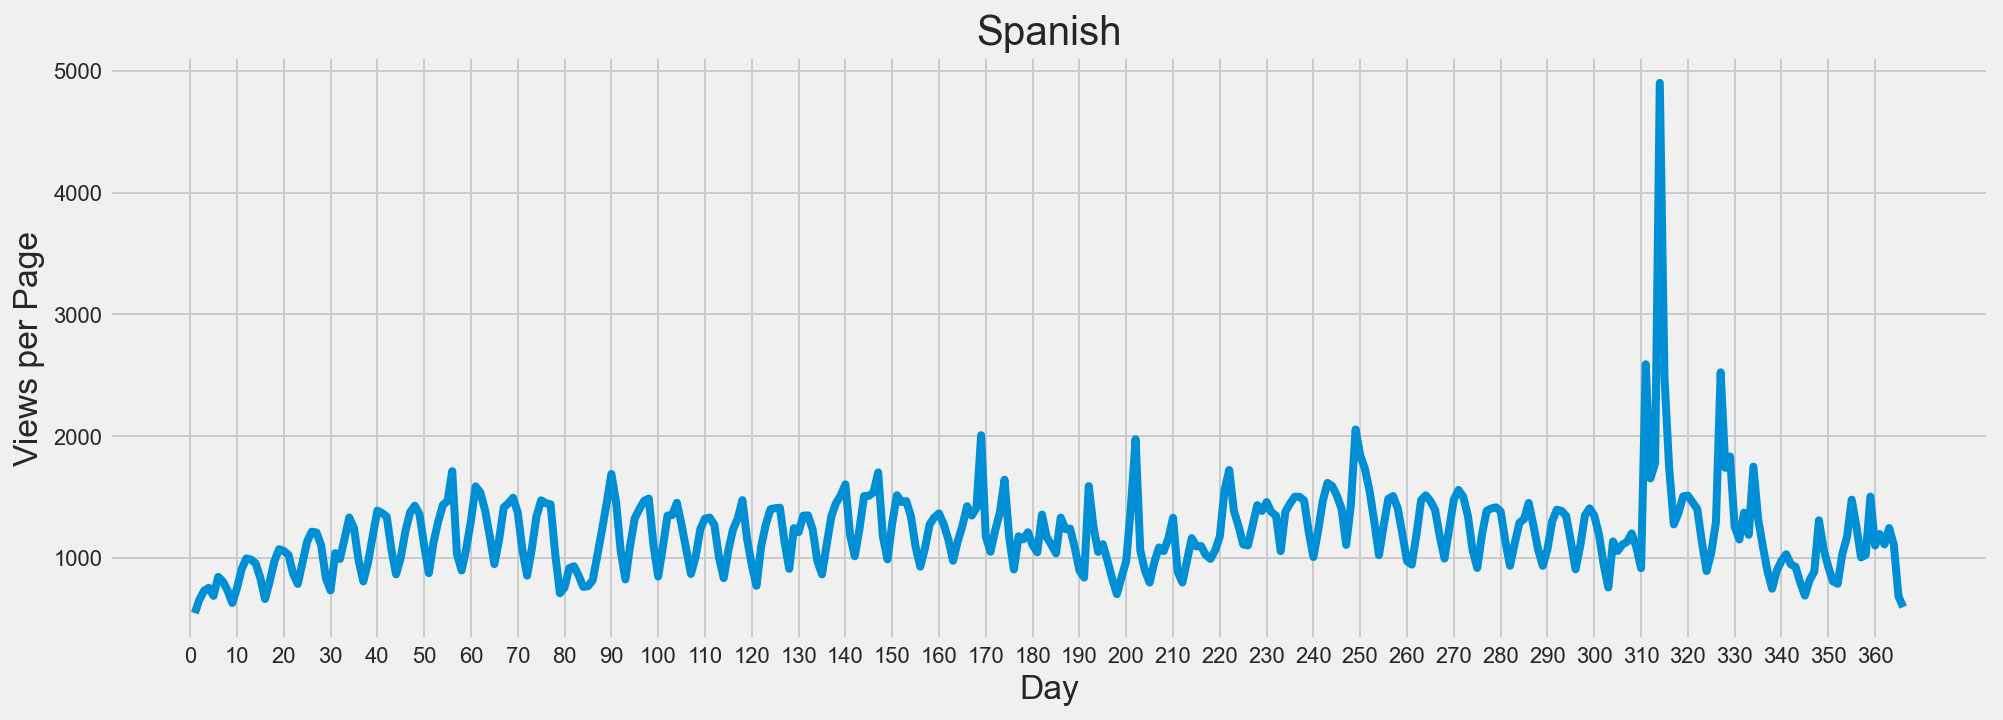

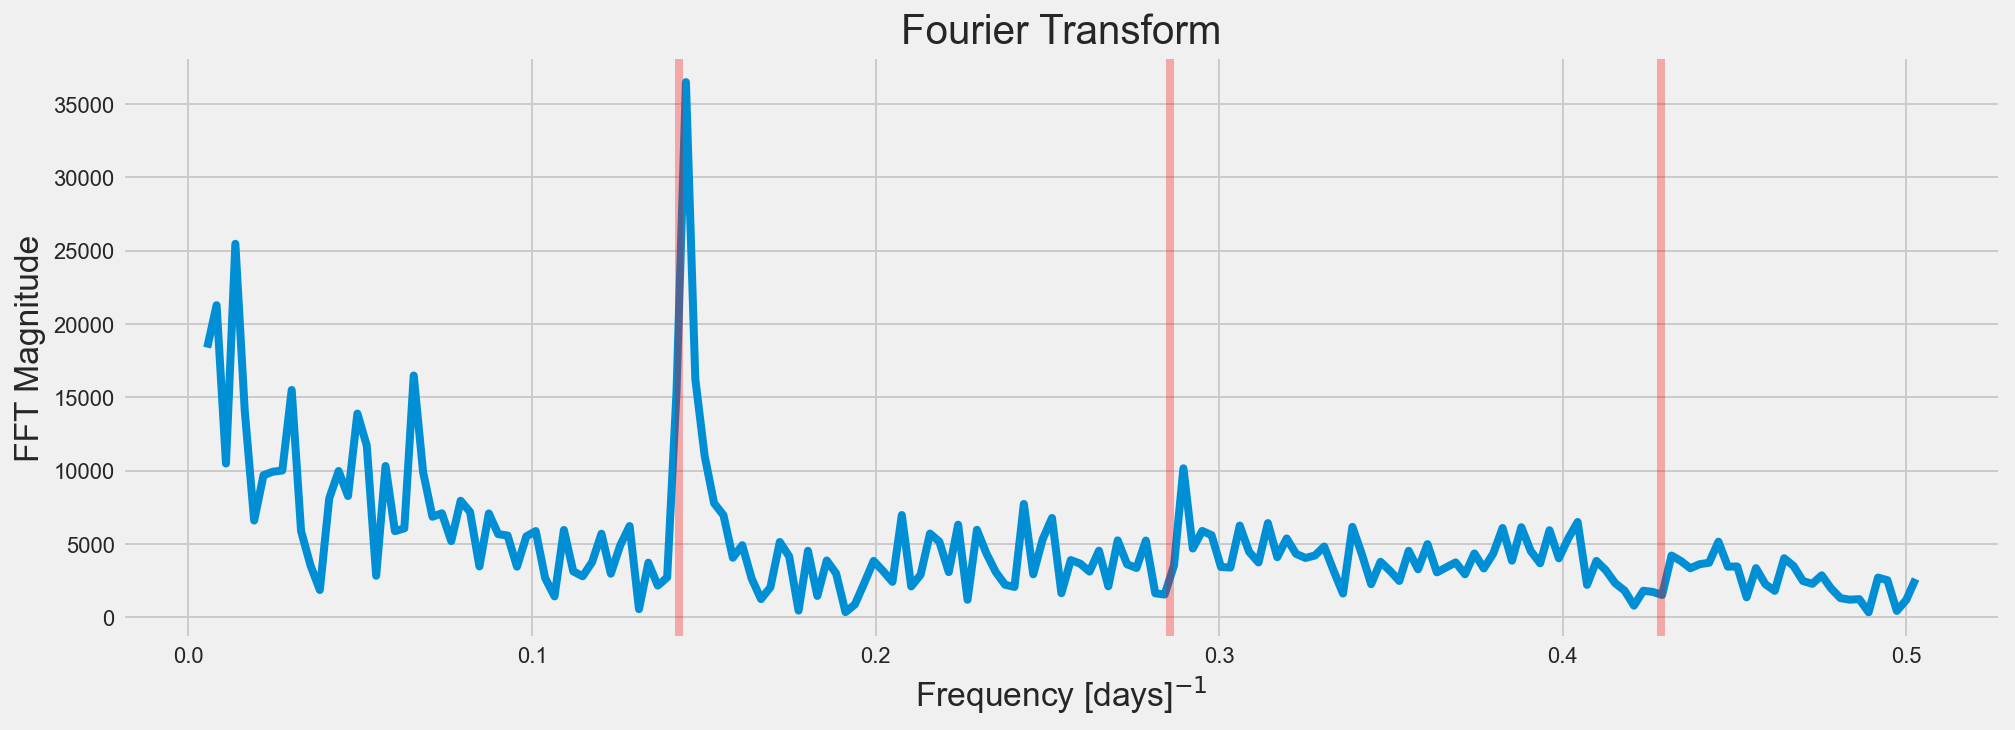

In [43]:
def plot_with_fft(df_daily, col):
    from scipy.fftpack import fft
    
    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    
    plt.title(col)
    plt.xticks(range(0,370,10))
    plt.plot(days, df_daily[col].to_numpy(),label = col )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(df_daily[col].to_numpy())
    
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x))
               for x in fft_complex]
    
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = col )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()
    
for col in df_daily.columns:
    plot_with_fft(df_daily, col)